In [1]:
import pandas as pd
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, StratifiedKFold

import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [3]:
d_code = pd.read_csv('./data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('./data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('./data/속성_L_코드.csv', index_col=0).T.to_dict()

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

df = add_code(df_train, d_code, h_code, l_code)
test = add_code(df_test, d_code, h_code, l_code)

In [4]:
print(df.shape)
print(test.shape)

(501951, 63)
(46404, 62)


# 데이터 전처리

Class Count 
 0    251106
1    250845
Name: target, dtype: int64 

Label1 50.03 % of the dataset
Lable2 49.97 % of the dataset


<AxesSubplot:title={'center':'Class Distributions \n (0: Unused || 1: Used)'}, xlabel='target', ylabel='count'>

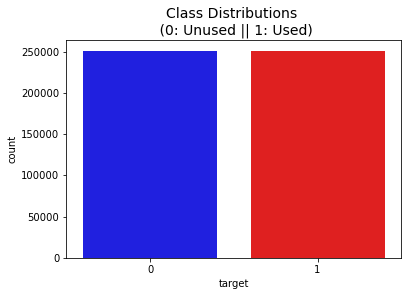

In [5]:
print('Class Count','\n',df['target'].value_counts(),'\n')
print('Label1', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Lable2', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
plt.title('Class Distributions \n (0: Unused || 1: Used)', fontsize=14)
colors = ["blue", "red"]
sns.countplot(df['target'],palette=colors)

In [6]:
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
df = df.drop(drop_columns,axis=1)

In [7]:
pd.set_option('display.max_columns', None)
df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,False,False,False,True,False,False,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,False,False,False,True,False,False,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,True,False,False,True,False,False,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,True,True,False,True,False,False,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,False,False,False,True,False,False,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [8]:
encoder = LabelEncoder()
list1 = ['d_l_match_yn','d_m_match_yn','d_s_match_yn','h_l_match_yn','h_m_match_yn','h_s_match_yn']
for i in list1:
    df[i] = encoder.fit_transform(df[i])

df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,0,0,0,1,0,0,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,0,0,0,1,0,0,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,1,0,0,1,0,0,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,1,1,0,1,0,0,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,0,0,0,1,0,0,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [9]:
df.shape

(501951, 57)

In [10]:
X = df.drop(['target'],axis=1,inplace=False)
y = df['target']

In [11]:
X.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [12]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# optuna 하이퍼 파라미터 튜닝

In [13]:
# train, test 분리
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# 검증세트 분할하기
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.2)
print(len(X_train), len(X_valid))

321248 80312


In [14]:
import optuna
from optuna.samplers import TPESampler

In [15]:
feature_cols = [col for col in df.columns.tolist() if col not in ['id', 'target']]
target_col = ['target']

In [16]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, (trn, val) in enumerate(skf.split(df, df[target_col])):
    df.loc[val, 'kfold'] = i
df['kfold'] = df['kfold'].astype(int)

In [20]:
def fit_cat(trial, xtr, ytr, xval, yval):
    params = {
      'n_estimators': trial.suggest_int('n_estimators',200,2000,100),
      'depth' : trial.suggest_int('depth', 4, 10),                                       
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),               
      'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
    }
    
    model = CatBoostClassifier(**params, eval_metric='F1')
    model.fit(xtr, ytr.reshape(-1,), eval_set=[(xval, yval.reshape(-1,))], early_stopping_rounds=30)
        
    y_val_pred = model.predict_proba(xval)
    
    log = {
        "train logloss": log_loss(ytr, model.predict_proba(xtr)),
        "valid logloss": log_loss(yval, y_val_pred)
    }
    
    return model, log

In [21]:
def objective(trial):
    loss = 0
    for fold in range(5):
        trn_idx = df['kfold'] != fold
        val_idx = df['kfold'] == fold
        trn = df.loc[trn_idx, :]
        val = df.loc[val_idx, :]

        xtr, ytr = trn[feature_cols].values, trn[target_col].values
        xval, yval = val[feature_cols].values, val[target_col].values
        
        model, log = fit_cat(trial, xtr, ytr, xval, yval)
        loss += log['valid logloss']/5
        
    return loss

In [22]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'minimize',
    sampler = sampler,
)
study.optimize(objective, n_trials=20)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

[I 2022-01-20 16:44:46,923] A new study created in memory with name: cat_parameter_opt


0:	learn: 0.5465114	test: 0.5436092	best: 0.5436092 (0)	total: 243ms	remaining: 3m 38s
1:	learn: 0.5545841	test: 0.5524599	best: 0.5524599 (1)	total: 349ms	remaining: 2m 36s
2:	learn: 0.5745676	test: 0.5711443	best: 0.5711443 (2)	total: 461ms	remaining: 2m 17s
3:	learn: 0.5808893	test: 0.5768178	best: 0.5768178 (3)	total: 565ms	remaining: 2m 6s
4:	learn: 0.5849108	test: 0.5811698	best: 0.5811698 (4)	total: 666ms	remaining: 1m 59s
5:	learn: 0.5892472	test: 0.5855665	best: 0.5855665 (5)	total: 767ms	remaining: 1m 54s
6:	learn: 0.5882592	test: 0.5836705	best: 0.5855665 (5)	total: 872ms	remaining: 1m 51s
7:	learn: 0.5860370	test: 0.5813106	best: 0.5855665 (5)	total: 976ms	remaining: 1m 48s
8:	learn: 0.5903850	test: 0.5860006	best: 0.5860006 (8)	total: 1.08s	remaining: 1m 47s
9:	learn: 0.5910545	test: 0.5863872	best: 0.5863872 (9)	total: 1.18s	remaining: 1m 45s
10:	learn: 0.5953943	test: 0.5902926	best: 0.5902926 (10)	total: 1.29s	remaining: 1m 44s
11:	learn: 0.5954132	test: 0.5897912	best:

93:	learn: 0.6373619	test: 0.6242083	best: 0.6242083 (93)	total: 9.77s	remaining: 1m 23s
94:	learn: 0.6376043	test: 0.6243274	best: 0.6243274 (94)	total: 9.87s	remaining: 1m 23s
95:	learn: 0.6376247	test: 0.6242458	best: 0.6243274 (94)	total: 9.97s	remaining: 1m 23s
96:	learn: 0.6375764	test: 0.6244358	best: 0.6244358 (96)	total: 10.1s	remaining: 1m 23s
97:	learn: 0.6379393	test: 0.6242974	best: 0.6244358 (96)	total: 10.2s	remaining: 1m 23s
98:	learn: 0.6380917	test: 0.6241617	best: 0.6244358 (96)	total: 10.3s	remaining: 1m 23s
99:	learn: 0.6379832	test: 0.6239188	best: 0.6244358 (96)	total: 10.4s	remaining: 1m 23s
100:	learn: 0.6384513	test: 0.6239983	best: 0.6244358 (96)	total: 10.5s	remaining: 1m 22s
101:	learn: 0.6383206	test: 0.6240537	best: 0.6244358 (96)	total: 10.5s	remaining: 1m 22s
102:	learn: 0.6385465	test: 0.6238693	best: 0.6244358 (96)	total: 10.6s	remaining: 1m 22s
103:	learn: 0.6387556	test: 0.6239297	best: 0.6244358 (96)	total: 10.7s	remaining: 1m 22s
104:	learn: 0.638

184:	learn: 0.6604705	test: 0.6328458	best: 0.6328458 (184)	total: 19.1s	remaining: 1m 13s
185:	learn: 0.6609271	test: 0.6327496	best: 0.6328458 (184)	total: 19.2s	remaining: 1m 13s
186:	learn: 0.6607730	test: 0.6329394	best: 0.6329394 (186)	total: 19.3s	remaining: 1m 13s
187:	learn: 0.6610223	test: 0.6328984	best: 0.6329394 (186)	total: 19.5s	remaining: 1m 13s
188:	learn: 0.6610803	test: 0.6329825	best: 0.6329825 (188)	total: 19.6s	remaining: 1m 13s
189:	learn: 0.6613709	test: 0.6330428	best: 0.6330428 (189)	total: 19.7s	remaining: 1m 13s
190:	learn: 0.6616694	test: 0.6328817	best: 0.6330428 (189)	total: 19.8s	remaining: 1m 13s
191:	learn: 0.6617904	test: 0.6330392	best: 0.6330428 (189)	total: 19.9s	remaining: 1m 13s
192:	learn: 0.6619727	test: 0.6330933	best: 0.6330933 (192)	total: 20s	remaining: 1m 13s
193:	learn: 0.6621476	test: 0.6333194	best: 0.6333194 (193)	total: 20.1s	remaining: 1m 13s
194:	learn: 0.6623091	test: 0.6332318	best: 0.6333194 (193)	total: 20.2s	remaining: 1m 12s
1

275:	learn: 0.6813800	test: 0.6386732	best: 0.6387788 (271)	total: 28.8s	remaining: 1m 5s
276:	learn: 0.6815234	test: 0.6385163	best: 0.6387788 (271)	total: 28.9s	remaining: 1m 4s
277:	learn: 0.6816530	test: 0.6386116	best: 0.6387788 (271)	total: 29s	remaining: 1m 4s
278:	learn: 0.6818176	test: 0.6385171	best: 0.6387788 (271)	total: 29.1s	remaining: 1m 4s
279:	learn: 0.6820152	test: 0.6388450	best: 0.6388450 (279)	total: 29.2s	remaining: 1m 4s
280:	learn: 0.6820942	test: 0.6390643	best: 0.6390643 (280)	total: 29.3s	remaining: 1m 4s
281:	learn: 0.6824267	test: 0.6390582	best: 0.6390643 (280)	total: 29.4s	remaining: 1m 4s
282:	learn: 0.6825562	test: 0.6394272	best: 0.6394272 (282)	total: 29.5s	remaining: 1m 4s
283:	learn: 0.6827327	test: 0.6392314	best: 0.6394272 (282)	total: 29.6s	remaining: 1m 4s
284:	learn: 0.6829364	test: 0.6394371	best: 0.6394371 (284)	total: 29.8s	remaining: 1m 4s
285:	learn: 0.6831346	test: 0.6393799	best: 0.6394371 (284)	total: 29.9s	remaining: 1m 4s
286:	learn: 

26:	learn: 0.6060680	test: 0.5981352	best: 0.5981352 (26)	total: 2.81s	remaining: 1m 30s
27:	learn: 0.6059282	test: 0.5980111	best: 0.5981352 (26)	total: 2.92s	remaining: 1m 30s
28:	learn: 0.6064472	test: 0.5977479	best: 0.5981352 (26)	total: 3.02s	remaining: 1m 30s
29:	learn: 0.6080829	test: 0.5995495	best: 0.5995495 (29)	total: 3.12s	remaining: 1m 30s
30:	learn: 0.6101484	test: 0.6017154	best: 0.6017154 (30)	total: 3.23s	remaining: 1m 30s
31:	learn: 0.6128522	test: 0.6029948	best: 0.6029948 (31)	total: 3.33s	remaining: 1m 30s
32:	learn: 0.6129649	test: 0.6036966	best: 0.6036966 (32)	total: 3.43s	remaining: 1m 30s
33:	learn: 0.6147760	test: 0.6050286	best: 0.6050286 (33)	total: 3.54s	remaining: 1m 30s
34:	learn: 0.6156972	test: 0.6056600	best: 0.6056600 (34)	total: 3.64s	remaining: 1m 29s
35:	learn: 0.6158284	test: 0.6053457	best: 0.6056600 (34)	total: 3.74s	remaining: 1m 29s
36:	learn: 0.6165481	test: 0.6056774	best: 0.6056774 (36)	total: 3.85s	remaining: 1m 29s
37:	learn: 0.6166541	

119:	learn: 0.6420826	test: 0.6235142	best: 0.6235142 (119)	total: 12.2s	remaining: 1m 19s
120:	learn: 0.6423600	test: 0.6234860	best: 0.6235142 (119)	total: 12.3s	remaining: 1m 19s
121:	learn: 0.6422824	test: 0.6236876	best: 0.6236876 (121)	total: 12.3s	remaining: 1m 18s
122:	learn: 0.6426112	test: 0.6240889	best: 0.6240889 (122)	total: 12.5s	remaining: 1m 18s
123:	learn: 0.6426155	test: 0.6238810	best: 0.6240889 (122)	total: 12.6s	remaining: 1m 18s
124:	learn: 0.6427176	test: 0.6235890	best: 0.6240889 (122)	total: 12.7s	remaining: 1m 18s
125:	learn: 0.6427858	test: 0.6243027	best: 0.6243027 (125)	total: 12.8s	remaining: 1m 18s
126:	learn: 0.6432901	test: 0.6246552	best: 0.6246552 (126)	total: 12.9s	remaining: 1m 18s
127:	learn: 0.6432284	test: 0.6247023	best: 0.6247023 (127)	total: 13s	remaining: 1m 18s
128:	learn: 0.6432315	test: 0.6242808	best: 0.6247023 (127)	total: 13.1s	remaining: 1m 18s
129:	learn: 0.6436453	test: 0.6241441	best: 0.6247023 (127)	total: 13.2s	remaining: 1m 18s
1

210:	learn: 0.6668579	test: 0.6349825	best: 0.6350393 (204)	total: 21.8s	remaining: 1m 11s
211:	learn: 0.6672215	test: 0.6349463	best: 0.6350393 (204)	total: 21.9s	remaining: 1m 11s
212:	learn: 0.6675328	test: 0.6350583	best: 0.6350583 (212)	total: 22s	remaining: 1m 10s
213:	learn: 0.6677462	test: 0.6349388	best: 0.6350583 (212)	total: 22.1s	remaining: 1m 10s
214:	learn: 0.6681983	test: 0.6350945	best: 0.6350945 (214)	total: 22.2s	remaining: 1m 10s
215:	learn: 0.6683535	test: 0.6346712	best: 0.6350945 (214)	total: 22.3s	remaining: 1m 10s
216:	learn: 0.6686026	test: 0.6351078	best: 0.6351078 (216)	total: 22.4s	remaining: 1m 10s
217:	learn: 0.6687546	test: 0.6353610	best: 0.6353610 (217)	total: 22.5s	remaining: 1m 10s
218:	learn: 0.6692303	test: 0.6354644	best: 0.6354644 (218)	total: 22.6s	remaining: 1m 10s
219:	learn: 0.6694138	test: 0.6355871	best: 0.6355871 (219)	total: 22.7s	remaining: 1m 10s
220:	learn: 0.6697192	test: 0.6355423	best: 0.6355871 (219)	total: 22.8s	remaining: 1m 10s
2

303:	learn: 0.6865456	test: 0.6385716	best: 0.6386548 (295)	total: 31.6s	remaining: 1m 2s
304:	learn: 0.6867986	test: 0.6387751	best: 0.6387751 (304)	total: 31.8s	remaining: 1m 1s
305:	learn: 0.6869871	test: 0.6389482	best: 0.6389482 (305)	total: 31.9s	remaining: 1m 1s
306:	learn: 0.6870587	test: 0.6387470	best: 0.6389482 (305)	total: 32s	remaining: 1m 1s
307:	learn: 0.6872857	test: 0.6388992	best: 0.6389482 (305)	total: 32.1s	remaining: 1m 1s
308:	learn: 0.6874682	test: 0.6387817	best: 0.6389482 (305)	total: 32.2s	remaining: 1m 1s
309:	learn: 0.6877484	test: 0.6385582	best: 0.6389482 (305)	total: 32.3s	remaining: 1m 1s
310:	learn: 0.6881142	test: 0.6386503	best: 0.6389482 (305)	total: 32.4s	remaining: 1m 1s
311:	learn: 0.6882856	test: 0.6384743	best: 0.6389482 (305)	total: 32.5s	remaining: 1m 1s
312:	learn: 0.6882888	test: 0.6385842	best: 0.6389482 (305)	total: 32.6s	remaining: 1m 1s
313:	learn: 0.6884630	test: 0.6385574	best: 0.6389482 (305)	total: 32.7s	remaining: 1m 1s
314:	learn: 

397:	learn: 0.7032041	test: 0.6398504	best: 0.6398618 (379)	total: 41.7s	remaining: 52.6s
398:	learn: 0.7033706	test: 0.6400237	best: 0.6400237 (398)	total: 41.8s	remaining: 52.5s
399:	learn: 0.7035786	test: 0.6401321	best: 0.6401321 (399)	total: 41.9s	remaining: 52.4s
400:	learn: 0.7037063	test: 0.6403222	best: 0.6403222 (400)	total: 42s	remaining: 52.3s
401:	learn: 0.7037636	test: 0.6402168	best: 0.6403222 (400)	total: 42.1s	remaining: 52.2s
402:	learn: 0.7039931	test: 0.6403742	best: 0.6403742 (402)	total: 42.2s	remaining: 52.1s
403:	learn: 0.7042063	test: 0.6403948	best: 0.6403948 (403)	total: 42.3s	remaining: 52s
404:	learn: 0.7042459	test: 0.6403773	best: 0.6403948 (403)	total: 42.4s	remaining: 51.8s
405:	learn: 0.7045144	test: 0.6403117	best: 0.6403948 (403)	total: 42.5s	remaining: 51.8s
406:	learn: 0.7046012	test: 0.6402353	best: 0.6403948 (403)	total: 42.6s	remaining: 51.6s
407:	learn: 0.7047084	test: 0.6405468	best: 0.6405468 (407)	total: 42.7s	remaining: 51.5s
408:	learn: 0.

41:	learn: 0.6202263	test: 0.6094849	best: 0.6094849 (41)	total: 4.27s	remaining: 1m 27s
42:	learn: 0.6205111	test: 0.6094998	best: 0.6094998 (42)	total: 4.37s	remaining: 1m 27s
43:	learn: 0.6210680	test: 0.6101727	best: 0.6101727 (43)	total: 4.47s	remaining: 1m 26s
44:	learn: 0.6214404	test: 0.6102344	best: 0.6102344 (44)	total: 4.57s	remaining: 1m 26s
45:	learn: 0.6222914	test: 0.6108130	best: 0.6108130 (45)	total: 4.67s	remaining: 1m 26s
46:	learn: 0.6242347	test: 0.6129259	best: 0.6129259 (46)	total: 4.78s	remaining: 1m 26s
47:	learn: 0.6255313	test: 0.6134841	best: 0.6134841 (47)	total: 4.88s	remaining: 1m 26s
48:	learn: 0.6254815	test: 0.6130534	best: 0.6134841 (47)	total: 4.98s	remaining: 1m 26s
49:	learn: 0.6259421	test: 0.6138357	best: 0.6138357 (49)	total: 5.09s	remaining: 1m 26s
50:	learn: 0.6263777	test: 0.6144283	best: 0.6144283 (50)	total: 5.19s	remaining: 1m 26s
51:	learn: 0.6266467	test: 0.6143601	best: 0.6144283 (50)	total: 5.29s	remaining: 1m 26s
52:	learn: 0.6271566	

133:	learn: 0.6466832	test: 0.6249102	best: 0.6249102 (133)	total: 13.4s	remaining: 1m 16s
134:	learn: 0.6473784	test: 0.6248075	best: 0.6249102 (133)	total: 13.5s	remaining: 1m 16s
135:	learn: 0.6478298	test: 0.6248972	best: 0.6249102 (133)	total: 13.6s	remaining: 1m 16s
136:	learn: 0.6481959	test: 0.6251583	best: 0.6251583 (136)	total: 13.7s	remaining: 1m 16s
137:	learn: 0.6483525	test: 0.6251631	best: 0.6251631 (137)	total: 13.8s	remaining: 1m 16s
138:	learn: 0.6485907	test: 0.6252860	best: 0.6252860 (138)	total: 13.9s	remaining: 1m 16s
139:	learn: 0.6491643	test: 0.6257340	best: 0.6257340 (139)	total: 14s	remaining: 1m 16s
140:	learn: 0.6491679	test: 0.6259745	best: 0.6259745 (140)	total: 14.1s	remaining: 1m 16s
141:	learn: 0.6497132	test: 0.6258872	best: 0.6259745 (140)	total: 14.2s	remaining: 1m 15s
142:	learn: 0.6498173	test: 0.6256262	best: 0.6259745 (140)	total: 14.3s	remaining: 1m 15s
143:	learn: 0.6506331	test: 0.6258768	best: 0.6259745 (140)	total: 14.4s	remaining: 1m 15s
1

224:	learn: 0.6728172	test: 0.6337247	best: 0.6337247 (224)	total: 23s	remaining: 1m 8s
225:	learn: 0.6732116	test: 0.6337308	best: 0.6337308 (225)	total: 23.1s	remaining: 1m 8s
226:	learn: 0.6738414	test: 0.6336570	best: 0.6337308 (225)	total: 23.2s	remaining: 1m 8s
227:	learn: 0.6739222	test: 0.6336858	best: 0.6337308 (225)	total: 23.3s	remaining: 1m 8s
228:	learn: 0.6742474	test: 0.6337605	best: 0.6337605 (228)	total: 23.4s	remaining: 1m 8s
229:	learn: 0.6744199	test: 0.6337163	best: 0.6337605 (228)	total: 23.5s	remaining: 1m 8s
230:	learn: 0.6743855	test: 0.6339590	best: 0.6339590 (230)	total: 23.6s	remaining: 1m 8s
231:	learn: 0.6746970	test: 0.6338950	best: 0.6339590 (230)	total: 23.7s	remaining: 1m 8s
232:	learn: 0.6749918	test: 0.6340313	best: 0.6340313 (232)	total: 23.8s	remaining: 1m 8s
233:	learn: 0.6750294	test: 0.6342029	best: 0.6342029 (233)	total: 23.9s	remaining: 1m 8s
234:	learn: 0.6753142	test: 0.6342961	best: 0.6342961 (234)	total: 24s	remaining: 1m 7s
235:	learn: 0.

318:	learn: 0.6912028	test: 0.6359802	best: 0.6368064 (292)	total: 32.9s	remaining: 60s
319:	learn: 0.6914232	test: 0.6359655	best: 0.6368064 (292)	total: 33s	remaining: 59.9s
320:	learn: 0.6916277	test: 0.6360538	best: 0.6368064 (292)	total: 33.1s	remaining: 59.8s
321:	learn: 0.6918584	test: 0.6359724	best: 0.6368064 (292)	total: 33.2s	remaining: 59.7s
322:	learn: 0.6920269	test: 0.6361438	best: 0.6368064 (292)	total: 33.3s	remaining: 59.6s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.6368063614
bestIteration = 292

Shrink model to first 293 iterations.
0:	learn: 0.5481075	test: 0.5480325	best: 0.5480325 (0)	total: 108ms	remaining: 1m 37s
1:	learn: 0.5563483	test: 0.5550655	best: 0.5550655 (1)	total: 218ms	remaining: 1m 37s
2:	learn: 0.5771207	test: 0.5747325	best: 0.5747325 (2)	total: 328ms	remaining: 1m 38s
3:	learn: 0.5805193	test: 0.5789251	best: 0.5789251 (3)	total: 434ms	remaining: 1m 37s
4:	learn: 0.5873512	test: 0.5855273	best: 0.5855273 (4)	total: 539ms

86:	learn: 0.6353055	test: 0.6200808	best: 0.6216456 (81)	total: 8.89s	remaining: 1m 23s
87:	learn: 0.6355414	test: 0.6206695	best: 0.6216456 (81)	total: 8.99s	remaining: 1m 23s
88:	learn: 0.6358593	test: 0.6208399	best: 0.6216456 (81)	total: 9.1s	remaining: 1m 22s
89:	learn: 0.6360785	test: 0.6213471	best: 0.6216456 (81)	total: 9.2s	remaining: 1m 22s
90:	learn: 0.6360334	test: 0.6216027	best: 0.6216456 (81)	total: 9.26s	remaining: 1m 22s
91:	learn: 0.6365373	test: 0.6218093	best: 0.6218093 (91)	total: 9.37s	remaining: 1m 22s
92:	learn: 0.6367142	test: 0.6218763	best: 0.6218763 (92)	total: 9.47s	remaining: 1m 22s
93:	learn: 0.6369291	test: 0.6218197	best: 0.6218763 (92)	total: 9.58s	remaining: 1m 22s
94:	learn: 0.6372617	test: 0.6216096	best: 0.6218763 (92)	total: 9.68s	remaining: 1m 22s
95:	learn: 0.6373793	test: 0.6218445	best: 0.6218763 (92)	total: 9.78s	remaining: 1m 21s
96:	learn: 0.6378423	test: 0.6220337	best: 0.6220337 (96)	total: 9.88s	remaining: 1m 21s
97:	learn: 0.6382060	te

179:	learn: 0.6598905	test: 0.6324091	best: 0.6324120 (177)	total: 18.3s	remaining: 1m 13s
180:	learn: 0.6602465	test: 0.6324919	best: 0.6324919 (180)	total: 18.4s	remaining: 1m 13s
181:	learn: 0.6605504	test: 0.6324633	best: 0.6324919 (180)	total: 18.5s	remaining: 1m 13s
182:	learn: 0.6609616	test: 0.6324822	best: 0.6324919 (180)	total: 18.7s	remaining: 1m 13s
183:	learn: 0.6612873	test: 0.6326832	best: 0.6326832 (183)	total: 18.8s	remaining: 1m 13s
184:	learn: 0.6615269	test: 0.6327531	best: 0.6327531 (184)	total: 18.9s	remaining: 1m 12s
185:	learn: 0.6618015	test: 0.6327239	best: 0.6327531 (184)	total: 19s	remaining: 1m 12s
186:	learn: 0.6620641	test: 0.6332996	best: 0.6332996 (186)	total: 19.1s	remaining: 1m 12s
187:	learn: 0.6621450	test: 0.6334178	best: 0.6334178 (187)	total: 19.2s	remaining: 1m 12s
188:	learn: 0.6625715	test: 0.6336759	best: 0.6336759 (188)	total: 19.3s	remaining: 1m 12s
189:	learn: 0.6626769	test: 0.6335102	best: 0.6336759 (188)	total: 19.4s	remaining: 1m 12s
1

270:	learn: 0.6810454	test: 0.6389062	best: 0.6389062 (265)	total: 28s	remaining: 1m 5s
271:	learn: 0.6814541	test: 0.6390342	best: 0.6390342 (271)	total: 28.1s	remaining: 1m 4s
272:	learn: 0.6814599	test: 0.6391993	best: 0.6391993 (272)	total: 28.2s	remaining: 1m 4s
273:	learn: 0.6817160	test: 0.6394557	best: 0.6394557 (273)	total: 28.4s	remaining: 1m 4s
274:	learn: 0.6819565	test: 0.6394550	best: 0.6394557 (273)	total: 28.5s	remaining: 1m 4s
275:	learn: 0.6821680	test: 0.6394096	best: 0.6394557 (273)	total: 28.6s	remaining: 1m 4s
276:	learn: 0.6821371	test: 0.6395550	best: 0.6395550 (276)	total: 28.7s	remaining: 1m 4s
277:	learn: 0.6824306	test: 0.6395588	best: 0.6395588 (277)	total: 28.8s	remaining: 1m 4s
278:	learn: 0.6826981	test: 0.6396344	best: 0.6396344 (278)	total: 28.9s	remaining: 1m 4s
279:	learn: 0.6829267	test: 0.6397282	best: 0.6397282 (279)	total: 29s	remaining: 1m 4s
280:	learn: 0.6833657	test: 0.6397381	best: 0.6397381 (280)	total: 29.1s	remaining: 1m 4s
281:	learn: 0.

36:	learn: 0.6163770	test: 0.6119789	best: 0.6119789 (36)	total: 3.95s	remaining: 1m 32s
37:	learn: 0.6165483	test: 0.6120000	best: 0.6120000 (37)	total: 3.96s	remaining: 1m 29s
38:	learn: 0.6177915	test: 0.6124968	best: 0.6124968 (38)	total: 4.06s	remaining: 1m 29s
39:	learn: 0.6186897	test: 0.6136494	best: 0.6136494 (39)	total: 4.17s	remaining: 1m 29s
40:	learn: 0.6190959	test: 0.6135540	best: 0.6136494 (39)	total: 4.27s	remaining: 1m 29s
41:	learn: 0.6197243	test: 0.6139695	best: 0.6139695 (41)	total: 4.37s	remaining: 1m 29s
42:	learn: 0.6200576	test: 0.6141455	best: 0.6141455 (42)	total: 4.48s	remaining: 1m 29s
43:	learn: 0.6206811	test: 0.6148216	best: 0.6148216 (43)	total: 4.58s	remaining: 1m 29s
44:	learn: 0.6213217	test: 0.6149155	best: 0.6149155 (44)	total: 4.68s	remaining: 1m 28s
45:	learn: 0.6220241	test: 0.6159600	best: 0.6159600 (45)	total: 4.79s	remaining: 1m 28s
46:	learn: 0.6243483	test: 0.6179166	best: 0.6179166 (46)	total: 4.89s	remaining: 1m 28s
47:	learn: 0.6251832	

128:	learn: 0.6432452	test: 0.6273903	best: 0.6273903 (128)	total: 13.2s	remaining: 1m 18s
129:	learn: 0.6437452	test: 0.6274928	best: 0.6274928 (129)	total: 13.3s	remaining: 1m 18s
130:	learn: 0.6438389	test: 0.6274628	best: 0.6274928 (129)	total: 13.4s	remaining: 1m 18s
131:	learn: 0.6443997	test: 0.6280391	best: 0.6280391 (131)	total: 13.5s	remaining: 1m 18s
132:	learn: 0.6444579	test: 0.6280600	best: 0.6280600 (132)	total: 13.6s	remaining: 1m 18s
133:	learn: 0.6450336	test: 0.6286345	best: 0.6286345 (133)	total: 13.7s	remaining: 1m 18s
134:	learn: 0.6450133	test: 0.6289043	best: 0.6289043 (134)	total: 13.8s	remaining: 1m 18s
135:	learn: 0.6456156	test: 0.6294615	best: 0.6294615 (135)	total: 13.9s	remaining: 1m 18s
136:	learn: 0.6461390	test: 0.6290495	best: 0.6294615 (135)	total: 14s	remaining: 1m 18s
137:	learn: 0.6464553	test: 0.6291547	best: 0.6294615 (135)	total: 14.1s	remaining: 1m 17s
138:	learn: 0.6469510	test: 0.6294859	best: 0.6294859 (138)	total: 14.2s	remaining: 1m 17s
1

219:	learn: 0.6688727	test: 0.6382906	best: 0.6384744 (213)	total: 22.8s	remaining: 1m 10s
220:	learn: 0.6691759	test: 0.6381688	best: 0.6384744 (213)	total: 22.9s	remaining: 1m 10s
221:	learn: 0.6695644	test: 0.6384865	best: 0.6384865 (221)	total: 23s	remaining: 1m 10s
222:	learn: 0.6697191	test: 0.6383926	best: 0.6384865 (221)	total: 23.1s	remaining: 1m 10s
223:	learn: 0.6698960	test: 0.6383059	best: 0.6384865 (221)	total: 23.2s	remaining: 1m 9s
224:	learn: 0.6700589	test: 0.6382580	best: 0.6384865 (221)	total: 23.3s	remaining: 1m 9s
225:	learn: 0.6702661	test: 0.6384535	best: 0.6384865 (221)	total: 23.4s	remaining: 1m 9s
226:	learn: 0.6704912	test: 0.6388478	best: 0.6388478 (226)	total: 23.5s	remaining: 1m 9s
227:	learn: 0.6705787	test: 0.6386512	best: 0.6388478 (226)	total: 23.6s	remaining: 1m 9s
228:	learn: 0.6707210	test: 0.6383487	best: 0.6388478 (226)	total: 23.7s	remaining: 1m 9s
229:	learn: 0.6708508	test: 0.6383681	best: 0.6388478 (226)	total: 23.8s	remaining: 1m 9s
230:	lea

313:	learn: 0.6878775	test: 0.6413082	best: 0.6413339 (302)	total: 32.7s	remaining: 1m 1s
314:	learn: 0.6879352	test: 0.6412006	best: 0.6413339 (302)	total: 32.8s	remaining: 1m
315:	learn: 0.6881870	test: 0.6413980	best: 0.6413980 (315)	total: 32.9s	remaining: 1m
316:	learn: 0.6883255	test: 0.6415023	best: 0.6415023 (316)	total: 33s	remaining: 1m
317:	learn: 0.6883912	test: 0.6414786	best: 0.6415023 (316)	total: 33.1s	remaining: 1m
318:	learn: 0.6886194	test: 0.6419324	best: 0.6419324 (318)	total: 33.2s	remaining: 1m
319:	learn: 0.6889204	test: 0.6417512	best: 0.6419324 (318)	total: 33.3s	remaining: 1m
320:	learn: 0.6890874	test: 0.6417634	best: 0.6419324 (318)	total: 33.4s	remaining: 1m
321:	learn: 0.6891827	test: 0.6417276	best: 0.6419324 (318)	total: 33.5s	remaining: 1m
322:	learn: 0.6893674	test: 0.6417201	best: 0.6419324 (318)	total: 33.6s	remaining: 1m
323:	learn: 0.6896313	test: 0.6415635	best: 0.6419324 (318)	total: 33.8s	remaining: 1m
324:	learn: 0.6900367	test: 0.6412138	best

406:	learn: 0.7045560	test: 0.6438231	best: 0.6439487 (393)	total: 42.6s	remaining: 51.5s
407:	learn: 0.7047004	test: 0.6439284	best: 0.6439487 (393)	total: 42.7s	remaining: 51.4s
408:	learn: 0.7048464	test: 0.6438579	best: 0.6439487 (393)	total: 42.8s	remaining: 51.3s
409:	learn: 0.7049062	test: 0.6440552	best: 0.6440552 (409)	total: 42.9s	remaining: 51.2s
410:	learn: 0.7052024	test: 0.6444390	best: 0.6444390 (410)	total: 43s	remaining: 51.1s
411:	learn: 0.7055286	test: 0.6442674	best: 0.6444390 (410)	total: 43.1s	remaining: 51s
412:	learn: 0.7056121	test: 0.6441756	best: 0.6444390 (410)	total: 43.2s	remaining: 50.9s
413:	learn: 0.7058572	test: 0.6439091	best: 0.6444390 (410)	total: 43.3s	remaining: 50.8s
414:	learn: 0.7059651	test: 0.6440659	best: 0.6444390 (410)	total: 43.4s	remaining: 50.7s
415:	learn: 0.7060986	test: 0.6440166	best: 0.6444390 (410)	total: 43.5s	remaining: 50.6s
416:	learn: 0.7062378	test: 0.6443395	best: 0.6444390 (410)	total: 43.6s	remaining: 50.5s
417:	learn: 0.

[I 2022-01-20 16:48:11,997] Trial 0 finished with value: 0.6430426686041006 and parameters: {'n_estimators': 900, 'depth': 10, 'learning_rate': 0.1205712628744377, 'random_strength': 60, 'bagging_temperature': 0.04207988669606638, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.6430426686041006.


0:	learn: 0.5909594	test: 0.5884773	best: 0.5884773 (0)	total: 37.9ms	remaining: 1m 8s
1:	learn: 0.6238145	test: 0.6241452	best: 0.6241452 (1)	total: 72.1ms	remaining: 1m 4s
2:	learn: 0.6281769	test: 0.6275178	best: 0.6275178 (2)	total: 104ms	remaining: 1m 2s
3:	learn: 0.6225330	test: 0.6209585	best: 0.6275178 (2)	total: 142ms	remaining: 1m 3s
4:	learn: 0.6216498	test: 0.6207791	best: 0.6275178 (2)	total: 176ms	remaining: 1m 3s
5:	learn: 0.6180490	test: 0.6174743	best: 0.6275178 (2)	total: 206ms	remaining: 1m 1s
6:	learn: 0.6177629	test: 0.6171883	best: 0.6275178 (2)	total: 238ms	remaining: 1m
7:	learn: 0.6190014	test: 0.6185930	best: 0.6275178 (2)	total: 271ms	remaining: 1m
8:	learn: 0.6098828	test: 0.6085471	best: 0.6275178 (2)	total: 302ms	remaining: 1m
9:	learn: 0.6079521	test: 0.6057910	best: 0.6275178 (2)	total: 334ms	remaining: 59.7s
10:	learn: 0.6078088	test: 0.6058885	best: 0.6275178 (2)	total: 365ms	remaining: 59.3s
11:	learn: 0.6126155	test: 0.6113421	best: 0.6275178 (2)	tot

28:	learn: 0.6178795	test: 0.6137763	best: 0.6232233 (1)	total: 943ms	remaining: 57.6s
29:	learn: 0.6191670	test: 0.6147779	best: 0.6232233 (1)	total: 979ms	remaining: 57.8s
30:	learn: 0.6192750	test: 0.6154241	best: 0.6232233 (1)	total: 1.01s	remaining: 57.8s
31:	learn: 0.6193711	test: 0.6149135	best: 0.6232233 (1)	total: 1.04s	remaining: 57.7s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.6232233457
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.6307002	test: 0.6299751	best: 0.6299751 (0)	total: 30.8ms	remaining: 55.4s
1:	learn: 0.6020430	test: 0.6011100	best: 0.6299751 (0)	total: 63.9ms	remaining: 57.4s
2:	learn: 0.6160216	test: 0.6147673	best: 0.6299751 (0)	total: 96.2ms	remaining: 57.6s
3:	learn: 0.6122987	test: 0.6110903	best: 0.6299751 (0)	total: 129ms	remaining: 57.9s
4:	learn: 0.6233072	test: 0.6235278	best: 0.6299751 (0)	total: 164ms	remaining: 58.8s
5:	learn: 0.6167342	test: 0.6159646	best: 0.6299751 (0)	total: 200ms	remaining: 59.7s

[I 2022-01-20 16:48:20,414] Trial 1 finished with value: 0.6853650362775778 and parameters: {'n_estimators': 1800, 'depth': 8, 'learning_rate': 0.11114989443094977, 'random_strength': 2, 'bagging_temperature': 75.7947995334801, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.6430426686041006.


0:	learn: 0.5911580	test: 0.5912616	best: 0.5912616 (0)	total: 25.2ms	remaining: 12.6s
1:	learn: 0.5702167	test: 0.5703149	best: 0.5912616 (0)	total: 43.9ms	remaining: 10.9s
2:	learn: 0.5107229	test: 0.5085002	best: 0.5912616 (0)	total: 62.8ms	remaining: 10.4s
3:	learn: 0.5232983	test: 0.5212935	best: 0.5912616 (0)	total: 82ms	remaining: 10.2s
4:	learn: 0.5712081	test: 0.5716158	best: 0.5912616 (0)	total: 98.6ms	remaining: 9.76s
5:	learn: 0.5610020	test: 0.5615227	best: 0.5912616 (0)	total: 120ms	remaining: 9.91s
6:	learn: 0.5365301	test: 0.5351615	best: 0.5912616 (0)	total: 141ms	remaining: 9.93s
7:	learn: 0.5307512	test: 0.5293771	best: 0.5912616 (0)	total: 163ms	remaining: 10s
8:	learn: 0.5251368	test: 0.5237293	best: 0.5912616 (0)	total: 183ms	remaining: 10s
9:	learn: 0.5433347	test: 0.5430107	best: 0.5912616 (0)	total: 203ms	remaining: 9.96s
10:	learn: 0.5405141	test: 0.5397403	best: 0.5912616 (0)	total: 227ms	remaining: 10.1s
11:	learn: 0.5573190	test: 0.5572405	best: 0.5912616 (

0:	learn: 0.5912901	test: 0.5906549	best: 0.5906549 (0)	total: 32.9ms	remaining: 16.4s
1:	learn: 0.5046317	test: 0.5066515	best: 0.5906549 (0)	total: 56.3ms	remaining: 14s
2:	learn: 0.5398912	test: 0.5385767	best: 0.5906549 (0)	total: 76.5ms	remaining: 12.7s
3:	learn: 0.5394878	test: 0.5378974	best: 0.5906549 (0)	total: 99ms	remaining: 12.3s
4:	learn: 0.5435463	test: 0.5425171	best: 0.5906549 (0)	total: 117ms	remaining: 11.6s
5:	learn: 0.5364643	test: 0.5360319	best: 0.5906549 (0)	total: 139ms	remaining: 11.5s
6:	learn: 0.5352880	test: 0.5348013	best: 0.5906549 (0)	total: 160ms	remaining: 11.2s
7:	learn: 0.5304285	test: 0.5306491	best: 0.5906549 (0)	total: 181ms	remaining: 11.2s
8:	learn: 0.5553978	test: 0.5558436	best: 0.5906549 (0)	total: 199ms	remaining: 10.9s
9:	learn: 0.5483092	test: 0.5480278	best: 0.5906549 (0)	total: 219ms	remaining: 10.7s
10:	learn: 0.5616368	test: 0.5608955	best: 0.5906549 (0)	total: 241ms	remaining: 10.7s
11:	learn: 0.5616043	test: 0.5607450	best: 0.5906549 

[I 2022-01-20 16:48:26,981] Trial 2 finished with value: 0.6923185610724065 and parameters: {'n_estimators': 500, 'depth': 5, 'learning_rate': 0.028145092716060652, 'random_strength': 53, 'bagging_temperature': 0.5342937261279778, 'od_type': 'Iter'}. Best is trial 0 with value: 0.6430426686041006.


0:	learn: 0.5889893	test: 0.5889069	best: 0.5889069 (0)	total: 30.5ms	remaining: 12.2s
1:	learn: 0.5368628	test: 0.5374695	best: 0.5889069 (0)	total: 54.2ms	remaining: 10.8s
2:	learn: 0.5391411	test: 0.5405830	best: 0.5889069 (0)	total: 78.5ms	remaining: 10.4s
3:	learn: 0.5493962	test: 0.5501968	best: 0.5889069 (0)	total: 105ms	remaining: 10.4s
4:	learn: 0.5490502	test: 0.5485121	best: 0.5889069 (0)	total: 132ms	remaining: 10.5s
5:	learn: 0.5715549	test: 0.5710120	best: 0.5889069 (0)	total: 159ms	remaining: 10.4s
6:	learn: 0.5818995	test: 0.5823393	best: 0.5889069 (0)	total: 181ms	remaining: 10.2s
7:	learn: 0.5730252	test: 0.5717936	best: 0.5889069 (0)	total: 203ms	remaining: 9.97s
8:	learn: 0.5752492	test: 0.5742988	best: 0.5889069 (0)	total: 228ms	remaining: 9.9s
9:	learn: 0.5801417	test: 0.5782565	best: 0.5889069 (0)	total: 251ms	remaining: 9.77s
10:	learn: 0.5851793	test: 0.5834677	best: 0.5889069 (0)	total: 276ms	remaining: 9.75s
11:	learn: 0.5889351	test: 0.5867050	best: 0.588906

9:	learn: 0.5437199	test: 0.5411660	best: 0.5879436 (0)	total: 267ms	remaining: 10.4s
10:	learn: 0.5459798	test: 0.5435792	best: 0.5879436 (0)	total: 296ms	remaining: 10.5s
11:	learn: 0.5484405	test: 0.5463864	best: 0.5879436 (0)	total: 325ms	remaining: 10.5s
12:	learn: 0.5629135	test: 0.5597586	best: 0.5879436 (0)	total: 350ms	remaining: 10.4s
13:	learn: 0.5670318	test: 0.5645275	best: 0.5879436 (0)	total: 374ms	remaining: 10.3s
14:	learn: 0.5748192	test: 0.5734309	best: 0.5879436 (0)	total: 401ms	remaining: 10.3s
15:	learn: 0.5763434	test: 0.5741916	best: 0.5879436 (0)	total: 426ms	remaining: 10.2s
16:	learn: 0.5807796	test: 0.5778538	best: 0.5879436 (0)	total: 448ms	remaining: 10.1s
17:	learn: 0.5785608	test: 0.5761419	best: 0.5879436 (0)	total: 476ms	remaining: 10.1s
18:	learn: 0.5759989	test: 0.5732236	best: 0.5879436 (0)	total: 507ms	remaining: 10.2s
19:	learn: 0.5718689	test: 0.5700181	best: 0.5879436 (0)	total: 533ms	remaining: 10.1s
20:	learn: 0.5732204	test: 0.5716303	best: 0

[I 2022-01-20 16:48:35,277] Trial 3 finished with value: 0.6883977982767753 and parameters: {'n_estimators': 400, 'depth': 6, 'learning_rate': 0.03476649150592621, 'random_strength': 46, 'bagging_temperature': 13.826232179369875, 'od_type': 'Iter'}. Best is trial 0 with value: 0.6430426686041006.


0:	learn: 0.6112922	test: 0.6131190	best: 0.6131190 (0)	total: 17.9ms	remaining: 23.3s
1:	learn: 0.6191022	test: 0.6204092	best: 0.6204092 (1)	total: 36.5ms	remaining: 23.7s
2:	learn: 0.6175002	test: 0.6189405	best: 0.6204092 (1)	total: 53.1ms	remaining: 23s
3:	learn: 0.6178788	test: 0.6191393	best: 0.6204092 (1)	total: 70.6ms	remaining: 22.9s
4:	learn: 0.6028353	test: 0.6045395	best: 0.6204092 (1)	total: 87.5ms	remaining: 22.7s
5:	learn: 0.6017577	test: 0.6017878	best: 0.6204092 (1)	total: 105ms	remaining: 22.7s
6:	learn: 0.6031283	test: 0.6036290	best: 0.6204092 (1)	total: 122ms	remaining: 22.5s
7:	learn: 0.6103134	test: 0.6120340	best: 0.6204092 (1)	total: 140ms	remaining: 22.7s
8:	learn: 0.5990811	test: 0.5986240	best: 0.6204092 (1)	total: 156ms	remaining: 22.4s
9:	learn: 0.6072883	test: 0.6086900	best: 0.6204092 (1)	total: 173ms	remaining: 22.3s
10:	learn: 0.6099286	test: 0.6115725	best: 0.6204092 (1)	total: 189ms	remaining: 22.1s
11:	learn: 0.6094820	test: 0.6112088	best: 0.62040

0:	learn: 0.6119170	test: 0.6106208	best: 0.6106208 (0)	total: 21.9ms	remaining: 28.5s
1:	learn: 0.6195510	test: 0.6189500	best: 0.6189500 (1)	total: 39.8ms	remaining: 25.8s
2:	learn: 0.6166107	test: 0.6151208	best: 0.6189500 (1)	total: 56.2ms	remaining: 24.3s
3:	learn: 0.6184537	test: 0.6170867	best: 0.6189500 (1)	total: 77.7ms	remaining: 25.2s
4:	learn: 0.6159682	test: 0.6145762	best: 0.6189500 (1)	total: 98.7ms	remaining: 25.6s
5:	learn: 0.6142652	test: 0.6131477	best: 0.6189500 (1)	total: 116ms	remaining: 25.1s
6:	learn: 0.6121435	test: 0.6110818	best: 0.6189500 (1)	total: 134ms	remaining: 24.8s
7:	learn: 0.6138728	test: 0.6128229	best: 0.6189500 (1)	total: 151ms	remaining: 24.4s
8:	learn: 0.6065938	test: 0.6059035	best: 0.6189500 (1)	total: 170ms	remaining: 24.4s
9:	learn: 0.6046106	test: 0.6034716	best: 0.6189500 (1)	total: 187ms	remaining: 24.2s
10:	learn: 0.5941590	test: 0.5929378	best: 0.6189500 (1)	total: 205ms	remaining: 24s
11:	learn: 0.5856643	test: 0.5856345	best: 0.61895

[I 2022-01-20 16:48:41,226] Trial 4 finished with value: 0.6875941708896105 and parameters: {'n_estimators': 1300, 'depth': 4, 'learning_rate': 0.07896186801026692, 'random_strength': 17, 'bagging_temperature': 0.018205657658407266, 'od_type': 'Iter'}. Best is trial 0 with value: 0.6430426686041006.


0:	learn: 0.5889893	test: 0.5889069	best: 0.5889069 (0)	total: 43.5ms	remaining: 1m 13s
1:	learn: 0.5368452	test: 0.5374502	best: 0.5889069 (0)	total: 66ms	remaining: 56.1s
2:	learn: 0.5445409	test: 0.5441260	best: 0.5889069 (0)	total: 92.9ms	remaining: 52.6s
3:	learn: 0.5306980	test: 0.5289347	best: 0.5889069 (0)	total: 118ms	remaining: 50s
4:	learn: 0.5454064	test: 0.5431345	best: 0.5889069 (0)	total: 141ms	remaining: 47.8s
5:	learn: 0.5502137	test: 0.5469085	best: 0.5889069 (0)	total: 165ms	remaining: 46.7s
6:	learn: 0.5571786	test: 0.5540114	best: 0.5889069 (0)	total: 192ms	remaining: 46.3s
7:	learn: 0.5555172	test: 0.5516324	best: 0.5889069 (0)	total: 215ms	remaining: 45.4s
8:	learn: 0.5495976	test: 0.5462699	best: 0.5889069 (0)	total: 239ms	remaining: 45s
9:	learn: 0.5573164	test: 0.5535822	best: 0.5889069 (0)	total: 264ms	remaining: 44.6s
10:	learn: 0.5591913	test: 0.5555647	best: 0.5889069 (0)	total: 288ms	remaining: 44.3s
11:	learn: 0.5584645	test: 0.5553273	best: 0.5889069 (0

0:	learn: 0.5889541	test: 0.5887711	best: 0.5887711 (0)	total: 30.9ms	remaining: 52.5s
1:	learn: 0.5374528	test: 0.5365165	best: 0.5887711 (0)	total: 54.9ms	remaining: 46.6s
2:	learn: 0.5393546	test: 0.5397882	best: 0.5887711 (0)	total: 80.4ms	remaining: 45.5s
3:	learn: 0.5602359	test: 0.5612806	best: 0.5887711 (0)	total: 106ms	remaining: 44.8s
4:	learn: 0.5572850	test: 0.5577789	best: 0.5887711 (0)	total: 131ms	remaining: 44.4s
5:	learn: 0.5580547	test: 0.5587863	best: 0.5887711 (0)	total: 153ms	remaining: 43.3s
6:	learn: 0.5707416	test: 0.5699793	best: 0.5887711 (0)	total: 180ms	remaining: 43.6s
7:	learn: 0.5718504	test: 0.5706432	best: 0.5887711 (0)	total: 204ms	remaining: 43.1s
8:	learn: 0.5654987	test: 0.5646545	best: 0.5887711 (0)	total: 230ms	remaining: 43.3s
9:	learn: 0.5615810	test: 0.5605466	best: 0.5887711 (0)	total: 255ms	remaining: 43s
10:	learn: 0.5691491	test: 0.5686269	best: 0.5887711 (0)	total: 286ms	remaining: 43.9s
11:	learn: 0.5784574	test: 0.5772525	best: 0.5887711

[I 2022-01-20 16:48:48,122] Trial 5 finished with value: 0.6928862520264469 and parameters: {'n_estimators': 1700, 'depth': 6, 'learning_rate': 0.013940346079873234, 'random_strength': 69, 'bagging_temperature': 0.5762487216478605, 'od_type': 'Iter'}. Best is trial 0 with value: 0.6430426686041006.


0:	learn: 0.5465114	test: 0.5436092	best: 0.5436092 (0)	total: 109ms	remaining: 21.8s
1:	learn: 0.5549233	test: 0.5526816	best: 0.5526816 (1)	total: 213ms	remaining: 21s
2:	learn: 0.5735857	test: 0.5705320	best: 0.5705320 (2)	total: 322ms	remaining: 21.2s
3:	learn: 0.5773933	test: 0.5740978	best: 0.5740978 (3)	total: 424ms	remaining: 20.8s
4:	learn: 0.5803386	test: 0.5765687	best: 0.5765687 (4)	total: 527ms	remaining: 20.5s
5:	learn: 0.5848185	test: 0.5810699	best: 0.5810699 (5)	total: 630ms	remaining: 20.4s
6:	learn: 0.5830023	test: 0.5783459	best: 0.5810699 (5)	total: 734ms	remaining: 20.2s
7:	learn: 0.5774601	test: 0.5731774	best: 0.5810699 (5)	total: 839ms	remaining: 20.1s
8:	learn: 0.5800986	test: 0.5757844	best: 0.5810699 (5)	total: 944ms	remaining: 20s
9:	learn: 0.5735612	test: 0.5688612	best: 0.5810699 (5)	total: 1.05s	remaining: 19.9s
10:	learn: 0.5808125	test: 0.5754579	best: 0.5810699 (5)	total: 1.15s	remaining: 19.8s
11:	learn: 0.5806082	test: 0.5753479	best: 0.5810699 (5)	

95:	learn: 0.6064894	test: 0.5995853	best: 0.5995853 (95)	total: 9.74s	remaining: 10.6s
96:	learn: 0.6065475	test: 0.6000606	best: 0.6000606 (96)	total: 9.85s	remaining: 10.5s
97:	learn: 0.6067034	test: 0.6000371	best: 0.6000606 (96)	total: 9.95s	remaining: 10.4s
98:	learn: 0.6070647	test: 0.6007033	best: 0.6007033 (98)	total: 10.1s	remaining: 10.3s
99:	learn: 0.6071089	test: 0.6008497	best: 0.6008497 (99)	total: 10.2s	remaining: 10.2s
100:	learn: 0.6072311	test: 0.6009105	best: 0.6009105 (100)	total: 10.3s	remaining: 10.1s
101:	learn: 0.6072584	test: 0.6012093	best: 0.6012093 (101)	total: 10.4s	remaining: 9.97s
102:	learn: 0.6071664	test: 0.6012601	best: 0.6012601 (102)	total: 10.4s	remaining: 9.81s
103:	learn: 0.6075735	test: 0.6013998	best: 0.6013998 (103)	total: 10.5s	remaining: 9.71s
104:	learn: 0.6077118	test: 0.6013022	best: 0.6013998 (103)	total: 10.6s	remaining: 9.62s
105:	learn: 0.6077797	test: 0.6015343	best: 0.6015343 (105)	total: 10.7s	remaining: 9.52s
106:	learn: 0.608071

188:	learn: 0.6187864	test: 0.6095240	best: 0.6095240 (188)	total: 19.2s	remaining: 1.12s
189:	learn: 0.6189423	test: 0.6096663	best: 0.6096663 (189)	total: 19.3s	remaining: 1.01s
190:	learn: 0.6188212	test: 0.6093613	best: 0.6096663 (189)	total: 19.4s	remaining: 914ms
191:	learn: 0.6188814	test: 0.6094996	best: 0.6096663 (189)	total: 19.5s	remaining: 812ms
192:	learn: 0.6191336	test: 0.6096285	best: 0.6096663 (189)	total: 19.6s	remaining: 711ms
193:	learn: 0.6195499	test: 0.6101440	best: 0.6101440 (193)	total: 19.7s	remaining: 609ms
194:	learn: 0.6196222	test: 0.6100627	best: 0.6101440 (193)	total: 19.8s	remaining: 508ms
195:	learn: 0.6198010	test: 0.6100885	best: 0.6101440 (193)	total: 19.9s	remaining: 406ms
196:	learn: 0.6195614	test: 0.6098968	best: 0.6101440 (193)	total: 20s	remaining: 305ms
197:	learn: 0.6196195	test: 0.6101215	best: 0.6101440 (193)	total: 20.1s	remaining: 203ms
198:	learn: 0.6196547	test: 0.6100160	best: 0.6101440 (193)	total: 20.2s	remaining: 102ms
199:	learn: 

82:	learn: 0.6016613	test: 0.5939910	best: 0.5944943 (78)	total: 8.58s	remaining: 12.1s
83:	learn: 0.6020226	test: 0.5940135	best: 0.5944943 (78)	total: 8.69s	remaining: 12s
84:	learn: 0.6019949	test: 0.5939425	best: 0.5944943 (78)	total: 8.8s	remaining: 11.9s
85:	learn: 0.6021565	test: 0.5941651	best: 0.5944943 (78)	total: 8.83s	remaining: 11.7s
86:	learn: 0.6023006	test: 0.5943572	best: 0.5944943 (78)	total: 8.94s	remaining: 11.6s
87:	learn: 0.6025237	test: 0.5945647	best: 0.5945647 (87)	total: 9.04s	remaining: 11.5s
88:	learn: 0.6025073	test: 0.5946239	best: 0.5946239 (88)	total: 9.14s	remaining: 11.4s
89:	learn: 0.6027757	test: 0.5946921	best: 0.5946921 (89)	total: 9.25s	remaining: 11.3s
90:	learn: 0.6027116	test: 0.5944512	best: 0.5946921 (89)	total: 9.36s	remaining: 11.2s
91:	learn: 0.6028936	test: 0.5948823	best: 0.5948823 (91)	total: 9.46s	remaining: 11.1s
92:	learn: 0.6029488	test: 0.5948712	best: 0.5948823 (91)	total: 9.57s	remaining: 11s
93:	learn: 0.6029885	test: 0.5951850	

175:	learn: 0.6165514	test: 0.6054786	best: 0.6055750 (174)	total: 18.2s	remaining: 2.48s
176:	learn: 0.6169531	test: 0.6062044	best: 0.6062044 (176)	total: 18.3s	remaining: 2.38s
177:	learn: 0.6170557	test: 0.6061785	best: 0.6062044 (176)	total: 18.4s	remaining: 2.28s
178:	learn: 0.6170123	test: 0.6062912	best: 0.6062912 (178)	total: 18.5s	remaining: 2.17s
179:	learn: 0.6170943	test: 0.6062009	best: 0.6062912 (178)	total: 18.6s	remaining: 2.06s
180:	learn: 0.6170769	test: 0.6061891	best: 0.6062912 (178)	total: 18.7s	remaining: 1.96s
181:	learn: 0.6172744	test: 0.6062789	best: 0.6062912 (178)	total: 18.8s	remaining: 1.86s
182:	learn: 0.6174313	test: 0.6062788	best: 0.6062912 (178)	total: 18.9s	remaining: 1.75s
183:	learn: 0.6176098	test: 0.6064165	best: 0.6064165 (183)	total: 19s	remaining: 1.65s
184:	learn: 0.6176208	test: 0.6064733	best: 0.6064733 (184)	total: 19.1s	remaining: 1.55s
185:	learn: 0.6181611	test: 0.6071549	best: 0.6071549 (185)	total: 19.2s	remaining: 1.45s
186:	learn: 

69:	learn: 0.6009669	test: 0.5929521	best: 0.5940992 (64)	total: 7.24s	remaining: 13.4s
70:	learn: 0.6007368	test: 0.5922598	best: 0.5940992 (64)	total: 7.34s	remaining: 13.3s
71:	learn: 0.6003130	test: 0.5921567	best: 0.5940992 (64)	total: 7.45s	remaining: 13.2s
72:	learn: 0.6004099	test: 0.5925044	best: 0.5940992 (64)	total: 7.55s	remaining: 13.1s
73:	learn: 0.6005737	test: 0.5923150	best: 0.5940992 (64)	total: 7.65s	remaining: 13s
74:	learn: 0.6007226	test: 0.5926392	best: 0.5940992 (64)	total: 7.75s	remaining: 12.9s
75:	learn: 0.6011958	test: 0.5929363	best: 0.5940992 (64)	total: 7.86s	remaining: 12.8s
76:	learn: 0.6012936	test: 0.5932585	best: 0.5940992 (64)	total: 7.89s	remaining: 12.6s
77:	learn: 0.6017561	test: 0.5935144	best: 0.5940992 (64)	total: 7.99s	remaining: 12.5s
78:	learn: 0.6021731	test: 0.5939106	best: 0.5940992 (64)	total: 8.1s	remaining: 12.4s
79:	learn: 0.6021918	test: 0.5935532	best: 0.5940992 (64)	total: 8.2s	remaining: 12.3s
80:	learn: 0.6024726	test: 0.5949997

164:	learn: 0.6185486	test: 0.6071583	best: 0.6071583 (164)	total: 16.8s	remaining: 3.57s
165:	learn: 0.6185898	test: 0.6072860	best: 0.6072860 (165)	total: 16.9s	remaining: 3.47s
166:	learn: 0.6187371	test: 0.6073510	best: 0.6073510 (166)	total: 17s	remaining: 3.37s
167:	learn: 0.6187470	test: 0.6075806	best: 0.6075806 (167)	total: 17.1s	remaining: 3.27s
168:	learn: 0.6189671	test: 0.6076260	best: 0.6076260 (168)	total: 17.2s	remaining: 3.16s
169:	learn: 0.6191057	test: 0.6076267	best: 0.6076267 (169)	total: 17.4s	remaining: 3.06s
170:	learn: 0.6190223	test: 0.6077075	best: 0.6077075 (170)	total: 17.5s	remaining: 2.96s
171:	learn: 0.6192199	test: 0.6076034	best: 0.6077075 (170)	total: 17.6s	remaining: 2.86s
172:	learn: 0.6193569	test: 0.6078953	best: 0.6078953 (172)	total: 17.7s	remaining: 2.76s
173:	learn: 0.6195172	test: 0.6081354	best: 0.6081354 (173)	total: 17.8s	remaining: 2.65s
174:	learn: 0.6198265	test: 0.6081505	best: 0.6081505 (174)	total: 17.9s	remaining: 2.55s
175:	learn: 

58:	learn: 0.5991369	test: 0.5931699	best: 0.5931699 (58)	total: 6.08s	remaining: 14.5s
59:	learn: 0.6004586	test: 0.5945147	best: 0.5945147 (59)	total: 6.18s	remaining: 14.4s
60:	learn: 0.6008563	test: 0.5952835	best: 0.5952835 (60)	total: 6.28s	remaining: 14.3s
61:	learn: 0.6013316	test: 0.5955055	best: 0.5955055 (61)	total: 6.39s	remaining: 14.2s
62:	learn: 0.6011826	test: 0.5955716	best: 0.5955716 (62)	total: 6.49s	remaining: 14.1s
63:	learn: 0.6014494	test: 0.5956037	best: 0.5956037 (63)	total: 6.6s	remaining: 14s
64:	learn: 0.6017154	test: 0.5955967	best: 0.5956037 (63)	total: 6.7s	remaining: 13.9s
65:	learn: 0.6018888	test: 0.5954771	best: 0.5956037 (63)	total: 6.8s	remaining: 13.8s
66:	learn: 0.6018960	test: 0.5954018	best: 0.5956037 (63)	total: 6.91s	remaining: 13.7s
67:	learn: 0.6018918	test: 0.5953407	best: 0.5956037 (63)	total: 7.01s	remaining: 13.6s
68:	learn: 0.6021372	test: 0.5957559	best: 0.5957559 (68)	total: 7.11s	remaining: 13.5s
69:	learn: 0.6031103	test: 0.5970725	

153:	learn: 0.6179061	test: 0.6081541	best: 0.6084603 (152)	total: 15.5s	remaining: 4.63s
154:	learn: 0.6181296	test: 0.6084786	best: 0.6084786 (154)	total: 15.6s	remaining: 4.53s
155:	learn: 0.6182878	test: 0.6083580	best: 0.6084786 (154)	total: 15.7s	remaining: 4.43s
156:	learn: 0.6185229	test: 0.6087663	best: 0.6087663 (156)	total: 15.8s	remaining: 4.33s
157:	learn: 0.6185320	test: 0.6090314	best: 0.6090314 (157)	total: 15.9s	remaining: 4.23s
158:	learn: 0.6187875	test: 0.6088752	best: 0.6090314 (157)	total: 16s	remaining: 4.13s
159:	learn: 0.6186614	test: 0.6088128	best: 0.6090314 (157)	total: 16.1s	remaining: 4.03s
160:	learn: 0.6185903	test: 0.6087920	best: 0.6090314 (157)	total: 16.2s	remaining: 3.93s
161:	learn: 0.6188768	test: 0.6089317	best: 0.6090314 (157)	total: 16.3s	remaining: 3.83s
162:	learn: 0.6188863	test: 0.6092425	best: 0.6092425 (162)	total: 16.4s	remaining: 3.73s
163:	learn: 0.6189263	test: 0.6092243	best: 0.6092425 (162)	total: 16.5s	remaining: 3.63s
164:	learn: 

[I 2022-01-20 16:50:20,173] Trial 6 finished with value: 0.6713271329836563 and parameters: {'n_estimators': 200, 'depth': 10, 'learning_rate': 0.024112898115291985, 'random_strength': 66, 'bagging_temperature': 0.17654048052495078, 'od_type': 'Iter'}. Best is trial 0 with value: 0.6430426686041006.


0:	learn: 0.5465114	test: 0.5436092	best: 0.5436092 (0)	total: 108ms	remaining: 53.7s
1:	learn: 0.5560008	test: 0.5541391	best: 0.5541391 (1)	total: 214ms	remaining: 53.3s
2:	learn: 0.5763611	test: 0.5727457	best: 0.5727457 (2)	total: 325ms	remaining: 53.8s
3:	learn: 0.5817446	test: 0.5774084	best: 0.5774084 (3)	total: 427ms	remaining: 52.9s
4:	learn: 0.5835037	test: 0.5803108	best: 0.5803108 (4)	total: 531ms	remaining: 52.5s
5:	learn: 0.5880325	test: 0.5844020	best: 0.5844020 (5)	total: 633ms	remaining: 52.1s
6:	learn: 0.5883900	test: 0.5848760	best: 0.5848760 (6)	total: 737ms	remaining: 51.9s
7:	learn: 0.5872417	test: 0.5832638	best: 0.5848760 (6)	total: 841ms	remaining: 51.7s
8:	learn: 0.5912781	test: 0.5869582	best: 0.5869582 (8)	total: 950ms	remaining: 51.8s
9:	learn: 0.5901869	test: 0.5858428	best: 0.5869582 (8)	total: 1.05s	remaining: 51.6s
10:	learn: 0.5935868	test: 0.5889710	best: 0.5889710 (10)	total: 1.16s	remaining: 51.6s
11:	learn: 0.5942098	test: 0.5894007	best: 0.5894007

95:	learn: 0.6387335	test: 0.6223047	best: 0.6223047 (95)	total: 9.78s	remaining: 41.2s
96:	learn: 0.6389045	test: 0.6217854	best: 0.6223047 (95)	total: 9.89s	remaining: 41.1s
97:	learn: 0.6390034	test: 0.6220833	best: 0.6223047 (95)	total: 9.99s	remaining: 41s
98:	learn: 0.6391735	test: 0.6221073	best: 0.6223047 (95)	total: 10.1s	remaining: 40.9s
99:	learn: 0.6396537	test: 0.6222786	best: 0.6223047 (95)	total: 10.2s	remaining: 40.8s
100:	learn: 0.6397218	test: 0.6218231	best: 0.6223047 (95)	total: 10.3s	remaining: 40.7s
101:	learn: 0.6400064	test: 0.6223844	best: 0.6223844 (101)	total: 10.4s	remaining: 40.6s
102:	learn: 0.6399877	test: 0.6221965	best: 0.6223844 (101)	total: 10.4s	remaining: 40.3s
103:	learn: 0.6404813	test: 0.6227330	best: 0.6227330 (103)	total: 10.6s	remaining: 40.2s
104:	learn: 0.6409079	test: 0.6227745	best: 0.6227745 (104)	total: 10.7s	remaining: 40.1s
105:	learn: 0.6407361	test: 0.6221434	best: 0.6227745 (104)	total: 10.8s	remaining: 40s
106:	learn: 0.6409187	tes

188:	learn: 0.6671118	test: 0.6350063	best: 0.6351775 (186)	total: 19.6s	remaining: 32.2s
189:	learn: 0.6673399	test: 0.6352845	best: 0.6352845 (189)	total: 19.7s	remaining: 32.1s
190:	learn: 0.6675681	test: 0.6353980	best: 0.6353980 (190)	total: 19.8s	remaining: 32s
191:	learn: 0.6680259	test: 0.6353413	best: 0.6353980 (190)	total: 19.9s	remaining: 31.9s
192:	learn: 0.6682219	test: 0.6354757	best: 0.6354757 (192)	total: 20s	remaining: 31.8s
193:	learn: 0.6684248	test: 0.6355363	best: 0.6355363 (193)	total: 20.1s	remaining: 31.7s
194:	learn: 0.6686042	test: 0.6354616	best: 0.6355363 (193)	total: 20.2s	remaining: 31.6s
195:	learn: 0.6687231	test: 0.6356151	best: 0.6356151 (195)	total: 20.3s	remaining: 31.5s
196:	learn: 0.6689115	test: 0.6357810	best: 0.6357810 (196)	total: 20.4s	remaining: 31.4s
197:	learn: 0.6693770	test: 0.6359848	best: 0.6359848 (197)	total: 20.5s	remaining: 31.3s
198:	learn: 0.6696277	test: 0.6355998	best: 0.6359848 (197)	total: 20.6s	remaining: 31.2s
199:	learn: 0.

281:	learn: 0.6891878	test: 0.6387318	best: 0.6387318 (281)	total: 29.5s	remaining: 22.8s
282:	learn: 0.6893142	test: 0.6388380	best: 0.6388380 (282)	total: 29.6s	remaining: 22.7s
283:	learn: 0.6895376	test: 0.6383470	best: 0.6388380 (282)	total: 29.7s	remaining: 22.6s
284:	learn: 0.6897363	test: 0.6385674	best: 0.6388380 (282)	total: 29.8s	remaining: 22.5s
285:	learn: 0.6899603	test: 0.6389255	best: 0.6389255 (285)	total: 29.9s	remaining: 22.4s
286:	learn: 0.6902289	test: 0.6388576	best: 0.6389255 (285)	total: 30s	remaining: 22.3s
287:	learn: 0.6904950	test: 0.6388574	best: 0.6389255 (285)	total: 30.1s	remaining: 22.2s
288:	learn: 0.6906569	test: 0.6387969	best: 0.6389255 (285)	total: 30.2s	remaining: 22.1s
289:	learn: 0.6909978	test: 0.6388953	best: 0.6389255 (285)	total: 30.3s	remaining: 22s
290:	learn: 0.6913784	test: 0.6392115	best: 0.6392115 (290)	total: 30.4s	remaining: 21.9s
291:	learn: 0.6918122	test: 0.6391023	best: 0.6392115 (290)	total: 30.6s	remaining: 21.8s
292:	learn: 0.

373:	learn: 0.7071996	test: 0.6400595	best: 0.6401016 (353)	total: 39.4s	remaining: 13.3s
374:	learn: 0.7074084	test: 0.6398611	best: 0.6401016 (353)	total: 39.5s	remaining: 13.2s
375:	learn: 0.7073857	test: 0.6399015	best: 0.6401016 (353)	total: 39.6s	remaining: 13.1s
376:	learn: 0.7077196	test: 0.6399939	best: 0.6401016 (353)	total: 39.7s	remaining: 12.9s
377:	learn: 0.7080977	test: 0.6399802	best: 0.6401016 (353)	total: 39.8s	remaining: 12.8s
378:	learn: 0.7080600	test: 0.6398840	best: 0.6401016 (353)	total: 39.9s	remaining: 12.7s
379:	learn: 0.7081922	test: 0.6399153	best: 0.6401016 (353)	total: 40s	remaining: 12.6s
380:	learn: 0.7083164	test: 0.6402405	best: 0.6402405 (380)	total: 40.1s	remaining: 12.5s
381:	learn: 0.7085413	test: 0.6401764	best: 0.6402405 (380)	total: 40.2s	remaining: 12.4s
382:	learn: 0.7085410	test: 0.6401451	best: 0.6402405 (380)	total: 40.3s	remaining: 12.3s
383:	learn: 0.7088068	test: 0.6400741	best: 0.6402405 (380)	total: 40.4s	remaining: 12.2s
384:	learn: 

55:	learn: 0.6275271	test: 0.6144487	best: 0.6145690 (52)	total: 5.78s	remaining: 45.8s
56:	learn: 0.6281638	test: 0.6151520	best: 0.6151520 (56)	total: 5.84s	remaining: 45.4s
57:	learn: 0.6283777	test: 0.6156332	best: 0.6156332 (57)	total: 5.95s	remaining: 45.3s
58:	learn: 0.6287713	test: 0.6152164	best: 0.6156332 (57)	total: 6.05s	remaining: 45.3s
59:	learn: 0.6291775	test: 0.6158639	best: 0.6158639 (59)	total: 6.16s	remaining: 45.2s
60:	learn: 0.6296466	test: 0.6160959	best: 0.6160959 (60)	total: 6.26s	remaining: 45.1s
61:	learn: 0.6300820	test: 0.6159279	best: 0.6160959 (60)	total: 6.37s	remaining: 45s
62:	learn: 0.6302099	test: 0.6163580	best: 0.6163580 (62)	total: 6.47s	remaining: 44.9s
63:	learn: 0.6305620	test: 0.6167373	best: 0.6167373 (63)	total: 6.57s	remaining: 44.8s
64:	learn: 0.6310312	test: 0.6168242	best: 0.6168242 (64)	total: 6.68s	remaining: 44.7s
65:	learn: 0.6311861	test: 0.6167803	best: 0.6168242 (64)	total: 6.79s	remaining: 44.6s
66:	learn: 0.6313878	test: 0.61625

148:	learn: 0.6565996	test: 0.6314168	best: 0.6314168 (148)	total: 15.4s	remaining: 36.4s
149:	learn: 0.6565917	test: 0.6309532	best: 0.6314168 (148)	total: 15.6s	remaining: 36.3s
150:	learn: 0.6568850	test: 0.6312745	best: 0.6314168 (148)	total: 15.7s	remaining: 36.2s
151:	learn: 0.6573995	test: 0.6314989	best: 0.6314989 (151)	total: 15.8s	remaining: 36.1s
152:	learn: 0.6575338	test: 0.6316470	best: 0.6316470 (152)	total: 15.9s	remaining: 36s
153:	learn: 0.6581318	test: 0.6317622	best: 0.6317622 (153)	total: 16s	remaining: 35.9s
154:	learn: 0.6582758	test: 0.6320665	best: 0.6320665 (154)	total: 16.1s	remaining: 35.8s
155:	learn: 0.6587295	test: 0.6317182	best: 0.6320665 (154)	total: 16.2s	remaining: 35.7s
156:	learn: 0.6589540	test: 0.6319835	best: 0.6320665 (154)	total: 16.3s	remaining: 35.6s
157:	learn: 0.6592110	test: 0.6321796	best: 0.6321796 (157)	total: 16.4s	remaining: 35.5s
158:	learn: 0.6596563	test: 0.6321087	best: 0.6321796 (157)	total: 16.5s	remaining: 35.4s
159:	learn: 0.

240:	learn: 0.6800886	test: 0.6366021	best: 0.6369219 (233)	total: 25.3s	remaining: 27.2s
241:	learn: 0.6804697	test: 0.6367729	best: 0.6369219 (233)	total: 25.4s	remaining: 27.1s
242:	learn: 0.6807834	test: 0.6369566	best: 0.6369566 (242)	total: 25.5s	remaining: 27s
243:	learn: 0.6808443	test: 0.6366142	best: 0.6369566 (242)	total: 25.6s	remaining: 26.9s
244:	learn: 0.6811339	test: 0.6371231	best: 0.6371231 (244)	total: 25.8s	remaining: 26.8s
245:	learn: 0.6815013	test: 0.6370729	best: 0.6371231 (244)	total: 25.9s	remaining: 26.7s
246:	learn: 0.6819426	test: 0.6372022	best: 0.6372022 (246)	total: 26s	remaining: 26.6s
247:	learn: 0.6820959	test: 0.6369309	best: 0.6372022 (246)	total: 26.1s	remaining: 26.5s
248:	learn: 0.6822773	test: 0.6370742	best: 0.6372022 (246)	total: 26.2s	remaining: 26.4s
249:	learn: 0.6825233	test: 0.6368531	best: 0.6372022 (246)	total: 26.3s	remaining: 26.3s
250:	learn: 0.6826256	test: 0.6369225	best: 0.6372022 (246)	total: 26.4s	remaining: 26.2s
251:	learn: 0.

332:	learn: 0.6984805	test: 0.6396765	best: 0.6396765 (332)	total: 35.1s	remaining: 17.6s
333:	learn: 0.6986998	test: 0.6394632	best: 0.6396765 (332)	total: 35.2s	remaining: 17.5s
334:	learn: 0.6987353	test: 0.6395993	best: 0.6396765 (332)	total: 35.4s	remaining: 17.4s
335:	learn: 0.6989644	test: 0.6397408	best: 0.6397408 (335)	total: 35.5s	remaining: 17.3s
336:	learn: 0.6992100	test: 0.6396191	best: 0.6397408 (335)	total: 35.6s	remaining: 17.2s
337:	learn: 0.6992733	test: 0.6397698	best: 0.6397698 (337)	total: 35.7s	remaining: 17.1s
338:	learn: 0.6994413	test: 0.6396719	best: 0.6397698 (337)	total: 35.8s	remaining: 17s
339:	learn: 0.6997737	test: 0.6395036	best: 0.6397698 (337)	total: 35.9s	remaining: 16.9s
340:	learn: 0.6998396	test: 0.6393294	best: 0.6397698 (337)	total: 36s	remaining: 16.8s
341:	learn: 0.7001792	test: 0.6396445	best: 0.6397698 (337)	total: 36.1s	remaining: 16.7s
342:	learn: 0.7003905	test: 0.6397767	best: 0.6397767 (342)	total: 36.2s	remaining: 16.6s
343:	learn: 0.

424:	learn: 0.7138720	test: 0.6404075	best: 0.6406889 (417)	total: 45s	remaining: 7.95s
425:	learn: 0.7141309	test: 0.6403043	best: 0.6406889 (417)	total: 45.1s	remaining: 7.84s
426:	learn: 0.7142541	test: 0.6404824	best: 0.6406889 (417)	total: 45.2s	remaining: 7.73s
427:	learn: 0.7143915	test: 0.6408515	best: 0.6408515 (427)	total: 45.4s	remaining: 7.63s
428:	learn: 0.7147174	test: 0.6405229	best: 0.6408515 (427)	total: 45.5s	remaining: 7.52s
429:	learn: 0.7148559	test: 0.6402935	best: 0.6408515 (427)	total: 45.6s	remaining: 7.42s
430:	learn: 0.7150513	test: 0.6404571	best: 0.6408515 (427)	total: 45.7s	remaining: 7.31s
431:	learn: 0.7151275	test: 0.6405114	best: 0.6408515 (427)	total: 45.8s	remaining: 7.21s
432:	learn: 0.7152667	test: 0.6403272	best: 0.6408515 (427)	total: 45.9s	remaining: 7.1s
433:	learn: 0.7153998	test: 0.6402523	best: 0.6408515 (427)	total: 46s	remaining: 6.99s
434:	learn: 0.7156393	test: 0.6404664	best: 0.6408515 (427)	total: 46.1s	remaining: 6.89s
435:	learn: 0.7

47:	learn: 0.6263125	test: 0.6146979	best: 0.6146979 (47)	total: 4.93s	remaining: 46.4s
48:	learn: 0.6265806	test: 0.6143260	best: 0.6146979 (47)	total: 5.04s	remaining: 46.4s
49:	learn: 0.6269503	test: 0.6142327	best: 0.6146979 (47)	total: 5.14s	remaining: 46.3s
50:	learn: 0.6276999	test: 0.6151503	best: 0.6151503 (50)	total: 5.25s	remaining: 46.2s
51:	learn: 0.6282261	test: 0.6154399	best: 0.6154399 (51)	total: 5.36s	remaining: 46.2s
52:	learn: 0.6284366	test: 0.6155404	best: 0.6155404 (52)	total: 5.46s	remaining: 46.1s
53:	learn: 0.6288569	test: 0.6156234	best: 0.6156234 (53)	total: 5.56s	remaining: 46s
54:	learn: 0.6286869	test: 0.6154021	best: 0.6156234 (53)	total: 5.67s	remaining: 45.9s
55:	learn: 0.6290227	test: 0.6153802	best: 0.6156234 (53)	total: 5.78s	remaining: 45.8s
56:	learn: 0.6298975	test: 0.6159305	best: 0.6159305 (56)	total: 5.88s	remaining: 45.7s
57:	learn: 0.6304048	test: 0.6166471	best: 0.6166471 (57)	total: 5.99s	remaining: 45.6s
58:	learn: 0.6306181	test: 0.61678

140:	learn: 0.6543546	test: 0.6273152	best: 0.6273175 (139)	total: 14.4s	remaining: 36.7s
141:	learn: 0.6544590	test: 0.6275257	best: 0.6275257 (141)	total: 14.5s	remaining: 36.6s
142:	learn: 0.6549327	test: 0.6276042	best: 0.6276042 (142)	total: 14.6s	remaining: 36.5s
143:	learn: 0.6551637	test: 0.6276875	best: 0.6276875 (143)	total: 14.7s	remaining: 36.4s
144:	learn: 0.6553689	test: 0.6278913	best: 0.6278913 (144)	total: 14.8s	remaining: 36.3s
145:	learn: 0.6556626	test: 0.6283394	best: 0.6283394 (145)	total: 14.9s	remaining: 36.2s
146:	learn: 0.6558789	test: 0.6287053	best: 0.6287053 (146)	total: 15s	remaining: 36.1s
147:	learn: 0.6561064	test: 0.6283968	best: 0.6287053 (146)	total: 15.1s	remaining: 36s
148:	learn: 0.6565503	test: 0.6284787	best: 0.6287053 (146)	total: 15.3s	remaining: 35.9s
149:	learn: 0.6567524	test: 0.6287282	best: 0.6287282 (149)	total: 15.4s	remaining: 35.9s
150:	learn: 0.6569353	test: 0.6286978	best: 0.6287282 (149)	total: 15.5s	remaining: 35.8s
151:	learn: 0.

233:	learn: 0.6791599	test: 0.6359620	best: 0.6359620 (233)	total: 24.3s	remaining: 27.6s
234:	learn: 0.6793468	test: 0.6357078	best: 0.6359620 (233)	total: 24.4s	remaining: 27.5s
235:	learn: 0.6795363	test: 0.6358531	best: 0.6359620 (233)	total: 24.5s	remaining: 27.4s
236:	learn: 0.6797182	test: 0.6357563	best: 0.6359620 (233)	total: 24.6s	remaining: 27.3s
237:	learn: 0.6798697	test: 0.6360872	best: 0.6360872 (237)	total: 24.7s	remaining: 27.2s
238:	learn: 0.6800519	test: 0.6363299	best: 0.6363299 (238)	total: 24.9s	remaining: 27.1s
239:	learn: 0.6802858	test: 0.6364327	best: 0.6364327 (239)	total: 25s	remaining: 27s
240:	learn: 0.6804751	test: 0.6363896	best: 0.6364327 (239)	total: 25.1s	remaining: 26.9s
241:	learn: 0.6810182	test: 0.6359142	best: 0.6364327 (239)	total: 25.2s	remaining: 26.8s
242:	learn: 0.6811606	test: 0.6359921	best: 0.6364327 (239)	total: 25.3s	remaining: 26.7s
243:	learn: 0.6814068	test: 0.6365070	best: 0.6365070 (243)	total: 25.4s	remaining: 26.6s
244:	learn: 0.

326:	learn: 0.6991619	test: 0.6387355	best: 0.6390640 (324)	total: 34.2s	remaining: 18.1s
327:	learn: 0.6995171	test: 0.6389817	best: 0.6390640 (324)	total: 34.3s	remaining: 18s
328:	learn: 0.6996804	test: 0.6389727	best: 0.6390640 (324)	total: 34.5s	remaining: 17.9s
329:	learn: 0.6997275	test: 0.6392881	best: 0.6392881 (329)	total: 34.6s	remaining: 17.8s
330:	learn: 0.7001396	test: 0.6393269	best: 0.6393269 (330)	total: 34.7s	remaining: 17.7s
331:	learn: 0.7003816	test: 0.6393711	best: 0.6393711 (331)	total: 34.8s	remaining: 17.6s
332:	learn: 0.7006461	test: 0.6389978	best: 0.6393711 (331)	total: 34.9s	remaining: 17.5s
333:	learn: 0.7008871	test: 0.6391782	best: 0.6393711 (331)	total: 35s	remaining: 17.4s
334:	learn: 0.7011176	test: 0.6389854	best: 0.6393711 (331)	total: 35.1s	remaining: 17.3s
335:	learn: 0.7015093	test: 0.6393007	best: 0.6393711 (331)	total: 35.2s	remaining: 17.2s
336:	learn: 0.7014935	test: 0.6393593	best: 0.6393711 (331)	total: 35.3s	remaining: 17.1s
337:	learn: 0.

23:	learn: 0.6050162	test: 0.5972903	best: 0.5972903 (23)	total: 2.51s	remaining: 49.9s
24:	learn: 0.6059880	test: 0.5986662	best: 0.5986662 (24)	total: 2.62s	remaining: 49.8s
25:	learn: 0.6053273	test: 0.5975004	best: 0.5986662 (24)	total: 2.73s	remaining: 49.7s
26:	learn: 0.6091042	test: 0.6010845	best: 0.6010845 (26)	total: 2.83s	remaining: 49.6s
27:	learn: 0.6089993	test: 0.6012012	best: 0.6012012 (27)	total: 2.93s	remaining: 49.4s
28:	learn: 0.6096776	test: 0.6012729	best: 0.6012729 (28)	total: 3.04s	remaining: 49.3s
29:	learn: 0.6096626	test: 0.6019313	best: 0.6019313 (29)	total: 3.15s	remaining: 49.3s
30:	learn: 0.6121068	test: 0.6039693	best: 0.6039693 (30)	total: 3.25s	remaining: 49.1s
31:	learn: 0.6132279	test: 0.6054432	best: 0.6054432 (31)	total: 3.35s	remaining: 49s
32:	learn: 0.6137596	test: 0.6056145	best: 0.6056145 (32)	total: 3.45s	remaining: 48.9s
33:	learn: 0.6154888	test: 0.6074319	best: 0.6074319 (33)	total: 3.56s	remaining: 48.7s
34:	learn: 0.6163420	test: 0.60824

118:	learn: 0.6463616	test: 0.6260871	best: 0.6260871 (118)	total: 12.1s	remaining: 38.7s
119:	learn: 0.6462928	test: 0.6258618	best: 0.6260871 (118)	total: 12.2s	remaining: 38.6s
120:	learn: 0.6467060	test: 0.6260150	best: 0.6260871 (118)	total: 12.3s	remaining: 38.5s
121:	learn: 0.6467867	test: 0.6261761	best: 0.6261761 (121)	total: 12.4s	remaining: 38.4s
122:	learn: 0.6475321	test: 0.6268752	best: 0.6268752 (122)	total: 12.5s	remaining: 38.3s
123:	learn: 0.6480209	test: 0.6273385	best: 0.6273385 (123)	total: 12.6s	remaining: 38.3s
124:	learn: 0.6484167	test: 0.6272320	best: 0.6273385 (123)	total: 12.7s	remaining: 38.2s
125:	learn: 0.6488658	test: 0.6275949	best: 0.6275949 (125)	total: 12.8s	remaining: 38.1s
126:	learn: 0.6493255	test: 0.6280211	best: 0.6280211 (126)	total: 12.9s	remaining: 38s
127:	learn: 0.6496060	test: 0.6285914	best: 0.6285914 (127)	total: 13s	remaining: 37.9s
128:	learn: 0.6500389	test: 0.6289372	best: 0.6289372 (128)	total: 13.1s	remaining: 37.8s
129:	learn: 0.

211:	learn: 0.6741933	test: 0.6379873	best: 0.6379873 (211)	total: 22s	remaining: 29.9s
212:	learn: 0.6743028	test: 0.6378288	best: 0.6379873 (211)	total: 22.1s	remaining: 29.8s
213:	learn: 0.6746315	test: 0.6375304	best: 0.6379873 (211)	total: 22.2s	remaining: 29.7s
214:	learn: 0.6750986	test: 0.6377541	best: 0.6379873 (211)	total: 22.3s	remaining: 29.6s
215:	learn: 0.6751731	test: 0.6377883	best: 0.6379873 (211)	total: 22.4s	remaining: 29.5s
216:	learn: 0.6755829	test: 0.6376707	best: 0.6379873 (211)	total: 22.5s	remaining: 29.4s
217:	learn: 0.6759767	test: 0.6379650	best: 0.6379873 (211)	total: 22.6s	remaining: 29.3s
218:	learn: 0.6761711	test: 0.6377445	best: 0.6379873 (211)	total: 22.7s	remaining: 29.2s
219:	learn: 0.6764433	test: 0.6380748	best: 0.6380748 (219)	total: 22.8s	remaining: 29.1s
220:	learn: 0.6767404	test: 0.6381533	best: 0.6381533 (220)	total: 23s	remaining: 29s
221:	learn: 0.6770615	test: 0.6379536	best: 0.6381533 (220)	total: 23.1s	remaining: 28.9s
222:	learn: 0.67

305:	learn: 0.6945016	test: 0.6404144	best: 0.6404144 (305)	total: 32s	remaining: 20.3s
306:	learn: 0.6945240	test: 0.6402953	best: 0.6404144 (305)	total: 32.1s	remaining: 20.2s
307:	learn: 0.6947745	test: 0.6402429	best: 0.6404144 (305)	total: 32.2s	remaining: 20.1s
308:	learn: 0.6950116	test: 0.6403234	best: 0.6404144 (305)	total: 32.3s	remaining: 20s
309:	learn: 0.6950836	test: 0.6402832	best: 0.6404144 (305)	total: 32.4s	remaining: 19.9s
310:	learn: 0.6952503	test: 0.6402194	best: 0.6404144 (305)	total: 32.6s	remaining: 19.8s
311:	learn: 0.6954269	test: 0.6401997	best: 0.6404144 (305)	total: 32.7s	remaining: 19.7s
312:	learn: 0.6957507	test: 0.6403205	best: 0.6404144 (305)	total: 32.8s	remaining: 19.6s
313:	learn: 0.6957613	test: 0.6402392	best: 0.6404144 (305)	total: 32.9s	remaining: 19.5s
314:	learn: 0.6961429	test: 0.6401952	best: 0.6404144 (305)	total: 33s	remaining: 19.4s
315:	learn: 0.6961172	test: 0.6400646	best: 0.6404144 (305)	total: 33.1s	remaining: 19.3s
316:	learn: 0.69

61:	learn: 0.6306856	test: 0.6208408	best: 0.6208408 (61)	total: 6.36s	remaining: 44.9s
62:	learn: 0.6312288	test: 0.6208824	best: 0.6208824 (62)	total: 6.46s	remaining: 44.8s
63:	learn: 0.6313527	test: 0.6208421	best: 0.6208824 (62)	total: 6.57s	remaining: 44.7s
64:	learn: 0.6314782	test: 0.6210361	best: 0.6210361 (64)	total: 6.67s	remaining: 44.6s
65:	learn: 0.6318841	test: 0.6208115	best: 0.6210361 (64)	total: 6.78s	remaining: 44.6s
66:	learn: 0.6321345	test: 0.6215200	best: 0.6215200 (66)	total: 6.88s	remaining: 44.5s
67:	learn: 0.6324468	test: 0.6215805	best: 0.6215805 (67)	total: 6.98s	remaining: 44.3s
68:	learn: 0.6332564	test: 0.6226826	best: 0.6226826 (68)	total: 7.09s	remaining: 44.3s
69:	learn: 0.6335069	test: 0.6226408	best: 0.6226826 (68)	total: 7.19s	remaining: 44.2s
70:	learn: 0.6330157	test: 0.6224238	best: 0.6226826 (68)	total: 7.29s	remaining: 44.1s
71:	learn: 0.6327891	test: 0.6215510	best: 0.6226826 (68)	total: 7.4s	remaining: 44s
72:	learn: 0.6335109	test: 0.622132

155:	learn: 0.6587013	test: 0.6356986	best: 0.6356986 (155)	total: 16.2s	remaining: 35.7s
156:	learn: 0.6589645	test: 0.6355170	best: 0.6356986 (155)	total: 16.3s	remaining: 35.6s
157:	learn: 0.6591240	test: 0.6356740	best: 0.6356986 (155)	total: 16.4s	remaining: 35.5s
158:	learn: 0.6594087	test: 0.6354836	best: 0.6356986 (155)	total: 16.5s	remaining: 35.4s
159:	learn: 0.6596519	test: 0.6356012	best: 0.6356986 (155)	total: 16.6s	remaining: 35.3s
160:	learn: 0.6600239	test: 0.6357620	best: 0.6357620 (160)	total: 16.7s	remaining: 35.2s
161:	learn: 0.6601728	test: 0.6360607	best: 0.6360607 (161)	total: 16.8s	remaining: 35.1s
162:	learn: 0.6606585	test: 0.6363163	best: 0.6363163 (162)	total: 16.9s	remaining: 35s
163:	learn: 0.6607249	test: 0.6363963	best: 0.6363963 (163)	total: 17s	remaining: 34.9s
164:	learn: 0.6613650	test: 0.6364479	best: 0.6364479 (164)	total: 17.1s	remaining: 34.8s
165:	learn: 0.6614386	test: 0.6361666	best: 0.6364479 (164)	total: 17.2s	remaining: 34.7s
166:	learn: 0.

247:	learn: 0.6821564	test: 0.6390953	best: 0.6399620 (240)	total: 26s	remaining: 26.4s
248:	learn: 0.6824014	test: 0.6393204	best: 0.6399620 (240)	total: 26.1s	remaining: 26.3s
249:	learn: 0.6825633	test: 0.6394712	best: 0.6399620 (240)	total: 26.2s	remaining: 26.2s
250:	learn: 0.6829710	test: 0.6398519	best: 0.6399620 (240)	total: 26.3s	remaining: 26.1s
251:	learn: 0.6832482	test: 0.6397781	best: 0.6399620 (240)	total: 26.5s	remaining: 26s
252:	learn: 0.6833231	test: 0.6396626	best: 0.6399620 (240)	total: 26.6s	remaining: 25.9s
253:	learn: 0.6832960	test: 0.6396201	best: 0.6399620 (240)	total: 26.7s	remaining: 25.8s
254:	learn: 0.6836218	test: 0.6397470	best: 0.6399620 (240)	total: 26.8s	remaining: 25.7s
255:	learn: 0.6835654	test: 0.6396132	best: 0.6399620 (240)	total: 26.9s	remaining: 25.6s
256:	learn: 0.6839398	test: 0.6396861	best: 0.6399620 (240)	total: 27s	remaining: 25.5s
257:	learn: 0.6841798	test: 0.6396595	best: 0.6399620 (240)	total: 27.1s	remaining: 25.4s
258:	learn: 0.68

340:	learn: 0.7008988	test: 0.6409832	best: 0.6412230 (337)	total: 36s	remaining: 16.8s
341:	learn: 0.7010885	test: 0.6410920	best: 0.6412230 (337)	total: 36.1s	remaining: 16.7s
342:	learn: 0.7011884	test: 0.6408347	best: 0.6412230 (337)	total: 36.2s	remaining: 16.6s
343:	learn: 0.7013865	test: 0.6408332	best: 0.6412230 (337)	total: 36.3s	remaining: 16.5s
344:	learn: 0.7017369	test: 0.6409874	best: 0.6412230 (337)	total: 36.4s	remaining: 16.4s
345:	learn: 0.7021193	test: 0.6408711	best: 0.6412230 (337)	total: 36.5s	remaining: 16.3s
346:	learn: 0.7021678	test: 0.6412368	best: 0.6412368 (346)	total: 36.6s	remaining: 16.1s
347:	learn: 0.7023116	test: 0.6414703	best: 0.6414703 (347)	total: 36.7s	remaining: 16s
348:	learn: 0.7025673	test: 0.6412808	best: 0.6414703 (347)	total: 36.8s	remaining: 15.9s
349:	learn: 0.7030346	test: 0.6412003	best: 0.6414703 (347)	total: 36.9s	remaining: 15.8s
350:	learn: 0.7030090	test: 0.6412315	best: 0.6414703 (347)	total: 37s	remaining: 15.7s
351:	learn: 0.70

432:	learn: 0.7182254	test: 0.6432983	best: 0.6432983 (432)	total: 45.8s	remaining: 7.08s
433:	learn: 0.7183668	test: 0.6428864	best: 0.6432983 (432)	total: 45.9s	remaining: 6.97s
434:	learn: 0.7183903	test: 0.6431468	best: 0.6432983 (432)	total: 46s	remaining: 6.87s
435:	learn: 0.7187332	test: 0.6433930	best: 0.6433930 (435)	total: 46.1s	remaining: 6.76s
436:	learn: 0.7189035	test: 0.6433951	best: 0.6433951 (436)	total: 46.2s	remaining: 6.66s
437:	learn: 0.7190439	test: 0.6430503	best: 0.6433951 (436)	total: 46.3s	remaining: 6.55s
438:	learn: 0.7191067	test: 0.6429966	best: 0.6433951 (436)	total: 46.4s	remaining: 6.45s
439:	learn: 0.7193318	test: 0.6428925	best: 0.6433951 (436)	total: 46.5s	remaining: 6.34s
440:	learn: 0.7195035	test: 0.6430258	best: 0.6433951 (436)	total: 46.6s	remaining: 6.24s
441:	learn: 0.7197510	test: 0.6428905	best: 0.6433951 (436)	total: 46.7s	remaining: 6.13s
442:	learn: 0.7199116	test: 0.6427796	best: 0.6433951 (436)	total: 46.8s	remaining: 6.02s
443:	learn: 

[I 2022-01-20 16:54:12,171] Trial 7 finished with value: 0.6422631726140153 and parameters: {'n_estimators': 500, 'depth': 10, 'learning_rate': 0.13962563737015762, 'random_strength': 94, 'bagging_temperature': 37.95853142670641, 'od_type': 'Iter'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5911580	test: 0.5912616	best: 0.5912616 (0)	total: 25ms	remaining: 7.47s
1:	learn: 0.5702167	test: 0.5703149	best: 0.5912616 (0)	total: 44.4ms	remaining: 6.62s
2:	learn: 0.5240484	test: 0.5219538	best: 0.5912616 (0)	total: 67.5ms	remaining: 6.68s
3:	learn: 0.5288836	test: 0.5268083	best: 0.5912616 (0)	total: 92.9ms	remaining: 6.87s
4:	learn: 0.5864786	test: 0.5862731	best: 0.5912616 (0)	total: 110ms	remaining: 6.47s
5:	learn: 0.5771979	test: 0.5760715	best: 0.5912616 (0)	total: 128ms	remaining: 6.29s
6:	learn: 0.5791268	test: 0.5773388	best: 0.5912616 (0)	total: 149ms	remaining: 6.24s
7:	learn: 0.5761218	test: 0.5738390	best: 0.5912616 (0)	total: 174ms	remaining: 6.35s
8:	learn: 0.5689512	test: 0.5685246	best: 0.5912616 (0)	total: 192ms	remaining: 6.22s
9:	learn: 0.5856770	test: 0.5839754	best: 0.5912616 (0)	total: 210ms	remaining: 6.1s
10:	learn: 0.5717677	test: 0.5711587	best: 0.5912616 (0)	total: 231ms	remaining: 6.07s
11:	learn: 0.5703229	test: 0.5697366	best: 0.5912616

20:	learn: 0.5842197	test: 0.5822596	best: 0.5913768 (8)	total: 457ms	remaining: 6.08s
21:	learn: 0.5820396	test: 0.5800240	best: 0.5913768 (8)	total: 478ms	remaining: 6.04s
22:	learn: 0.5835607	test: 0.5813012	best: 0.5913768 (8)	total: 498ms	remaining: 6s
23:	learn: 0.5823748	test: 0.5802453	best: 0.5913768 (8)	total: 516ms	remaining: 5.93s
24:	learn: 0.5863840	test: 0.5847670	best: 0.5913768 (8)	total: 540ms	remaining: 5.93s
25:	learn: 0.5853434	test: 0.5829675	best: 0.5913768 (8)	total: 561ms	remaining: 5.92s
26:	learn: 0.5850414	test: 0.5827002	best: 0.5913768 (8)	total: 580ms	remaining: 5.87s
27:	learn: 0.5847575	test: 0.5819655	best: 0.5913768 (8)	total: 601ms	remaining: 5.84s
28:	learn: 0.5843613	test: 0.5819852	best: 0.5913768 (8)	total: 626ms	remaining: 5.85s
29:	learn: 0.5871567	test: 0.5845116	best: 0.5913768 (8)	total: 645ms	remaining: 5.8s
30:	learn: 0.5871080	test: 0.5849676	best: 0.5913768 (8)	total: 666ms	remaining: 5.78s
31:	learn: 0.5862141	test: 0.5836327	best: 0.59

[I 2022-01-20 16:54:19,166] Trial 8 finished with value: 0.6914262434500331 and parameters: {'n_estimators': 300, 'depth': 5, 'learning_rate': 0.011662890273931383, 'random_strength': 32, 'bagging_temperature': 0.358681649862755, 'od_type': 'Iter'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5978635	test: 0.5978826	best: 0.5978826 (0)	total: 23.3ms	remaining: 18.6s
1:	learn: 0.5679936	test: 0.5677267	best: 0.5978826 (0)	total: 43.2ms	remaining: 17.3s
2:	learn: 0.5671559	test: 0.5668370	best: 0.5978826 (0)	total: 62.6ms	remaining: 16.6s
3:	learn: 0.5720501	test: 0.5718327	best: 0.5978826 (0)	total: 83.7ms	remaining: 16.7s
4:	learn: 0.6004989	test: 0.6005142	best: 0.6005142 (4)	total: 104ms	remaining: 16.5s
5:	learn: 0.5830110	test: 0.5834395	best: 0.6005142 (4)	total: 126ms	remaining: 16.7s
6:	learn: 0.5993139	test: 0.5991365	best: 0.6005142 (4)	total: 146ms	remaining: 16.5s
7:	learn: 0.5982979	test: 0.5981349	best: 0.6005142 (4)	total: 168ms	remaining: 16.7s
8:	learn: 0.5832011	test: 0.5829303	best: 0.6005142 (4)	total: 190ms	remaining: 16.7s
9:	learn: 0.5887669	test: 0.5885630	best: 0.6005142 (4)	total: 209ms	remaining: 16.5s
10:	learn: 0.5877921	test: 0.5873708	best: 0.6005142 (4)	total: 230ms	remaining: 16.5s
11:	learn: 0.5909287	test: 0.5905558	best: 0.6005

30:	learn: 0.5995761	test: 0.5965641	best: 0.6165346 (1)	total: 658ms	remaining: 16.3s
31:	learn: 0.5975106	test: 0.5949300	best: 0.6165346 (1)	total: 679ms	remaining: 16.3s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.6165345694
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.6119767	test: 0.6105643	best: 0.6105643 (0)	total: 33.7ms	remaining: 27s
1:	learn: 0.5876789	test: 0.5860873	best: 0.6105643 (0)	total: 54.7ms	remaining: 21.8s
2:	learn: 0.6031569	test: 0.6017281	best: 0.6105643 (0)	total: 75.4ms	remaining: 20s
3:	learn: 0.6073568	test: 0.6061610	best: 0.6105643 (0)	total: 94.3ms	remaining: 18.8s
4:	learn: 0.6153637	test: 0.6142262	best: 0.6142262 (4)	total: 111ms	remaining: 17.6s
5:	learn: 0.6136486	test: 0.6121828	best: 0.6142262 (4)	total: 132ms	remaining: 17.5s
6:	learn: 0.6147932	test: 0.6132616	best: 0.6142262 (4)	total: 153ms	remaining: 17.4s
7:	learn: 0.6126686	test: 0.6114671	best: 0.6142262 (4)	total: 173ms	remaining: 17.1s
8:	l

[I 2022-01-20 16:54:26,492] Trial 9 finished with value: 0.6872636316143927 and parameters: {'n_estimators': 800, 'depth': 5, 'learning_rate': 0.06333268775321843, 'random_strength': 14, 'bagging_temperature': 16.172900811143155, 'od_type': 'Iter'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5997986	test: 0.5991816	best: 0.5991816 (0)	total: 36.4ms	remaining: 50.9s
1:	learn: 0.5856374	test: 0.5842888	best: 0.5991816 (0)	total: 66.4ms	remaining: 46.4s
2:	learn: 0.5643593	test: 0.5598079	best: 0.5991816 (0)	total: 101ms	remaining: 47.2s
3:	learn: 0.5787864	test: 0.5761783	best: 0.5991816 (0)	total: 136ms	remaining: 47.5s
4:	learn: 0.5805196	test: 0.5779103	best: 0.5991816 (0)	total: 169ms	remaining: 47.1s
5:	learn: 0.5854234	test: 0.5821820	best: 0.5991816 (0)	total: 203ms	remaining: 47.2s
6:	learn: 0.5902568	test: 0.5862116	best: 0.5991816 (0)	total: 239ms	remaining: 47.5s
7:	learn: 0.5935237	test: 0.5898987	best: 0.5991816 (0)	total: 272ms	remaining: 47.2s
8:	learn: 0.5946027	test: 0.5911718	best: 0.5991816 (0)	total: 302ms	remaining: 46.7s
9:	learn: 0.5917863	test: 0.5890224	best: 0.5991816 (0)	total: 323ms	remaining: 44.9s
10:	learn: 0.5932886	test: 0.5913936	best: 0.5991816 (0)	total: 351ms	remaining: 44.3s
11:	learn: 0.5938032	test: 0.5911285	best: 0.599181

96:	learn: 0.6433428	test: 0.6338000	best: 0.6342825 (95)	total: 3.22s	remaining: 43.3s
97:	learn: 0.6434743	test: 0.6339903	best: 0.6342825 (95)	total: 3.26s	remaining: 43.3s
98:	learn: 0.6436649	test: 0.6339074	best: 0.6342825 (95)	total: 3.29s	remaining: 43.3s
99:	learn: 0.6443032	test: 0.6340760	best: 0.6342825 (95)	total: 3.32s	remaining: 43.2s
100:	learn: 0.6445956	test: 0.6341186	best: 0.6342825 (95)	total: 3.36s	remaining: 43.2s
101:	learn: 0.6446540	test: 0.6337758	best: 0.6342825 (95)	total: 3.39s	remaining: 43.1s
102:	learn: 0.6448628	test: 0.6337298	best: 0.6342825 (95)	total: 3.42s	remaining: 43.1s
103:	learn: 0.6449042	test: 0.6338001	best: 0.6342825 (95)	total: 3.46s	remaining: 43.1s
104:	learn: 0.6451376	test: 0.6340490	best: 0.6342825 (95)	total: 3.49s	remaining: 43s
105:	learn: 0.6455184	test: 0.6338034	best: 0.6342825 (95)	total: 3.52s	remaining: 42.9s
106:	learn: 0.6454749	test: 0.6339754	best: 0.6342825 (95)	total: 3.55s	remaining: 42.9s
107:	learn: 0.6456260	test:

189:	learn: 0.6634185	test: 0.6380172	best: 0.6380172 (189)	total: 6.36s	remaining: 40.5s
190:	learn: 0.6635546	test: 0.6383627	best: 0.6383627 (190)	total: 6.4s	remaining: 40.5s
191:	learn: 0.6637253	test: 0.6381553	best: 0.6383627 (190)	total: 6.43s	remaining: 40.5s
192:	learn: 0.6638139	test: 0.6380844	best: 0.6383627 (190)	total: 6.47s	remaining: 40.5s
193:	learn: 0.6639037	test: 0.6378562	best: 0.6383627 (190)	total: 6.51s	remaining: 40.5s
194:	learn: 0.6643637	test: 0.6381576	best: 0.6383627 (190)	total: 6.54s	remaining: 40.4s
195:	learn: 0.6643733	test: 0.6384600	best: 0.6384600 (195)	total: 6.58s	remaining: 40.4s
196:	learn: 0.6646050	test: 0.6383741	best: 0.6384600 (195)	total: 6.61s	remaining: 40.4s
197:	learn: 0.6647261	test: 0.6384389	best: 0.6384600 (195)	total: 6.65s	remaining: 40.3s
198:	learn: 0.6649085	test: 0.6385369	best: 0.6385369 (198)	total: 6.68s	remaining: 40.3s
199:	learn: 0.6650384	test: 0.6386879	best: 0.6386879 (199)	total: 6.72s	remaining: 40.3s
200:	learn:

47:	learn: 0.6202464	test: 0.6110559	best: 0.6114017 (45)	total: 1.57s	remaining: 44.2s
48:	learn: 0.6205866	test: 0.6118347	best: 0.6118347 (48)	total: 1.6s	remaining: 44.2s
49:	learn: 0.6202206	test: 0.6116127	best: 0.6118347 (48)	total: 1.64s	remaining: 44.2s
50:	learn: 0.6203141	test: 0.6116243	best: 0.6118347 (48)	total: 1.66s	remaining: 44s
51:	learn: 0.6205377	test: 0.6119246	best: 0.6119246 (51)	total: 1.7s	remaining: 44s
52:	learn: 0.6208691	test: 0.6119914	best: 0.6119914 (52)	total: 1.73s	remaining: 43.9s
53:	learn: 0.6215976	test: 0.6122570	best: 0.6122570 (53)	total: 1.76s	remaining: 43.9s
54:	learn: 0.6221488	test: 0.6127455	best: 0.6127455 (54)	total: 1.79s	remaining: 43.9s
55:	learn: 0.6226716	test: 0.6133280	best: 0.6133280 (55)	total: 1.83s	remaining: 43.9s
56:	learn: 0.6232162	test: 0.6142633	best: 0.6142633 (56)	total: 1.86s	remaining: 43.8s
57:	learn: 0.6237693	test: 0.6143448	best: 0.6143448 (57)	total: 1.89s	remaining: 43.7s
58:	learn: 0.6240227	test: 0.6147281	b

144:	learn: 0.6537785	test: 0.6330631	best: 0.6330631 (144)	total: 4.83s	remaining: 41.9s
145:	learn: 0.6539769	test: 0.6329995	best: 0.6330631 (144)	total: 4.87s	remaining: 41.8s
146:	learn: 0.6538471	test: 0.6330593	best: 0.6330631 (144)	total: 4.9s	remaining: 41.8s
147:	learn: 0.6541008	test: 0.6330651	best: 0.6330651 (147)	total: 4.93s	remaining: 41.8s
148:	learn: 0.6541698	test: 0.6329966	best: 0.6330651 (147)	total: 4.97s	remaining: 41.7s
149:	learn: 0.6542205	test: 0.6330019	best: 0.6330651 (147)	total: 5s	remaining: 41.7s
150:	learn: 0.6543557	test: 0.6330736	best: 0.6330736 (150)	total: 5.03s	remaining: 41.6s
151:	learn: 0.6547796	test: 0.6330199	best: 0.6330736 (150)	total: 5.07s	remaining: 41.6s
152:	learn: 0.6550790	test: 0.6330317	best: 0.6330736 (150)	total: 5.11s	remaining: 41.6s
153:	learn: 0.6553175	test: 0.6330642	best: 0.6330736 (150)	total: 5.14s	remaining: 41.6s
154:	learn: 0.6556538	test: 0.6336323	best: 0.6336323 (154)	total: 5.17s	remaining: 41.5s
155:	learn: 0.

236:	learn: 0.6709741	test: 0.6363524	best: 0.6370451 (232)	total: 7.98s	remaining: 39.2s
237:	learn: 0.6709773	test: 0.6363706	best: 0.6370451 (232)	total: 8.02s	remaining: 39.1s
238:	learn: 0.6712380	test: 0.6363784	best: 0.6370451 (232)	total: 8.05s	remaining: 39.1s
239:	learn: 0.6713448	test: 0.6363298	best: 0.6370451 (232)	total: 8.08s	remaining: 39.1s
240:	learn: 0.6714901	test: 0.6367927	best: 0.6370451 (232)	total: 8.12s	remaining: 39s
241:	learn: 0.6716894	test: 0.6366598	best: 0.6370451 (232)	total: 8.15s	remaining: 39s
242:	learn: 0.6720248	test: 0.6364036	best: 0.6370451 (232)	total: 8.19s	remaining: 39s
243:	learn: 0.6722136	test: 0.6363463	best: 0.6370451 (232)	total: 8.22s	remaining: 39s
244:	learn: 0.6723777	test: 0.6365842	best: 0.6370451 (232)	total: 8.26s	remaining: 38.9s
245:	learn: 0.6723439	test: 0.6364053	best: 0.6370451 (232)	total: 8.29s	remaining: 38.9s
246:	learn: 0.6724068	test: 0.6364088	best: 0.6370451 (232)	total: 8.33s	remaining: 38.9s
247:	learn: 0.6724

332:	learn: 0.6838721	test: 0.6377239	best: 0.6381336 (315)	total: 11.3s	remaining: 36.2s
333:	learn: 0.6838970	test: 0.6377943	best: 0.6381336 (315)	total: 11.3s	remaining: 36.1s
334:	learn: 0.6840288	test: 0.6375506	best: 0.6381336 (315)	total: 11.3s	remaining: 36.1s
335:	learn: 0.6841225	test: 0.6377413	best: 0.6381336 (315)	total: 11.4s	remaining: 36s
336:	learn: 0.6842312	test: 0.6378517	best: 0.6381336 (315)	total: 11.4s	remaining: 36s
337:	learn: 0.6843987	test: 0.6378969	best: 0.6381336 (315)	total: 11.5s	remaining: 36s
338:	learn: 0.6845822	test: 0.6376825	best: 0.6381336 (315)	total: 11.5s	remaining: 36s
339:	learn: 0.6847386	test: 0.6375264	best: 0.6381336 (315)	total: 11.5s	remaining: 35.9s
340:	learn: 0.6848741	test: 0.6376526	best: 0.6381336 (315)	total: 11.6s	remaining: 35.9s
341:	learn: 0.6849576	test: 0.6377006	best: 0.6381336 (315)	total: 11.6s	remaining: 35.9s
342:	learn: 0.6850813	test: 0.6377635	best: 0.6381336 (315)	total: 11.6s	remaining: 35.8s
343:	learn: 0.6852

81:	learn: 0.6408953	test: 0.6276629	best: 0.6276629 (81)	total: 2.69s	remaining: 43.3s
82:	learn: 0.6411064	test: 0.6278422	best: 0.6278422 (82)	total: 2.73s	remaining: 43.3s
83:	learn: 0.6413732	test: 0.6279566	best: 0.6279566 (83)	total: 2.76s	remaining: 43.3s
84:	learn: 0.6417790	test: 0.6283496	best: 0.6283496 (84)	total: 2.79s	remaining: 43.2s
85:	learn: 0.6420583	test: 0.6287646	best: 0.6287646 (85)	total: 2.83s	remaining: 43.2s
86:	learn: 0.6425150	test: 0.6290949	best: 0.6290949 (86)	total: 2.86s	remaining: 43.2s
87:	learn: 0.6429329	test: 0.6292723	best: 0.6292723 (87)	total: 2.89s	remaining: 43.1s
88:	learn: 0.6433016	test: 0.6295086	best: 0.6295086 (88)	total: 2.93s	remaining: 43.1s
89:	learn: 0.6435544	test: 0.6294432	best: 0.6295086 (88)	total: 2.96s	remaining: 43.1s
90:	learn: 0.6436500	test: 0.6292817	best: 0.6295086 (88)	total: 3s	remaining: 43.1s
91:	learn: 0.6439831	test: 0.6301463	best: 0.6301463 (91)	total: 3.03s	remaining: 43.1s
92:	learn: 0.6442699	test: 0.630046

174:	learn: 0.6620455	test: 0.6346601	best: 0.6348781 (169)	total: 5.88s	remaining: 41.2s
175:	learn: 0.6622636	test: 0.6346729	best: 0.6348781 (169)	total: 5.92s	remaining: 41.1s
176:	learn: 0.6624297	test: 0.6346647	best: 0.6348781 (169)	total: 5.95s	remaining: 41.1s
177:	learn: 0.6624902	test: 0.6347018	best: 0.6348781 (169)	total: 5.98s	remaining: 41.1s
178:	learn: 0.6626292	test: 0.6346894	best: 0.6348781 (169)	total: 6.01s	remaining: 41s
179:	learn: 0.6627411	test: 0.6348983	best: 0.6348983 (179)	total: 6.04s	remaining: 41s
180:	learn: 0.6629756	test: 0.6352128	best: 0.6352128 (180)	total: 6.08s	remaining: 40.9s
181:	learn: 0.6630059	test: 0.6352396	best: 0.6352396 (181)	total: 6.11s	remaining: 40.9s
182:	learn: 0.6631684	test: 0.6354432	best: 0.6354432 (182)	total: 6.14s	remaining: 40.9s
183:	learn: 0.6633378	test: 0.6353281	best: 0.6354432 (182)	total: 6.17s	remaining: 40.8s
184:	learn: 0.6635975	test: 0.6356635	best: 0.6356635 (184)	total: 6.21s	remaining: 40.8s
185:	learn: 0.

34:	learn: 0.6164358	test: 0.6104224	best: 0.6104224 (34)	total: 1.14s	remaining: 44.4s
35:	learn: 0.6169319	test: 0.6101424	best: 0.6104224 (34)	total: 1.17s	remaining: 44.4s
36:	learn: 0.6170897	test: 0.6103532	best: 0.6104224 (34)	total: 1.2s	remaining: 44.2s
37:	learn: 0.6196090	test: 0.6125223	best: 0.6125223 (37)	total: 1.23s	remaining: 44.1s
38:	learn: 0.6198351	test: 0.6126908	best: 0.6126908 (38)	total: 1.27s	remaining: 44.2s
39:	learn: 0.6204617	test: 0.6134248	best: 0.6134248 (39)	total: 1.3s	remaining: 44.2s
40:	learn: 0.6206396	test: 0.6133894	best: 0.6134248 (39)	total: 1.33s	remaining: 44.2s
41:	learn: 0.6206592	test: 0.6132800	best: 0.6134248 (39)	total: 1.36s	remaining: 44.1s
42:	learn: 0.6214333	test: 0.6140746	best: 0.6140746 (42)	total: 1.4s	remaining: 44.1s
43:	learn: 0.6213297	test: 0.6140442	best: 0.6140746 (42)	total: 1.43s	remaining: 44s
44:	learn: 0.6213923	test: 0.6141828	best: 0.6141828 (44)	total: 1.46s	remaining: 44s
45:	learn: 0.6218380	test: 0.6144587	be

132:	learn: 0.6530134	test: 0.6351406	best: 0.6351406 (132)	total: 4.43s	remaining: 42.2s
133:	learn: 0.6532625	test: 0.6348671	best: 0.6351406 (132)	total: 4.47s	remaining: 42.2s
134:	learn: 0.6537292	test: 0.6350205	best: 0.6351406 (132)	total: 4.51s	remaining: 42.2s
135:	learn: 0.6540034	test: 0.6349844	best: 0.6351406 (132)	total: 4.54s	remaining: 42.2s
136:	learn: 0.6542005	test: 0.6354296	best: 0.6354296 (136)	total: 4.57s	remaining: 42.2s
137:	learn: 0.6543427	test: 0.6354124	best: 0.6354296 (136)	total: 4.61s	remaining: 42.2s
138:	learn: 0.6544360	test: 0.6355548	best: 0.6355548 (138)	total: 4.65s	remaining: 42.2s
139:	learn: 0.6544889	test: 0.6354409	best: 0.6355548 (138)	total: 4.68s	remaining: 42.1s
140:	learn: 0.6547701	test: 0.6356623	best: 0.6356623 (140)	total: 4.71s	remaining: 42.1s
141:	learn: 0.6551237	test: 0.6357811	best: 0.6357811 (141)	total: 4.75s	remaining: 42s
142:	learn: 0.6554023	test: 0.6356439	best: 0.6357811 (141)	total: 4.78s	remaining: 42s
143:	learn: 0.

Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.6382647492
bestIteration = 193

Shrink model to first 194 iterations.
0:	learn: 0.5539194	test: 0.5547536	best: 0.5547536 (0)	total: 42.9ms	remaining: 1m
1:	learn: 0.5614924	test: 0.5612460	best: 0.5612460 (1)	total: 72.4ms	remaining: 50.6s
2:	learn: 0.5548006	test: 0.5552308	best: 0.5612460 (1)	total: 107ms	remaining: 49.9s
3:	learn: 0.5731592	test: 0.5729401	best: 0.5729401 (3)	total: 143ms	remaining: 49.9s
4:	learn: 0.5797727	test: 0.5798323	best: 0.5798323 (4)	total: 173ms	remaining: 48.3s
5:	learn: 0.5803374	test: 0.5795069	best: 0.5798323 (4)	total: 207ms	remaining: 48.1s
6:	learn: 0.5853315	test: 0.5845537	best: 0.5845537 (6)	total: 243ms	remaining: 48.3s
7:	learn: 0.5884201	test: 0.5873283	best: 0.5873283 (7)	total: 275ms	remaining: 47.9s
8:	learn: 0.5918457	test: 0.5901919	best: 0.5901919 (8)	total: 306ms	remaining: 47.3s
9:	learn: 0.5891279	test: 0.5881259	best: 0.5901919 (8)	total: 338ms	remaining: 46.9s
10:

97:	learn: 0.6431895	test: 0.6329553	best: 0.6329553 (97)	total: 3.24s	remaining: 43.1s
98:	learn: 0.6432682	test: 0.6333476	best: 0.6333476 (98)	total: 3.28s	remaining: 43.1s
99:	learn: 0.6436034	test: 0.6333087	best: 0.6333476 (98)	total: 3.31s	remaining: 43.1s
100:	learn: 0.6438770	test: 0.6329453	best: 0.6333476 (98)	total: 3.35s	remaining: 43.1s
101:	learn: 0.6443174	test: 0.6333637	best: 0.6333637 (101)	total: 3.38s	remaining: 43.1s
102:	learn: 0.6445945	test: 0.6341667	best: 0.6341667 (102)	total: 3.42s	remaining: 43.1s
103:	learn: 0.6447591	test: 0.6340200	best: 0.6341667 (102)	total: 3.46s	remaining: 43.1s
104:	learn: 0.6449439	test: 0.6342259	best: 0.6342259 (104)	total: 3.48s	remaining: 43s
105:	learn: 0.6452907	test: 0.6340001	best: 0.6342259 (104)	total: 3.52s	remaining: 43s
106:	learn: 0.6455877	test: 0.6343841	best: 0.6343841 (106)	total: 3.55s	remaining: 42.9s
107:	learn: 0.6456971	test: 0.6344516	best: 0.6344516 (107)	total: 3.58s	remaining: 42.9s
108:	learn: 0.6460471

194:	learn: 0.6636189	test: 0.6395257	best: 0.6397020 (182)	total: 6.56s	remaining: 40.5s
195:	learn: 0.6637377	test: 0.6390599	best: 0.6397020 (182)	total: 6.59s	remaining: 40.5s
196:	learn: 0.6639995	test: 0.6393287	best: 0.6397020 (182)	total: 6.63s	remaining: 40.5s
197:	learn: 0.6642902	test: 0.6395056	best: 0.6397020 (182)	total: 6.66s	remaining: 40.5s
198:	learn: 0.6642373	test: 0.6390374	best: 0.6397020 (182)	total: 6.7s	remaining: 40.4s
199:	learn: 0.6643277	test: 0.6391178	best: 0.6397020 (182)	total: 6.73s	remaining: 40.4s
200:	learn: 0.6643259	test: 0.6391436	best: 0.6397020 (182)	total: 6.76s	remaining: 40.3s
201:	learn: 0.6645876	test: 0.6393659	best: 0.6397020 (182)	total: 6.8s	remaining: 40.3s
202:	learn: 0.6647443	test: 0.6396413	best: 0.6397020 (182)	total: 6.83s	remaining: 40.3s
203:	learn: 0.6649692	test: 0.6394949	best: 0.6397020 (182)	total: 6.86s	remaining: 40.2s
204:	learn: 0.6654107	test: 0.6396669	best: 0.6397020 (182)	total: 6.9s	remaining: 40.2s
205:	learn: 0

[I 2022-01-20 16:55:14,939] Trial 10 finished with value: 0.6443594848821708 and parameters: {'n_estimators': 1400, 'depth': 8, 'learning_rate': 0.2704729722717778, 'random_strength': 96, 'bagging_temperature': 4.050104259141601, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5605361	test: 0.5554540	best: 0.5554540 (0)	total: 105ms	remaining: 1m 34s
1:	learn: 0.5516458	test: 0.5475613	best: 0.5554540 (0)	total: 210ms	remaining: 1m 34s
2:	learn: 0.5732862	test: 0.5697072	best: 0.5697072 (2)	total: 320ms	remaining: 1m 35s
3:	learn: 0.5779981	test: 0.5737875	best: 0.5737875 (3)	total: 424ms	remaining: 1m 34s
4:	learn: 0.5844025	test: 0.5816380	best: 0.5816380 (4)	total: 526ms	remaining: 1m 34s
5:	learn: 0.5886386	test: 0.5851975	best: 0.5851975 (5)	total: 629ms	remaining: 1m 33s
6:	learn: 0.5898669	test: 0.5861844	best: 0.5861844 (6)	total: 731ms	remaining: 1m 33s
7:	learn: 0.5887800	test: 0.5854218	best: 0.5861844 (6)	total: 834ms	remaining: 1m 32s
8:	learn: 0.5929417	test: 0.5892560	best: 0.5892560 (8)	total: 938ms	remaining: 1m 32s
9:	learn: 0.5920537	test: 0.5884189	best: 0.5892560 (8)	total: 1.04s	remaining: 1m 32s
10:	learn: 0.5935671	test: 0.5890004	best: 0.5892560 (8)	total: 1.15s	remaining: 1m 32s
11:	learn: 0.5948562	test: 0.5908255	best:

94:	learn: 0.6420115	test: 0.6224682	best: 0.6226478 (91)	total: 9.62s	remaining: 1m 21s
95:	learn: 0.6420796	test: 0.6225599	best: 0.6226478 (91)	total: 9.72s	remaining: 1m 21s
96:	learn: 0.6424507	test: 0.6218372	best: 0.6226478 (91)	total: 9.83s	remaining: 1m 21s
97:	learn: 0.6429555	test: 0.6227487	best: 0.6227487 (97)	total: 9.93s	remaining: 1m 21s
98:	learn: 0.6436912	test: 0.6236089	best: 0.6236089 (98)	total: 10s	remaining: 1m 21s
99:	learn: 0.6442702	test: 0.6239390	best: 0.6239390 (99)	total: 10.1s	remaining: 1m 21s
100:	learn: 0.6446566	test: 0.6244113	best: 0.6244113 (100)	total: 10.2s	remaining: 1m 21s
101:	learn: 0.6451247	test: 0.6247445	best: 0.6247445 (101)	total: 10.4s	remaining: 1m 21s
102:	learn: 0.6457222	test: 0.6253350	best: 0.6253350 (102)	total: 10.5s	remaining: 1m 20s
103:	learn: 0.6462907	test: 0.6252507	best: 0.6253350 (102)	total: 10.6s	remaining: 1m 20s
104:	learn: 0.6467399	test: 0.6258834	best: 0.6258834 (104)	total: 10.7s	remaining: 1m 20s
105:	learn: 0

185:	learn: 0.6772969	test: 0.6357732	best: 0.6360065 (180)	total: 19.3s	remaining: 1m 14s
186:	learn: 0.6774743	test: 0.6355627	best: 0.6360065 (180)	total: 19.4s	remaining: 1m 14s
187:	learn: 0.6778084	test: 0.6358426	best: 0.6360065 (180)	total: 19.5s	remaining: 1m 14s
188:	learn: 0.6780572	test: 0.6360212	best: 0.6360212 (188)	total: 19.7s	remaining: 1m 13s
189:	learn: 0.6782984	test: 0.6359396	best: 0.6360212 (188)	total: 19.8s	remaining: 1m 13s
190:	learn: 0.6784973	test: 0.6358553	best: 0.6360212 (188)	total: 19.9s	remaining: 1m 13s
191:	learn: 0.6786613	test: 0.6359473	best: 0.6360212 (188)	total: 20s	remaining: 1m 13s
192:	learn: 0.6789014	test: 0.6360471	best: 0.6360471 (192)	total: 20.1s	remaining: 1m 13s
193:	learn: 0.6791339	test: 0.6359447	best: 0.6360471 (192)	total: 20.2s	remaining: 1m 13s
194:	learn: 0.6793754	test: 0.6359213	best: 0.6360471 (192)	total: 20.3s	remaining: 1m 13s
195:	learn: 0.6795515	test: 0.6362396	best: 0.6362396 (195)	total: 20.4s	remaining: 1m 13s
1

278:	learn: 0.7006749	test: 0.6383878	best: 0.6384684 (249)	total: 29.3s	remaining: 1m 5s
279:	learn: 0.7009116	test: 0.6381514	best: 0.6384684 (249)	total: 29.4s	remaining: 1m 5s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.6384683628
bestIteration = 249

Shrink model to first 250 iterations.
0:	learn: 0.5698266	test: 0.5675359	best: 0.5675359 (0)	total: 107ms	remaining: 1m 36s
1:	learn: 0.5397283	test: 0.5383233	best: 0.5675359 (0)	total: 207ms	remaining: 1m 32s
2:	learn: 0.5711013	test: 0.5687883	best: 0.5687883 (2)	total: 319ms	remaining: 1m 35s
3:	learn: 0.5764832	test: 0.5735354	best: 0.5735354 (3)	total: 419ms	remaining: 1m 33s
4:	learn: 0.5840124	test: 0.5815257	best: 0.5815257 (4)	total: 519ms	remaining: 1m 32s
5:	learn: 0.5882292	test: 0.5851015	best: 0.5851015 (5)	total: 623ms	remaining: 1m 32s
6:	learn: 0.5895987	test: 0.5872937	best: 0.5872937 (6)	total: 725ms	remaining: 1m 32s
7:	learn: 0.5878833	test: 0.5845794	best: 0.5872937 (6)	total: 829ms	rema

90:	learn: 0.6418415	test: 0.6219097	best: 0.6219097 (90)	total: 9.46s	remaining: 1m 24s
91:	learn: 0.6421551	test: 0.6225532	best: 0.6225532 (91)	total: 9.57s	remaining: 1m 24s
92:	learn: 0.6420143	test: 0.6221685	best: 0.6225532 (91)	total: 9.68s	remaining: 1m 23s
93:	learn: 0.6431178	test: 0.6228387	best: 0.6228387 (93)	total: 9.78s	remaining: 1m 23s
94:	learn: 0.6434735	test: 0.6229601	best: 0.6229601 (94)	total: 9.89s	remaining: 1m 23s
95:	learn: 0.6437181	test: 0.6229952	best: 0.6229952 (95)	total: 10s	remaining: 1m 23s
96:	learn: 0.6445208	test: 0.6230429	best: 0.6230429 (96)	total: 10.1s	remaining: 1m 23s
97:	learn: 0.6443400	test: 0.6232207	best: 0.6232207 (97)	total: 10.2s	remaining: 1m 23s
98:	learn: 0.6451758	test: 0.6236260	best: 0.6236260 (98)	total: 10.3s	remaining: 1m 23s
99:	learn: 0.6452811	test: 0.6237156	best: 0.6237156 (99)	total: 10.4s	remaining: 1m 23s
100:	learn: 0.6456237	test: 0.6241159	best: 0.6241159 (100)	total: 10.5s	remaining: 1m 23s
101:	learn: 0.6461057

181:	learn: 0.6740240	test: 0.6333985	best: 0.6340105 (175)	total: 19.2s	remaining: 1m 15s
182:	learn: 0.6743762	test: 0.6333375	best: 0.6340105 (175)	total: 19.3s	remaining: 1m 15s
183:	learn: 0.6745577	test: 0.6332602	best: 0.6340105 (175)	total: 19.4s	remaining: 1m 15s
184:	learn: 0.6747899	test: 0.6332363	best: 0.6340105 (175)	total: 19.5s	remaining: 1m 15s
185:	learn: 0.6750270	test: 0.6333496	best: 0.6340105 (175)	total: 19.6s	remaining: 1m 15s
186:	learn: 0.6753047	test: 0.6336847	best: 0.6340105 (175)	total: 19.8s	remaining: 1m 15s
187:	learn: 0.6755316	test: 0.6338234	best: 0.6340105 (175)	total: 19.9s	remaining: 1m 15s
188:	learn: 0.6755980	test: 0.6337786	best: 0.6340105 (175)	total: 20s	remaining: 1m 15s
189:	learn: 0.6759168	test: 0.6341561	best: 0.6341561 (189)	total: 20.1s	remaining: 1m 15s
190:	learn: 0.6760709	test: 0.6341003	best: 0.6341561 (189)	total: 20.2s	remaining: 1m 14s
191:	learn: 0.6763978	test: 0.6343368	best: 0.6343368 (191)	total: 20.3s	remaining: 1m 14s
1

272:	learn: 0.6956362	test: 0.6372576	best: 0.6377625 (252)	total: 29s	remaining: 1m 6s
273:	learn: 0.6957151	test: 0.6371534	best: 0.6377625 (252)	total: 29.1s	remaining: 1m 6s
274:	learn: 0.6957934	test: 0.6370961	best: 0.6377625 (252)	total: 29.2s	remaining: 1m 6s
275:	learn: 0.6959898	test: 0.6373355	best: 0.6377625 (252)	total: 29.3s	remaining: 1m 6s
276:	learn: 0.6963847	test: 0.6373114	best: 0.6377625 (252)	total: 29.4s	remaining: 1m 6s
277:	learn: 0.6966025	test: 0.6375521	best: 0.6377625 (252)	total: 29.6s	remaining: 1m 6s
278:	learn: 0.6968269	test: 0.6375355	best: 0.6377625 (252)	total: 29.7s	remaining: 1m 6s
279:	learn: 0.6970531	test: 0.6377274	best: 0.6377625 (252)	total: 29.8s	remaining: 1m 5s
280:	learn: 0.6973623	test: 0.6374097	best: 0.6377625 (252)	total: 29.9s	remaining: 1m 5s
281:	learn: 0.6974921	test: 0.6374842	best: 0.6377625 (252)	total: 30s	remaining: 1m 5s
282:	learn: 0.6977744	test: 0.6376197	best: 0.6377625 (252)	total: 30.1s	remaining: 1m 5s
Stopped by ove

82:	learn: 0.6410167	test: 0.6214176	best: 0.6214642 (81)	total: 8.5s	remaining: 1m 23s
83:	learn: 0.6409118	test: 0.6213367	best: 0.6214642 (81)	total: 8.61s	remaining: 1m 23s
84:	learn: 0.6409635	test: 0.6213790	best: 0.6214642 (81)	total: 8.72s	remaining: 1m 23s
85:	learn: 0.6410645	test: 0.6214737	best: 0.6214737 (85)	total: 8.82s	remaining: 1m 23s
86:	learn: 0.6410023	test: 0.6207919	best: 0.6214737 (85)	total: 8.92s	remaining: 1m 23s
87:	learn: 0.6414615	test: 0.6212440	best: 0.6214737 (85)	total: 9.03s	remaining: 1m 23s
88:	learn: 0.6417840	test: 0.6214975	best: 0.6214975 (88)	total: 9.13s	remaining: 1m 23s
89:	learn: 0.6418271	test: 0.6214642	best: 0.6214975 (88)	total: 9.23s	remaining: 1m 23s
90:	learn: 0.6417703	test: 0.6216882	best: 0.6216882 (90)	total: 9.3s	remaining: 1m 22s
91:	learn: 0.6421918	test: 0.6218851	best: 0.6218851 (91)	total: 9.41s	remaining: 1m 22s
92:	learn: 0.6428563	test: 0.6218192	best: 0.6218851 (91)	total: 9.51s	remaining: 1m 22s
93:	learn: 0.6433721	te

174:	learn: 0.6735373	test: 0.6337110	best: 0.6339516 (162)	total: 18.2s	remaining: 1m 15s
175:	learn: 0.6738373	test: 0.6340517	best: 0.6340517 (175)	total: 18.3s	remaining: 1m 15s
176:	learn: 0.6743854	test: 0.6345812	best: 0.6345812 (176)	total: 18.4s	remaining: 1m 15s
177:	learn: 0.6746164	test: 0.6344350	best: 0.6345812 (176)	total: 18.5s	remaining: 1m 15s
178:	learn: 0.6748377	test: 0.6345181	best: 0.6345812 (176)	total: 18.6s	remaining: 1m 14s
179:	learn: 0.6752605	test: 0.6342253	best: 0.6345812 (176)	total: 18.7s	remaining: 1m 14s
180:	learn: 0.6754885	test: 0.6341840	best: 0.6345812 (176)	total: 18.8s	remaining: 1m 14s
181:	learn: 0.6758642	test: 0.6346514	best: 0.6346514 (181)	total: 18.9s	remaining: 1m 14s
182:	learn: 0.6759488	test: 0.6347255	best: 0.6347255 (182)	total: 19s	remaining: 1m 14s
183:	learn: 0.6760812	test: 0.6347700	best: 0.6347700 (183)	total: 19.1s	remaining: 1m 14s
184:	learn: 0.6762512	test: 0.6350743	best: 0.6350743 (184)	total: 19.3s	remaining: 1m 14s
1

265:	learn: 0.6965924	test: 0.6381333	best: 0.6381333 (265)	total: 27.9s	remaining: 1m 6s
266:	learn: 0.6967683	test: 0.6381016	best: 0.6381333 (265)	total: 28s	remaining: 1m 6s
267:	learn: 0.6970990	test: 0.6379195	best: 0.6381333 (265)	total: 28.1s	remaining: 1m 6s
268:	learn: 0.6971418	test: 0.6380805	best: 0.6381333 (265)	total: 28.2s	remaining: 1m 6s
269:	learn: 0.6973165	test: 0.6381856	best: 0.6381856 (269)	total: 28.3s	remaining: 1m 6s
270:	learn: 0.6975861	test: 0.6382837	best: 0.6382837 (270)	total: 28.4s	remaining: 1m 6s
271:	learn: 0.6979408	test: 0.6385050	best: 0.6385050 (271)	total: 28.6s	remaining: 1m 5s
272:	learn: 0.6982931	test: 0.6380830	best: 0.6385050 (271)	total: 28.7s	remaining: 1m 5s
273:	learn: 0.6985288	test: 0.6381706	best: 0.6385050 (271)	total: 28.8s	remaining: 1m 5s
274:	learn: 0.6989700	test: 0.6382987	best: 0.6385050 (271)	total: 28.9s	remaining: 1m 5s
275:	learn: 0.6991658	test: 0.6383514	best: 0.6385050 (271)	total: 29s	remaining: 1m 5s
276:	learn: 0.

357:	learn: 0.7159459	test: 0.6403488	best: 0.6403510 (354)	total: 37.7s	remaining: 57.1s
358:	learn: 0.7160493	test: 0.6403694	best: 0.6403694 (358)	total: 37.9s	remaining: 57s
359:	learn: 0.7162662	test: 0.6397351	best: 0.6403694 (358)	total: 38s	remaining: 56.9s
360:	learn: 0.7165226	test: 0.6399298	best: 0.6403694 (358)	total: 38.1s	remaining: 56.8s
361:	learn: 0.7167276	test: 0.6401061	best: 0.6403694 (358)	total: 38.2s	remaining: 56.7s
362:	learn: 0.7168420	test: 0.6401267	best: 0.6403694 (358)	total: 38.3s	remaining: 56.6s
363:	learn: 0.7171869	test: 0.6396703	best: 0.6403694 (358)	total: 38.4s	remaining: 56.5s
364:	learn: 0.7173289	test: 0.6395556	best: 0.6403694 (358)	total: 38.5s	remaining: 56.4s
365:	learn: 0.7177574	test: 0.6397243	best: 0.6403694 (358)	total: 38.6s	remaining: 56.3s
366:	learn: 0.7180024	test: 0.6400908	best: 0.6403694 (358)	total: 38.7s	remaining: 56.2s
367:	learn: 0.7181540	test: 0.6397824	best: 0.6403694 (358)	total: 38.8s	remaining: 56.1s
368:	learn: 0.

60:	learn: 0.6337355	test: 0.6183650	best: 0.6183650 (60)	total: 6.28s	remaining: 1m 26s
61:	learn: 0.6340361	test: 0.6183036	best: 0.6183650 (60)	total: 6.39s	remaining: 1m 26s
62:	learn: 0.6342672	test: 0.6181420	best: 0.6183650 (60)	total: 6.49s	remaining: 1m 26s
63:	learn: 0.6349885	test: 0.6186559	best: 0.6186559 (63)	total: 6.6s	remaining: 1m 26s
64:	learn: 0.6356792	test: 0.6187067	best: 0.6187067 (64)	total: 6.7s	remaining: 1m 26s
65:	learn: 0.6357244	test: 0.6187318	best: 0.6187318 (65)	total: 6.81s	remaining: 1m 26s
66:	learn: 0.6362364	test: 0.6193831	best: 0.6193831 (66)	total: 6.92s	remaining: 1m 26s
67:	learn: 0.6365594	test: 0.6192475	best: 0.6193831 (66)	total: 7.03s	remaining: 1m 25s
68:	learn: 0.6365433	test: 0.6193567	best: 0.6193831 (66)	total: 7.13s	remaining: 1m 25s
69:	learn: 0.6367584	test: 0.6194171	best: 0.6194171 (69)	total: 7.24s	remaining: 1m 25s
70:	learn: 0.6366165	test: 0.6191456	best: 0.6194171 (69)	total: 7.34s	remaining: 1m 25s
71:	learn: 0.6369475	te

153:	learn: 0.6668723	test: 0.6332958	best: 0.6333106 (149)	total: 16.1s	remaining: 1m 17s
154:	learn: 0.6673676	test: 0.6337836	best: 0.6337836 (154)	total: 16.2s	remaining: 1m 17s
155:	learn: 0.6677107	test: 0.6340618	best: 0.6340618 (155)	total: 16.3s	remaining: 1m 17s
156:	learn: 0.6679591	test: 0.6340798	best: 0.6340798 (156)	total: 16.4s	remaining: 1m 17s
157:	learn: 0.6683804	test: 0.6338685	best: 0.6340798 (156)	total: 16.5s	remaining: 1m 17s
158:	learn: 0.6686720	test: 0.6338385	best: 0.6340798 (156)	total: 16.6s	remaining: 1m 17s
159:	learn: 0.6691245	test: 0.6341038	best: 0.6341038 (159)	total: 16.7s	remaining: 1m 17s
160:	learn: 0.6692272	test: 0.6341357	best: 0.6341357 (160)	total: 16.8s	remaining: 1m 17s
161:	learn: 0.6695198	test: 0.6340863	best: 0.6341357 (160)	total: 16.9s	remaining: 1m 17s
162:	learn: 0.6699027	test: 0.6339157	best: 0.6341357 (160)	total: 17s	remaining: 1m 17s
163:	learn: 0.6701728	test: 0.6340747	best: 0.6341357 (160)	total: 17.1s	remaining: 1m 16s
1

4:	learn: 0.5754230	test: 0.5766768	best: 0.5766768 (4)	total: 526ms	remaining: 1m 34s
5:	learn: 0.5834717	test: 0.5851182	best: 0.5851182 (5)	total: 635ms	remaining: 1m 34s
6:	learn: 0.5827207	test: 0.5835142	best: 0.5851182 (5)	total: 737ms	remaining: 1m 33s
7:	learn: 0.5811821	test: 0.5813060	best: 0.5851182 (5)	total: 840ms	remaining: 1m 33s
8:	learn: 0.5865540	test: 0.5869034	best: 0.5869034 (8)	total: 945ms	remaining: 1m 33s
9:	learn: 0.5852414	test: 0.5857111	best: 0.5869034 (8)	total: 1.05s	remaining: 1m 33s
10:	learn: 0.5955351	test: 0.5971300	best: 0.5971300 (10)	total: 1.16s	remaining: 1m 33s
11:	learn: 0.5960683	test: 0.5974066	best: 0.5974066 (11)	total: 1.26s	remaining: 1m 33s
12:	learn: 0.5960590	test: 0.5968134	best: 0.5974066 (11)	total: 1.37s	remaining: 1m 33s
13:	learn: 0.5972548	test: 0.5975039	best: 0.5975039 (13)	total: 1.47s	remaining: 1m 33s
14:	learn: 0.5979596	test: 0.5968373	best: 0.5975039 (13)	total: 1.58s	remaining: 1m 33s
15:	learn: 0.5997368	test: 0.5978

97:	learn: 0.6439133	test: 0.6276051	best: 0.6276051 (97)	total: 10.1s	remaining: 1m 22s
98:	learn: 0.6442221	test: 0.6277978	best: 0.6277978 (98)	total: 10.2s	remaining: 1m 22s
99:	learn: 0.6450105	test: 0.6281612	best: 0.6281612 (99)	total: 10.3s	remaining: 1m 22s
100:	learn: 0.6457190	test: 0.6280219	best: 0.6281612 (99)	total: 10.4s	remaining: 1m 21s
101:	learn: 0.6463856	test: 0.6287256	best: 0.6287256 (101)	total: 10.5s	remaining: 1m 21s
102:	learn: 0.6469420	test: 0.6288922	best: 0.6288922 (102)	total: 10.6s	remaining: 1m 21s
103:	learn: 0.6473556	test: 0.6289484	best: 0.6289484 (103)	total: 10.7s	remaining: 1m 21s
104:	learn: 0.6482122	test: 0.6294013	best: 0.6294013 (104)	total: 10.8s	remaining: 1m 21s
105:	learn: 0.6487232	test: 0.6290316	best: 0.6294013 (104)	total: 10.9s	remaining: 1m 21s
106:	learn: 0.6492937	test: 0.6294972	best: 0.6294972 (106)	total: 11s	remaining: 1m 21s
107:	learn: 0.6497654	test: 0.6297950	best: 0.6297950 (107)	total: 11.1s	remaining: 1m 21s
108:	lea

189:	learn: 0.6788071	test: 0.6373835	best: 0.6374802 (186)	total: 19.9s	remaining: 1m 14s
190:	learn: 0.6789847	test: 0.6375121	best: 0.6375121 (190)	total: 20s	remaining: 1m 14s
191:	learn: 0.6794635	test: 0.6375723	best: 0.6375723 (191)	total: 20.1s	remaining: 1m 14s
192:	learn: 0.6799129	test: 0.6374295	best: 0.6375723 (191)	total: 20.2s	remaining: 1m 13s
193:	learn: 0.6800216	test: 0.6376869	best: 0.6376869 (193)	total: 20.3s	remaining: 1m 13s
194:	learn: 0.6803904	test: 0.6375853	best: 0.6376869 (193)	total: 20.4s	remaining: 1m 13s
195:	learn: 0.6804736	test: 0.6377574	best: 0.6377574 (195)	total: 20.5s	remaining: 1m 13s
196:	learn: 0.6807488	test: 0.6381487	best: 0.6381487 (196)	total: 20.6s	remaining: 1m 13s
197:	learn: 0.6809736	test: 0.6379068	best: 0.6381487 (196)	total: 20.7s	remaining: 1m 13s
198:	learn: 0.6811864	test: 0.6380018	best: 0.6381487 (196)	total: 20.8s	remaining: 1m 13s
199:	learn: 0.6812371	test: 0.6378679	best: 0.6381487 (196)	total: 20.9s	remaining: 1m 13s
2

281:	learn: 0.7014611	test: 0.6421434	best: 0.6425028 (276)	total: 29.7s	remaining: 1m 4s
282:	learn: 0.7016299	test: 0.6421162	best: 0.6425028 (276)	total: 29.8s	remaining: 1m 4s
283:	learn: 0.7016938	test: 0.6420863	best: 0.6425028 (276)	total: 29.9s	remaining: 1m 4s
284:	learn: 0.7019189	test: 0.6419335	best: 0.6425028 (276)	total: 30s	remaining: 1m 4s
285:	learn: 0.7022870	test: 0.6419389	best: 0.6425028 (276)	total: 30.1s	remaining: 1m 4s
286:	learn: 0.7025437	test: 0.6420678	best: 0.6425028 (276)	total: 30.2s	remaining: 1m 4s
287:	learn: 0.7028915	test: 0.6420467	best: 0.6425028 (276)	total: 30.3s	remaining: 1m 4s
288:	learn: 0.7031468	test: 0.6420427	best: 0.6425028 (276)	total: 30.4s	remaining: 1m 4s
289:	learn: 0.7031427	test: 0.6419936	best: 0.6425028 (276)	total: 30.5s	remaining: 1m 4s
290:	learn: 0.7034600	test: 0.6420084	best: 0.6425028 (276)	total: 30.6s	remaining: 1m 4s
291:	learn: 0.7038314	test: 0.6420615	best: 0.6425028 (276)	total: 30.7s	remaining: 1m 3s
292:	learn: 

[I 2022-01-20 16:57:56,772] Trial 11 finished with value: 0.6439656029036502 and parameters: {'n_estimators': 900, 'depth': 10, 'learning_rate': 0.16882041688655702, 'random_strength': 100, 'bagging_temperature': 0.035096122686481365, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5542837	test: 0.5533217	best: 0.5533217 (0)	total: 56.5ms	remaining: 39.5s
1:	learn: 0.5721917	test: 0.5711685	best: 0.5711685 (1)	total: 92.2ms	remaining: 32.2s
2:	learn: 0.5614316	test: 0.5581861	best: 0.5711685 (1)	total: 133ms	remaining: 30.9s
3:	learn: 0.5643892	test: 0.5620227	best: 0.5711685 (1)	total: 180ms	remaining: 31.4s
4:	learn: 0.5734999	test: 0.5722103	best: 0.5722103 (4)	total: 218ms	remaining: 30.4s
5:	learn: 0.5811904	test: 0.5783475	best: 0.5783475 (5)	total: 258ms	remaining: 29.8s
6:	learn: 0.5796168	test: 0.5777650	best: 0.5783475 (5)	total: 296ms	remaining: 29.3s
7:	learn: 0.5775311	test: 0.5740544	best: 0.5783475 (5)	total: 331ms	remaining: 28.6s
8:	learn: 0.5820316	test: 0.5798485	best: 0.5798485 (8)	total: 351ms	remaining: 26.9s
9:	learn: 0.5815840	test: 0.5779910	best: 0.5798485 (8)	total: 394ms	remaining: 27.2s
10:	learn: 0.5889010	test: 0.5860812	best: 0.5860812 (10)	total: 437ms	remaining: 27.4s
11:	learn: 0.5898632	test: 0.5858230	best: 0.58608

97:	learn: 0.6332905	test: 0.6199860	best: 0.6199983 (96)	total: 3.88s	remaining: 23.9s
98:	learn: 0.6333454	test: 0.6200091	best: 0.6200091 (98)	total: 3.92s	remaining: 23.8s
99:	learn: 0.6336590	test: 0.6201777	best: 0.6201777 (99)	total: 3.96s	remaining: 23.8s
100:	learn: 0.6337238	test: 0.6204708	best: 0.6204708 (100)	total: 4s	remaining: 23.7s
101:	learn: 0.6343385	test: 0.6208934	best: 0.6208934 (101)	total: 4.04s	remaining: 23.7s
102:	learn: 0.6345506	test: 0.6214689	best: 0.6214689 (102)	total: 4.08s	remaining: 23.6s
103:	learn: 0.6348037	test: 0.6218205	best: 0.6218205 (103)	total: 4.11s	remaining: 23.6s
104:	learn: 0.6348080	test: 0.6215672	best: 0.6218205 (103)	total: 4.16s	remaining: 23.5s
105:	learn: 0.6352565	test: 0.6218601	best: 0.6218601 (105)	total: 4.2s	remaining: 23.5s
106:	learn: 0.6355584	test: 0.6216419	best: 0.6218601 (105)	total: 4.25s	remaining: 23.5s
107:	learn: 0.6359787	test: 0.6224776	best: 0.6224776 (107)	total: 4.29s	remaining: 23.5s
108:	learn: 0.636338

190:	learn: 0.6584017	test: 0.6339251	best: 0.6341836 (183)	total: 7.75s	remaining: 20.7s
191:	learn: 0.6586680	test: 0.6340429	best: 0.6341836 (183)	total: 7.8s	remaining: 20.6s
192:	learn: 0.6588637	test: 0.6340103	best: 0.6341836 (183)	total: 7.84s	remaining: 20.6s
193:	learn: 0.6589959	test: 0.6340345	best: 0.6341836 (183)	total: 7.88s	remaining: 20.6s
194:	learn: 0.6592224	test: 0.6340234	best: 0.6341836 (183)	total: 7.92s	remaining: 20.5s
195:	learn: 0.6593111	test: 0.6341980	best: 0.6341980 (195)	total: 7.96s	remaining: 20.5s
196:	learn: 0.6593828	test: 0.6341608	best: 0.6341980 (195)	total: 8s	remaining: 20.4s
197:	learn: 0.6595566	test: 0.6340676	best: 0.6341980 (195)	total: 8.05s	remaining: 20.4s
198:	learn: 0.6594008	test: 0.6338118	best: 0.6341980 (195)	total: 8.09s	remaining: 20.4s
199:	learn: 0.6595807	test: 0.6341789	best: 0.6341980 (195)	total: 8.13s	remaining: 20.3s
200:	learn: 0.6597155	test: 0.6342087	best: 0.6342087 (200)	total: 8.17s	remaining: 20.3s
201:	learn: 0.

0:	learn: 0.5531976	test: 0.5504085	best: 0.5504085 (0)	total: 44.6ms	remaining: 31.2s
1:	learn: 0.5787831	test: 0.5750541	best: 0.5750541 (1)	total: 80.2ms	remaining: 28s
2:	learn: 0.5784625	test: 0.5736440	best: 0.5750541 (1)	total: 121ms	remaining: 28.2s
3:	learn: 0.5810169	test: 0.5761790	best: 0.5761790 (3)	total: 168ms	remaining: 29.3s
4:	learn: 0.5859897	test: 0.5824240	best: 0.5824240 (4)	total: 209ms	remaining: 29.1s
5:	learn: 0.5891865	test: 0.5854379	best: 0.5854379 (5)	total: 249ms	remaining: 28.8s
6:	learn: 0.5895432	test: 0.5859335	best: 0.5859335 (6)	total: 287ms	remaining: 28.5s
7:	learn: 0.5861653	test: 0.5824364	best: 0.5859335 (6)	total: 323ms	remaining: 27.9s
8:	learn: 0.5894109	test: 0.5860165	best: 0.5860165 (8)	total: 343ms	remaining: 26.4s
9:	learn: 0.5882627	test: 0.5834377	best: 0.5860165 (8)	total: 381ms	remaining: 26.3s
10:	learn: 0.5878690	test: 0.5829534	best: 0.5860165 (8)	total: 422ms	remaining: 26.5s
11:	learn: 0.5889969	test: 0.5839434	best: 0.5860165 

96:	learn: 0.6334248	test: 0.6203671	best: 0.6203671 (96)	total: 3.79s	remaining: 23.5s
97:	learn: 0.6335547	test: 0.6204782	best: 0.6204782 (97)	total: 3.83s	remaining: 23.5s
98:	learn: 0.6336390	test: 0.6207537	best: 0.6207537 (98)	total: 3.87s	remaining: 23.5s
99:	learn: 0.6339763	test: 0.6211023	best: 0.6211023 (99)	total: 3.91s	remaining: 23.4s
100:	learn: 0.6342471	test: 0.6216324	best: 0.6216324 (100)	total: 3.95s	remaining: 23.4s
101:	learn: 0.6342219	test: 0.6214747	best: 0.6216324 (100)	total: 3.99s	remaining: 23.4s
102:	learn: 0.6346212	test: 0.6220774	best: 0.6220774 (102)	total: 4.04s	remaining: 23.4s
103:	learn: 0.6343526	test: 0.6219795	best: 0.6220774 (102)	total: 4.08s	remaining: 23.4s
104:	learn: 0.6343994	test: 0.6219893	best: 0.6220774 (102)	total: 4.12s	remaining: 23.3s
105:	learn: 0.6346716	test: 0.6220108	best: 0.6220774 (102)	total: 4.16s	remaining: 23.3s
106:	learn: 0.6351772	test: 0.6223285	best: 0.6223285 (106)	total: 4.2s	remaining: 23.3s
107:	learn: 0.63522

192:	learn: 0.6582275	test: 0.6349563	best: 0.6350849 (191)	total: 7.78s	remaining: 20.4s
193:	learn: 0.6583184	test: 0.6346876	best: 0.6350849 (191)	total: 7.81s	remaining: 20.4s
194:	learn: 0.6583599	test: 0.6348783	best: 0.6350849 (191)	total: 7.85s	remaining: 20.3s
195:	learn: 0.6585589	test: 0.6350734	best: 0.6350849 (191)	total: 7.9s	remaining: 20.3s
196:	learn: 0.6589921	test: 0.6351143	best: 0.6351143 (196)	total: 7.94s	remaining: 20.3s
197:	learn: 0.6590376	test: 0.6352015	best: 0.6352015 (197)	total: 7.98s	remaining: 20.2s
198:	learn: 0.6593128	test: 0.6349751	best: 0.6352015 (197)	total: 8.03s	remaining: 20.2s
199:	learn: 0.6593944	test: 0.6352941	best: 0.6352941 (199)	total: 8.06s	remaining: 20.2s
200:	learn: 0.6595106	test: 0.6350895	best: 0.6352941 (199)	total: 8.11s	remaining: 20.1s
201:	learn: 0.6596437	test: 0.6352084	best: 0.6352941 (199)	total: 8.15s	remaining: 20.1s
202:	learn: 0.6599001	test: 0.6353515	best: 0.6353515 (202)	total: 8.19s	remaining: 20.1s
203:	learn:

284:	learn: 0.6735172	test: 0.6381174	best: 0.6381734 (283)	total: 11.6s	remaining: 16.9s
285:	learn: 0.6736081	test: 0.6383307	best: 0.6383307 (285)	total: 11.7s	remaining: 16.9s
286:	learn: 0.6736990	test: 0.6381806	best: 0.6383307 (285)	total: 11.7s	remaining: 16.8s
287:	learn: 0.6739566	test: 0.6382691	best: 0.6383307 (285)	total: 11.7s	remaining: 16.8s
288:	learn: 0.6742737	test: 0.6383417	best: 0.6383417 (288)	total: 11.8s	remaining: 16.7s
289:	learn: 0.6744944	test: 0.6384188	best: 0.6384188 (289)	total: 11.8s	remaining: 16.7s
290:	learn: 0.6746154	test: 0.6383961	best: 0.6384188 (289)	total: 11.9s	remaining: 16.7s
291:	learn: 0.6747994	test: 0.6384363	best: 0.6384363 (291)	total: 11.9s	remaining: 16.6s
292:	learn: 0.6750554	test: 0.6385836	best: 0.6385836 (292)	total: 11.9s	remaining: 16.6s
293:	learn: 0.6752247	test: 0.6385516	best: 0.6385836 (292)	total: 12s	remaining: 16.5s
294:	learn: 0.6752486	test: 0.6385569	best: 0.6385836 (292)	total: 12s	remaining: 16.5s
295:	learn: 0.

11:	learn: 0.5980421	test: 0.5934288	best: 0.5934288 (11)	total: 473ms	remaining: 27.1s
12:	learn: 0.5959793	test: 0.5917084	best: 0.5934288 (11)	total: 514ms	remaining: 27.2s
13:	learn: 0.5965620	test: 0.5926135	best: 0.5934288 (11)	total: 550ms	remaining: 26.9s
14:	learn: 0.5986253	test: 0.5930986	best: 0.5934288 (11)	total: 592ms	remaining: 27s
15:	learn: 0.6002658	test: 0.5946025	best: 0.5946025 (15)	total: 635ms	remaining: 27.2s
16:	learn: 0.6010503	test: 0.5951347	best: 0.5951347 (16)	total: 676ms	remaining: 27.2s
17:	learn: 0.6003573	test: 0.5946825	best: 0.5951347 (16)	total: 718ms	remaining: 27.2s
18:	learn: 0.6012086	test: 0.5961109	best: 0.5961109 (18)	total: 756ms	remaining: 27.1s
19:	learn: 0.6040517	test: 0.5985970	best: 0.5985970 (19)	total: 797ms	remaining: 27.1s
20:	learn: 0.6059269	test: 0.6004243	best: 0.6004243 (20)	total: 834ms	remaining: 27s
21:	learn: 0.6065073	test: 0.5997587	best: 0.6004243 (20)	total: 872ms	remaining: 26.9s
22:	learn: 0.6057848	test: 0.5996999

109:	learn: 0.6371254	test: 0.6208393	best: 0.6208393 (109)	total: 4.36s	remaining: 23.4s
110:	learn: 0.6377568	test: 0.6211834	best: 0.6211834 (110)	total: 4.4s	remaining: 23.4s
111:	learn: 0.6381455	test: 0.6212091	best: 0.6212091 (111)	total: 4.44s	remaining: 23.3s
112:	learn: 0.6385367	test: 0.6213215	best: 0.6213215 (112)	total: 4.48s	remaining: 23.3s
113:	learn: 0.6386343	test: 0.6216126	best: 0.6216126 (113)	total: 4.52s	remaining: 23.3s
114:	learn: 0.6393454	test: 0.6229449	best: 0.6229449 (114)	total: 4.57s	remaining: 23.2s
115:	learn: 0.6397944	test: 0.6230905	best: 0.6230905 (115)	total: 4.61s	remaining: 23.2s
116:	learn: 0.6401232	test: 0.6230368	best: 0.6230905 (115)	total: 4.65s	remaining: 23.2s
117:	learn: 0.6404914	test: 0.6232153	best: 0.6232153 (117)	total: 4.69s	remaining: 23.1s
118:	learn: 0.6407117	test: 0.6237423	best: 0.6237423 (118)	total: 4.73s	remaining: 23.1s
119:	learn: 0.6416694	test: 0.6243394	best: 0.6243394 (119)	total: 4.78s	remaining: 23.1s
120:	learn:

203:	learn: 0.6623010	test: 0.6341843	best: 0.6341843 (203)	total: 8.23s	remaining: 20s
204:	learn: 0.6624282	test: 0.6344405	best: 0.6344405 (204)	total: 8.27s	remaining: 20s
205:	learn: 0.6627207	test: 0.6344031	best: 0.6344405 (204)	total: 8.31s	remaining: 19.9s
206:	learn: 0.6628947	test: 0.6343915	best: 0.6344405 (204)	total: 8.35s	remaining: 19.9s
207:	learn: 0.6630834	test: 0.6344562	best: 0.6344562 (207)	total: 8.4s	remaining: 19.9s
208:	learn: 0.6631020	test: 0.6346241	best: 0.6346241 (208)	total: 8.44s	remaining: 19.8s
209:	learn: 0.6633661	test: 0.6346497	best: 0.6346497 (209)	total: 8.48s	remaining: 19.8s
210:	learn: 0.6634200	test: 0.6344087	best: 0.6346497 (209)	total: 8.53s	remaining: 19.8s
211:	learn: 0.6636734	test: 0.6345470	best: 0.6346497 (209)	total: 8.57s	remaining: 19.7s
212:	learn: 0.6638313	test: 0.6347146	best: 0.6347146 (212)	total: 8.61s	remaining: 19.7s
213:	learn: 0.6639652	test: 0.6345723	best: 0.6347146 (212)	total: 8.66s	remaining: 19.7s
214:	learn: 0.6

297:	learn: 0.6774879	test: 0.6381435	best: 0.6381435 (297)	total: 12.2s	remaining: 16.4s
298:	learn: 0.6777683	test: 0.6379273	best: 0.6381435 (297)	total: 12.2s	remaining: 16.4s
299:	learn: 0.6779328	test: 0.6379540	best: 0.6381435 (297)	total: 12.3s	remaining: 16.3s
300:	learn: 0.6779728	test: 0.6380845	best: 0.6381435 (297)	total: 12.3s	remaining: 16.3s
301:	learn: 0.6780552	test: 0.6381629	best: 0.6381629 (301)	total: 12.3s	remaining: 16.3s
302:	learn: 0.6783084	test: 0.6381681	best: 0.6381681 (302)	total: 12.4s	remaining: 16.2s
303:	learn: 0.6784369	test: 0.6376806	best: 0.6381681 (302)	total: 12.4s	remaining: 16.2s
304:	learn: 0.6785789	test: 0.6380480	best: 0.6381681 (302)	total: 12.5s	remaining: 16.1s
305:	learn: 0.6787136	test: 0.6381281	best: 0.6381681 (302)	total: 12.5s	remaining: 16.1s
306:	learn: 0.6789876	test: 0.6379554	best: 0.6381681 (302)	total: 12.5s	remaining: 16.1s
307:	learn: 0.6792003	test: 0.6380767	best: 0.6381681 (302)	total: 12.6s	remaining: 16s
308:	learn: 

34:	learn: 0.6122182	test: 0.6060047	best: 0.6061090 (33)	total: 1.39s	remaining: 26.4s
35:	learn: 0.6129802	test: 0.6067234	best: 0.6067234 (35)	total: 1.43s	remaining: 26.4s
36:	learn: 0.6135411	test: 0.6069209	best: 0.6069209 (36)	total: 1.46s	remaining: 26.2s
37:	learn: 0.6132102	test: 0.6066815	best: 0.6069209 (36)	total: 1.49s	remaining: 25.9s
38:	learn: 0.6144464	test: 0.6076486	best: 0.6076486 (38)	total: 1.53s	remaining: 26s
39:	learn: 0.6147575	test: 0.6081455	best: 0.6081455 (39)	total: 1.57s	remaining: 26s
40:	learn: 0.6160880	test: 0.6091039	best: 0.6091039 (40)	total: 1.61s	remaining: 26s
41:	learn: 0.6166697	test: 0.6091354	best: 0.6091354 (41)	total: 1.66s	remaining: 26.1s
42:	learn: 0.6172886	test: 0.6100472	best: 0.6100472 (42)	total: 1.7s	remaining: 26s
43:	learn: 0.6185296	test: 0.6111259	best: 0.6111259 (43)	total: 1.75s	remaining: 26s
44:	learn: 0.6191911	test: 0.6118906	best: 0.6118906 (44)	total: 1.79s	remaining: 26s
45:	learn: 0.6189671	test: 0.6110026	best: 0.

130:	learn: 0.6451575	test: 0.6277329	best: 0.6280892 (128)	total: 5.3s	remaining: 23s
131:	learn: 0.6452309	test: 0.6283558	best: 0.6283558 (131)	total: 5.34s	remaining: 23s
132:	learn: 0.6454244	test: 0.6285617	best: 0.6285617 (132)	total: 5.38s	remaining: 22.9s
133:	learn: 0.6458498	test: 0.6291476	best: 0.6291476 (133)	total: 5.42s	remaining: 22.9s
134:	learn: 0.6465188	test: 0.6286758	best: 0.6291476 (133)	total: 5.47s	remaining: 22.9s
135:	learn: 0.6469726	test: 0.6292594	best: 0.6292594 (135)	total: 5.51s	remaining: 22.8s
136:	learn: 0.6472489	test: 0.6298100	best: 0.6298100 (136)	total: 5.55s	remaining: 22.8s
137:	learn: 0.6475157	test: 0.6301313	best: 0.6301313 (137)	total: 5.59s	remaining: 22.8s
138:	learn: 0.6477267	test: 0.6302316	best: 0.6302316 (138)	total: 5.63s	remaining: 22.7s
139:	learn: 0.6477765	test: 0.6303148	best: 0.6303148 (139)	total: 5.67s	remaining: 22.7s
140:	learn: 0.6480708	test: 0.6300047	best: 0.6303148 (139)	total: 5.72s	remaining: 22.7s
141:	learn: 0.6

223:	learn: 0.6650006	test: 0.6367457	best: 0.6367457 (223)	total: 9.16s	remaining: 19.5s
224:	learn: 0.6655201	test: 0.6364420	best: 0.6367457 (223)	total: 9.21s	remaining: 19.4s
225:	learn: 0.6656659	test: 0.6365548	best: 0.6367457 (223)	total: 9.25s	remaining: 19.4s
226:	learn: 0.6659288	test: 0.6368200	best: 0.6368200 (226)	total: 9.29s	remaining: 19.4s
227:	learn: 0.6662028	test: 0.6367424	best: 0.6368200 (226)	total: 9.33s	remaining: 19.3s
228:	learn: 0.6662376	test: 0.6367717	best: 0.6368200 (226)	total: 9.38s	remaining: 19.3s
229:	learn: 0.6666097	test: 0.6368432	best: 0.6368432 (229)	total: 9.42s	remaining: 19.2s
230:	learn: 0.6667490	test: 0.6367693	best: 0.6368432 (229)	total: 9.46s	remaining: 19.2s
231:	learn: 0.6668535	test: 0.6369131	best: 0.6369131 (231)	total: 9.5s	remaining: 19.2s
232:	learn: 0.6668615	test: 0.6367615	best: 0.6369131 (231)	total: 9.54s	remaining: 19.1s
233:	learn: 0.6669882	test: 0.6368219	best: 0.6369131 (231)	total: 9.58s	remaining: 19.1s
234:	learn:

22:	learn: 0.6005380	test: 0.6007029	best: 0.6007029 (22)	total: 912ms	remaining: 26.8s
23:	learn: 0.6024326	test: 0.6014554	best: 0.6014554 (23)	total: 951ms	remaining: 26.8s
24:	learn: 0.6023102	test: 0.6009820	best: 0.6014554 (23)	total: 990ms	remaining: 26.7s
25:	learn: 0.6029941	test: 0.6013695	best: 0.6014554 (23)	total: 1.03s	remaining: 26.6s
26:	learn: 0.6038445	test: 0.6024712	best: 0.6024712 (26)	total: 1.06s	remaining: 26.5s
27:	learn: 0.6052705	test: 0.6036496	best: 0.6036496 (27)	total: 1.1s	remaining: 26.5s
28:	learn: 0.6055255	test: 0.6032725	best: 0.6036496 (27)	total: 1.14s	remaining: 26.5s
29:	learn: 0.6055119	test: 0.6036688	best: 0.6036688 (29)	total: 1.18s	remaining: 26.4s
30:	learn: 0.6068027	test: 0.6045476	best: 0.6045476 (30)	total: 1.22s	remaining: 26.4s
31:	learn: 0.6075771	test: 0.6059780	best: 0.6059780 (31)	total: 1.26s	remaining: 26.4s
32:	learn: 0.6082259	test: 0.6061714	best: 0.6061714 (32)	total: 1.3s	remaining: 26.4s
33:	learn: 0.6091694	test: 0.60759

116:	learn: 0.6378896	test: 0.6280177	best: 0.6280177 (116)	total: 4.61s	remaining: 23s
117:	learn: 0.6380034	test: 0.6281685	best: 0.6281685 (117)	total: 4.66s	remaining: 23s
118:	learn: 0.6386818	test: 0.6284804	best: 0.6284804 (118)	total: 4.7s	remaining: 22.9s
119:	learn: 0.6392258	test: 0.6286424	best: 0.6286424 (119)	total: 4.74s	remaining: 22.9s
120:	learn: 0.6393310	test: 0.6284923	best: 0.6286424 (119)	total: 4.79s	remaining: 22.9s
121:	learn: 0.6397616	test: 0.6284642	best: 0.6286424 (119)	total: 4.83s	remaining: 22.9s
122:	learn: 0.6400882	test: 0.6286799	best: 0.6286799 (122)	total: 4.88s	remaining: 22.9s
123:	learn: 0.6404985	test: 0.6289251	best: 0.6289251 (123)	total: 4.91s	remaining: 22.8s
124:	learn: 0.6408719	test: 0.6295717	best: 0.6295717 (124)	total: 4.96s	remaining: 22.8s
125:	learn: 0.6410249	test: 0.6291826	best: 0.6295717 (124)	total: 5s	remaining: 22.8s
126:	learn: 0.6417132	test: 0.6298500	best: 0.6298500 (126)	total: 5.04s	remaining: 22.7s
127:	learn: 0.6421

209:	learn: 0.6611835	test: 0.6386957	best: 0.6386957 (209)	total: 8.48s	remaining: 19.8s
210:	learn: 0.6613449	test: 0.6385978	best: 0.6386957 (209)	total: 8.53s	remaining: 19.8s
211:	learn: 0.6616484	test: 0.6387453	best: 0.6387453 (211)	total: 8.57s	remaining: 19.7s
212:	learn: 0.6619560	test: 0.6389480	best: 0.6389480 (212)	total: 8.61s	remaining: 19.7s
213:	learn: 0.6620498	test: 0.6386706	best: 0.6389480 (212)	total: 8.65s	remaining: 19.6s
214:	learn: 0.6620981	test: 0.6386242	best: 0.6389480 (212)	total: 8.69s	remaining: 19.6s
215:	learn: 0.6623423	test: 0.6388746	best: 0.6389480 (212)	total: 8.73s	remaining: 19.6s
216:	learn: 0.6625706	test: 0.6389142	best: 0.6389480 (212)	total: 8.78s	remaining: 19.5s
217:	learn: 0.6628110	test: 0.6389432	best: 0.6389480 (212)	total: 8.82s	remaining: 19.5s
218:	learn: 0.6629267	test: 0.6393033	best: 0.6393033 (218)	total: 8.86s	remaining: 19.5s
219:	learn: 0.6630152	test: 0.6391005	best: 0.6393033 (218)	total: 8.9s	remaining: 19.4s
220:	learn:

[I 2022-01-20 16:59:05,940] Trial 12 finished with value: 0.6440373814981535 and parameters: {'n_estimators': 700, 'depth': 9, 'learning_rate': 0.1529649309381912, 'random_strength': 82, 'bagging_temperature': 2.7277806571240477, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5542837	test: 0.5533217	best: 0.5533217 (0)	total: 44.3ms	remaining: 44.3s
1:	learn: 0.5756711	test: 0.5747695	best: 0.5747695 (1)	total: 80.4ms	remaining: 40.1s
2:	learn: 0.5808111	test: 0.5792691	best: 0.5792691 (2)	total: 122ms	remaining: 40.5s
3:	learn: 0.5842372	test: 0.5816347	best: 0.5816347 (3)	total: 169ms	remaining: 42.2s
4:	learn: 0.5889001	test: 0.5870367	best: 0.5870367 (4)	total: 208ms	remaining: 41.3s
5:	learn: 0.5949583	test: 0.5923356	best: 0.5923356 (5)	total: 248ms	remaining: 41.1s
6:	learn: 0.5953983	test: 0.5919989	best: 0.5923356 (5)	total: 286ms	remaining: 40.6s
7:	learn: 0.5927013	test: 0.5881717	best: 0.5923356 (5)	total: 321ms	remaining: 39.8s
8:	learn: 0.5971564	test: 0.5933937	best: 0.5933937 (8)	total: 341ms	remaining: 37.5s
9:	learn: 0.5979003	test: 0.5935150	best: 0.5935150 (9)	total: 379ms	remaining: 37.5s
10:	learn: 0.5991185	test: 0.5951410	best: 0.5951410 (10)	total: 420ms	remaining: 37.8s
11:	learn: 0.6000141	test: 0.5949374	best: 0.59514

94:	learn: 0.6492872	test: 0.6317802	best: 0.6318524 (93)	total: 3.8s	remaining: 36.2s
95:	learn: 0.6500179	test: 0.6321808	best: 0.6321808 (95)	total: 3.84s	remaining: 36.2s
96:	learn: 0.6500604	test: 0.6322263	best: 0.6322263 (96)	total: 3.88s	remaining: 36.2s
97:	learn: 0.6509632	test: 0.6320420	best: 0.6322263 (96)	total: 3.92s	remaining: 36.1s
98:	learn: 0.6513968	test: 0.6321255	best: 0.6322263 (96)	total: 3.97s	remaining: 36.1s
99:	learn: 0.6516263	test: 0.6320798	best: 0.6322263 (96)	total: 4.01s	remaining: 36.1s
100:	learn: 0.6518490	test: 0.6323354	best: 0.6323354 (100)	total: 4.05s	remaining: 36s
101:	learn: 0.6520345	test: 0.6322363	best: 0.6323354 (100)	total: 4.08s	remaining: 36s
102:	learn: 0.6524718	test: 0.6323879	best: 0.6323879 (102)	total: 4.13s	remaining: 35.9s
103:	learn: 0.6530570	test: 0.6326980	best: 0.6326980 (103)	total: 4.17s	remaining: 35.9s
104:	learn: 0.6532237	test: 0.6331001	best: 0.6331001 (104)	total: 4.21s	remaining: 35.9s
105:	learn: 0.6536331	test:

189:	learn: 0.6762188	test: 0.6374143	best: 0.6375643 (187)	total: 7.75s	remaining: 33s
190:	learn: 0.6765603	test: 0.6372765	best: 0.6375643 (187)	total: 7.79s	remaining: 33s
191:	learn: 0.6767774	test: 0.6370828	best: 0.6375643 (187)	total: 7.83s	remaining: 33s
192:	learn: 0.6771963	test: 0.6374317	best: 0.6375643 (187)	total: 7.87s	remaining: 32.9s
193:	learn: 0.6775182	test: 0.6373391	best: 0.6375643 (187)	total: 7.91s	remaining: 32.9s
194:	learn: 0.6778167	test: 0.6375477	best: 0.6375643 (187)	total: 7.95s	remaining: 32.8s
195:	learn: 0.6779332	test: 0.6372465	best: 0.6375643 (187)	total: 8s	remaining: 32.8s
196:	learn: 0.6782261	test: 0.6375185	best: 0.6375643 (187)	total: 8.04s	remaining: 32.8s
197:	learn: 0.6786145	test: 0.6370727	best: 0.6375643 (187)	total: 8.07s	remaining: 32.7s
198:	learn: 0.6788566	test: 0.6368599	best: 0.6375643 (187)	total: 8.12s	remaining: 32.7s
199:	learn: 0.6789767	test: 0.6373244	best: 0.6375643 (187)	total: 8.16s	remaining: 32.6s
200:	learn: 0.67934

281:	learn: 0.6958105	test: 0.6382641	best: 0.6385134 (262)	total: 11.6s	remaining: 29.5s
282:	learn: 0.6958758	test: 0.6383776	best: 0.6385134 (262)	total: 11.6s	remaining: 29.5s
283:	learn: 0.6960930	test: 0.6384273	best: 0.6385134 (262)	total: 11.7s	remaining: 29.5s
284:	learn: 0.6963385	test: 0.6384151	best: 0.6385134 (262)	total: 11.7s	remaining: 29.4s
285:	learn: 0.6962680	test: 0.6382291	best: 0.6385134 (262)	total: 11.8s	remaining: 29.4s
286:	learn: 0.6967054	test: 0.6384191	best: 0.6385134 (262)	total: 11.8s	remaining: 29.3s
287:	learn: 0.6968302	test: 0.6383093	best: 0.6385134 (262)	total: 11.9s	remaining: 29.3s
288:	learn: 0.6971858	test: 0.6381327	best: 0.6385134 (262)	total: 11.9s	remaining: 29.3s
289:	learn: 0.6974950	test: 0.6384020	best: 0.6385134 (262)	total: 11.9s	remaining: 29.2s
290:	learn: 0.6977826	test: 0.6383491	best: 0.6385134 (262)	total: 12s	remaining: 29.2s
291:	learn: 0.6981263	test: 0.6387691	best: 0.6387691 (291)	total: 12s	remaining: 29.2s
292:	learn: 0.

24:	learn: 0.6148432	test: 0.6070678	best: 0.6070678 (24)	total: 964ms	remaining: 37.6s
25:	learn: 0.6154232	test: 0.6078736	best: 0.6078736 (25)	total: 1s	remaining: 37.5s
26:	learn: 0.6163732	test: 0.6089306	best: 0.6089306 (26)	total: 1.04s	remaining: 37.6s
27:	learn: 0.6188860	test: 0.6102236	best: 0.6102236 (27)	total: 1.08s	remaining: 37.6s
28:	learn: 0.6191439	test: 0.6106268	best: 0.6106268 (28)	total: 1.12s	remaining: 37.5s
29:	learn: 0.6191010	test: 0.6098813	best: 0.6106268 (28)	total: 1.16s	remaining: 37.5s
30:	learn: 0.6203748	test: 0.6111408	best: 0.6111408 (30)	total: 1.2s	remaining: 37.5s
31:	learn: 0.6211642	test: 0.6121328	best: 0.6121328 (31)	total: 1.24s	remaining: 37.5s
32:	learn: 0.6219344	test: 0.6118892	best: 0.6121328 (31)	total: 1.28s	remaining: 37.4s
33:	learn: 0.6223189	test: 0.6125162	best: 0.6125162 (33)	total: 1.31s	remaining: 37.4s
34:	learn: 0.6235480	test: 0.6135296	best: 0.6135296 (34)	total: 1.35s	remaining: 37.3s
35:	learn: 0.6231744	test: 0.6132772

118:	learn: 0.6582232	test: 0.6349055	best: 0.6351196 (111)	total: 4.8s	remaining: 35.6s
119:	learn: 0.6584337	test: 0.6350178	best: 0.6351196 (111)	total: 4.84s	remaining: 35.5s
120:	learn: 0.6588994	test: 0.6346983	best: 0.6351196 (111)	total: 4.89s	remaining: 35.5s
121:	learn: 0.6590035	test: 0.6353602	best: 0.6353602 (121)	total: 4.93s	remaining: 35.5s
122:	learn: 0.6591778	test: 0.6352890	best: 0.6353602 (121)	total: 4.97s	remaining: 35.5s
123:	learn: 0.6595608	test: 0.6352155	best: 0.6353602 (121)	total: 5.02s	remaining: 35.4s
124:	learn: 0.6597720	test: 0.6348312	best: 0.6353602 (121)	total: 5.06s	remaining: 35.4s
125:	learn: 0.6599893	test: 0.6347366	best: 0.6353602 (121)	total: 5.1s	remaining: 35.4s
126:	learn: 0.6601078	test: 0.6348402	best: 0.6353602 (121)	total: 5.14s	remaining: 35.4s
127:	learn: 0.6603387	test: 0.6346655	best: 0.6353602 (121)	total: 5.18s	remaining: 35.3s
128:	learn: 0.6607771	test: 0.6345077	best: 0.6353602 (121)	total: 5.22s	remaining: 35.3s
129:	learn: 

211:	learn: 0.6807359	test: 0.6368319	best: 0.6373996 (194)	total: 8.69s	remaining: 32.3s
212:	learn: 0.6808300	test: 0.6369910	best: 0.6373996 (194)	total: 8.73s	remaining: 32.3s
213:	learn: 0.6810467	test: 0.6372274	best: 0.6373996 (194)	total: 8.78s	remaining: 32.2s
214:	learn: 0.6812914	test: 0.6371396	best: 0.6373996 (194)	total: 8.82s	remaining: 32.2s
215:	learn: 0.6812799	test: 0.6371847	best: 0.6373996 (194)	total: 8.87s	remaining: 32.2s
216:	learn: 0.6815698	test: 0.6373011	best: 0.6373996 (194)	total: 8.91s	remaining: 32.1s
217:	learn: 0.6818460	test: 0.6371412	best: 0.6373996 (194)	total: 8.95s	remaining: 32.1s
218:	learn: 0.6819693	test: 0.6371179	best: 0.6373996 (194)	total: 8.98s	remaining: 32s
219:	learn: 0.6821723	test: 0.6371033	best: 0.6373996 (194)	total: 9.03s	remaining: 32s
220:	learn: 0.6823212	test: 0.6366401	best: 0.6373996 (194)	total: 9.07s	remaining: 32s
221:	learn: 0.6825850	test: 0.6369086	best: 0.6373996 (194)	total: 9.11s	remaining: 31.9s
222:	learn: 0.68

80:	learn: 0.6450293	test: 0.6269559	best: 0.6269559 (80)	total: 3.24s	remaining: 36.8s
81:	learn: 0.6452405	test: 0.6277237	best: 0.6277237 (81)	total: 3.28s	remaining: 36.8s
82:	learn: 0.6455067	test: 0.6282468	best: 0.6282468 (82)	total: 3.33s	remaining: 36.7s
83:	learn: 0.6459400	test: 0.6289537	best: 0.6289537 (83)	total: 3.37s	remaining: 36.7s
84:	learn: 0.6465679	test: 0.6296370	best: 0.6296370 (84)	total: 3.41s	remaining: 36.7s
85:	learn: 0.6472366	test: 0.6295577	best: 0.6296370 (84)	total: 3.45s	remaining: 36.7s
86:	learn: 0.6476662	test: 0.6299964	best: 0.6299964 (86)	total: 3.49s	remaining: 36.7s
87:	learn: 0.6483078	test: 0.6301328	best: 0.6301328 (87)	total: 3.54s	remaining: 36.6s
88:	learn: 0.6488667	test: 0.6304716	best: 0.6304716 (88)	total: 3.58s	remaining: 36.6s
89:	learn: 0.6491427	test: 0.6306901	best: 0.6306901 (89)	total: 3.62s	remaining: 36.6s
90:	learn: 0.6495907	test: 0.6308452	best: 0.6308452 (90)	total: 3.67s	remaining: 36.6s
91:	learn: 0.6504008	test: 0.630

0:	learn: 0.5539938	test: 0.5537934	best: 0.5537934 (0)	total: 47ms	remaining: 47s
1:	learn: 0.5795235	test: 0.5783086	best: 0.5783086 (1)	total: 82.8ms	remaining: 41.3s
2:	learn: 0.5823726	test: 0.5799971	best: 0.5799971 (2)	total: 124ms	remaining: 41.4s
3:	learn: 0.5874566	test: 0.5849418	best: 0.5849418 (3)	total: 172ms	remaining: 42.8s
4:	learn: 0.5920840	test: 0.5897875	best: 0.5897875 (4)	total: 210ms	remaining: 41.8s
5:	learn: 0.5976819	test: 0.5955699	best: 0.5955699 (5)	total: 249ms	remaining: 41.3s
6:	learn: 0.5976867	test: 0.5952544	best: 0.5955699 (5)	total: 288ms	remaining: 40.9s
7:	learn: 0.5951246	test: 0.5925364	best: 0.5955699 (5)	total: 323ms	remaining: 40s
8:	learn: 0.5995416	test: 0.5973141	best: 0.5973141 (8)	total: 343ms	remaining: 37.7s
9:	learn: 0.6003529	test: 0.5976389	best: 0.5976389 (9)	total: 387ms	remaining: 38.3s
10:	learn: 0.6057411	test: 0.6032982	best: 0.6032982 (10)	total: 429ms	remaining: 38.6s
11:	learn: 0.6053700	test: 0.6021196	best: 0.6032982 (10

98:	learn: 0.6520569	test: 0.6303852	best: 0.6306813 (97)	total: 4.03s	remaining: 36.7s
99:	learn: 0.6524332	test: 0.6311189	best: 0.6311189 (99)	total: 4.07s	remaining: 36.6s
100:	learn: 0.6526821	test: 0.6313290	best: 0.6313290 (100)	total: 4.11s	remaining: 36.6s
101:	learn: 0.6531363	test: 0.6305792	best: 0.6313290 (100)	total: 4.15s	remaining: 36.5s
102:	learn: 0.6533079	test: 0.6310289	best: 0.6313290 (100)	total: 4.19s	remaining: 36.5s
103:	learn: 0.6537384	test: 0.6311345	best: 0.6313290 (100)	total: 4.24s	remaining: 36.5s
104:	learn: 0.6538695	test: 0.6315570	best: 0.6315570 (104)	total: 4.28s	remaining: 36.5s
105:	learn: 0.6541456	test: 0.6316048	best: 0.6316048 (105)	total: 4.32s	remaining: 36.5s
106:	learn: 0.6544630	test: 0.6315829	best: 0.6316048 (105)	total: 4.36s	remaining: 36.4s
107:	learn: 0.6549239	test: 0.6318799	best: 0.6318799 (107)	total: 4.4s	remaining: 36.4s
108:	learn: 0.6552359	test: 0.6316996	best: 0.6318799 (107)	total: 4.45s	remaining: 36.3s
109:	learn: 0.6

192:	learn: 0.6772720	test: 0.6368007	best: 0.6373487 (178)	total: 7.95s	remaining: 33.2s
193:	learn: 0.6776080	test: 0.6367722	best: 0.6373487 (178)	total: 7.98s	remaining: 33.2s
194:	learn: 0.6779235	test: 0.6370476	best: 0.6373487 (178)	total: 8.03s	remaining: 33.1s
195:	learn: 0.6781706	test: 0.6374829	best: 0.6374829 (195)	total: 8.07s	remaining: 33.1s
196:	learn: 0.6787481	test: 0.6372325	best: 0.6374829 (195)	total: 8.12s	remaining: 33.1s
197:	learn: 0.6788580	test: 0.6370657	best: 0.6374829 (195)	total: 8.16s	remaining: 33s
198:	learn: 0.6790301	test: 0.6372712	best: 0.6374829 (195)	total: 8.2s	remaining: 33s
199:	learn: 0.6791570	test: 0.6371705	best: 0.6374829 (195)	total: 8.24s	remaining: 33s
200:	learn: 0.6791874	test: 0.6371540	best: 0.6374829 (195)	total: 8.28s	remaining: 32.9s
201:	learn: 0.6792016	test: 0.6369365	best: 0.6374829 (195)	total: 8.32s	remaining: 32.9s
202:	learn: 0.6793705	test: 0.6370855	best: 0.6374829 (195)	total: 8.36s	remaining: 32.8s
203:	learn: 0.679

58:	learn: 0.6338207	test: 0.6240714	best: 0.6240714 (58)	total: 2.29s	remaining: 36.5s
59:	learn: 0.6338664	test: 0.6242488	best: 0.6242488 (59)	total: 2.33s	remaining: 36.5s
60:	learn: 0.6338403	test: 0.6236667	best: 0.6242488 (59)	total: 2.37s	remaining: 36.5s
61:	learn: 0.6337639	test: 0.6242184	best: 0.6242488 (59)	total: 2.41s	remaining: 36.5s
62:	learn: 0.6342917	test: 0.6240655	best: 0.6242488 (59)	total: 2.45s	remaining: 36.5s
63:	learn: 0.6349170	test: 0.6243372	best: 0.6243372 (63)	total: 2.49s	remaining: 36.5s
64:	learn: 0.6358121	test: 0.6248299	best: 0.6248299 (64)	total: 2.53s	remaining: 36.4s
65:	learn: 0.6367295	test: 0.6257409	best: 0.6257409 (65)	total: 2.57s	remaining: 36.4s
66:	learn: 0.6369160	test: 0.6260884	best: 0.6260884 (66)	total: 2.61s	remaining: 36.4s
67:	learn: 0.6370101	test: 0.6259043	best: 0.6260884 (66)	total: 2.65s	remaining: 36.4s
68:	learn: 0.6376082	test: 0.6258970	best: 0.6260884 (66)	total: 2.7s	remaining: 36.4s
69:	learn: 0.6379077	test: 0.6266

152:	learn: 0.6666809	test: 0.6382251	best: 0.6384482 (151)	total: 6.23s	remaining: 34.5s
153:	learn: 0.6667695	test: 0.6381479	best: 0.6384482 (151)	total: 6.27s	remaining: 34.4s
154:	learn: 0.6670290	test: 0.6381725	best: 0.6384482 (151)	total: 6.31s	remaining: 34.4s
155:	learn: 0.6673629	test: 0.6384572	best: 0.6384572 (155)	total: 6.35s	remaining: 34.3s
156:	learn: 0.6675576	test: 0.6384144	best: 0.6384572 (155)	total: 6.39s	remaining: 34.3s
157:	learn: 0.6676715	test: 0.6384212	best: 0.6384572 (155)	total: 6.43s	remaining: 34.3s
158:	learn: 0.6680178	test: 0.6387002	best: 0.6387002 (158)	total: 6.47s	remaining: 34.2s
159:	learn: 0.6681271	test: 0.6388551	best: 0.6388551 (159)	total: 6.51s	remaining: 34.2s
160:	learn: 0.6683775	test: 0.6388704	best: 0.6388704 (160)	total: 6.55s	remaining: 34.1s
161:	learn: 0.6687621	test: 0.6387556	best: 0.6388704 (160)	total: 6.6s	remaining: 34.1s
162:	learn: 0.6690059	test: 0.6389683	best: 0.6389683 (162)	total: 6.64s	remaining: 34.1s
163:	learn:

247:	learn: 0.6866630	test: 0.6409527	best: 0.6410773 (240)	total: 10.2s	remaining: 30.8s
248:	learn: 0.6870227	test: 0.6410139	best: 0.6410773 (240)	total: 10.2s	remaining: 30.8s
249:	learn: 0.6873139	test: 0.6412674	best: 0.6412674 (249)	total: 10.3s	remaining: 30.8s
250:	learn: 0.6877567	test: 0.6409105	best: 0.6412674 (249)	total: 10.3s	remaining: 30.7s
251:	learn: 0.6878190	test: 0.6410891	best: 0.6412674 (249)	total: 10.3s	remaining: 30.7s
252:	learn: 0.6878439	test: 0.6410388	best: 0.6412674 (249)	total: 10.4s	remaining: 30.6s
253:	learn: 0.6881051	test: 0.6412408	best: 0.6412674 (249)	total: 10.4s	remaining: 30.6s
254:	learn: 0.6884022	test: 0.6412028	best: 0.6412674 (249)	total: 10.5s	remaining: 30.6s
255:	learn: 0.6885520	test: 0.6413029	best: 0.6413029 (255)	total: 10.5s	remaining: 30.5s
256:	learn: 0.6887466	test: 0.6410752	best: 0.6413029 (255)	total: 10.5s	remaining: 30.5s
257:	learn: 0.6890808	test: 0.6407540	best: 0.6413029 (255)	total: 10.6s	remaining: 30.5s
258:	learn

[I 2022-01-20 17:00:02,130] Trial 13 finished with value: 0.6447913096238069 and parameters: {'n_estimators': 1000, 'depth': 9, 'learning_rate': 0.2588350681024408, 'random_strength': 79, 'bagging_temperature': 0.08294776424205344, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5465114	test: 0.5436092	best: 0.5436092 (0)	total: 106ms	remaining: 2m 6s
1:	learn: 0.5503745	test: 0.5477342	best: 0.5477342 (1)	total: 207ms	remaining: 2m 4s
2:	learn: 0.5743213	test: 0.5712794	best: 0.5712794 (2)	total: 318ms	remaining: 2m 6s
3:	learn: 0.5748018	test: 0.5712328	best: 0.5712794 (2)	total: 422ms	remaining: 2m 6s
4:	learn: 0.5812579	test: 0.5782506	best: 0.5782506 (4)	total: 524ms	remaining: 2m 5s
5:	learn: 0.5853274	test: 0.5820651	best: 0.5820651 (5)	total: 631ms	remaining: 2m 5s
6:	learn: 0.5846701	test: 0.5806695	best: 0.5820651 (5)	total: 735ms	remaining: 2m 5s
7:	learn: 0.5801758	test: 0.5762352	best: 0.5820651 (5)	total: 841ms	remaining: 2m 5s
8:	learn: 0.5848307	test: 0.5799761	best: 0.5820651 (5)	total: 950ms	remaining: 2m 5s
9:	learn: 0.5856082	test: 0.5810793	best: 0.5820651 (5)	total: 1.05s	remaining: 2m 5s
10:	learn: 0.5908844	test: 0.5862209	best: 0.5862209 (10)	total: 1.16s	remaining: 2m 4s
11:	learn: 0.5908186	test: 0.5859157	best: 0.5862209

94:	learn: 0.6337181	test: 0.6219734	best: 0.6219734 (94)	total: 9.8s	remaining: 1m 54s
95:	learn: 0.6339224	test: 0.6219448	best: 0.6219734 (94)	total: 9.91s	remaining: 1m 53s
96:	learn: 0.6340909	test: 0.6220898	best: 0.6220898 (96)	total: 10s	remaining: 1m 53s
97:	learn: 0.6342944	test: 0.6220578	best: 0.6220898 (96)	total: 10.1s	remaining: 1m 53s
98:	learn: 0.6344311	test: 0.6222970	best: 0.6222970 (98)	total: 10.2s	remaining: 1m 53s
99:	learn: 0.6346658	test: 0.6222319	best: 0.6222970 (98)	total: 10.3s	remaining: 1m 53s
100:	learn: 0.6349530	test: 0.6223215	best: 0.6223215 (100)	total: 10.4s	remaining: 1m 53s
101:	learn: 0.6348608	test: 0.6222058	best: 0.6223215 (100)	total: 10.5s	remaining: 1m 52s
102:	learn: 0.6348087	test: 0.6225372	best: 0.6225372 (102)	total: 10.6s	remaining: 1m 52s
103:	learn: 0.6349993	test: 0.6224901	best: 0.6225372 (102)	total: 10.7s	remaining: 1m 52s
104:	learn: 0.6347425	test: 0.6222951	best: 0.6225372 (102)	total: 10.8s	remaining: 1m 52s
105:	learn: 0.

186:	learn: 0.6519673	test: 0.6300542	best: 0.6300542 (186)	total: 19.4s	remaining: 1m 45s
187:	learn: 0.6520039	test: 0.6299732	best: 0.6300542 (186)	total: 19.5s	remaining: 1m 45s
188:	learn: 0.6525232	test: 0.6303090	best: 0.6303090 (188)	total: 19.6s	remaining: 1m 44s
189:	learn: 0.6528066	test: 0.6301870	best: 0.6303090 (188)	total: 19.7s	remaining: 1m 44s
190:	learn: 0.6528398	test: 0.6304174	best: 0.6304174 (190)	total: 19.8s	remaining: 1m 44s
191:	learn: 0.6533009	test: 0.6306556	best: 0.6306556 (191)	total: 19.9s	remaining: 1m 44s
192:	learn: 0.6534858	test: 0.6307267	best: 0.6307267 (192)	total: 20.1s	remaining: 1m 44s
193:	learn: 0.6535780	test: 0.6309817	best: 0.6309817 (193)	total: 20.2s	remaining: 1m 44s
194:	learn: 0.6538848	test: 0.6309136	best: 0.6309817 (193)	total: 20.3s	remaining: 1m 44s
195:	learn: 0.6541238	test: 0.6309622	best: 0.6309817 (193)	total: 20.4s	remaining: 1m 44s
196:	learn: 0.6542847	test: 0.6316080	best: 0.6316080 (196)	total: 20.5s	remaining: 1m 44s

279:	learn: 0.6711999	test: 0.6367913	best: 0.6368085 (278)	total: 29.3s	remaining: 1m 36s
280:	learn: 0.6714240	test: 0.6368017	best: 0.6368085 (278)	total: 29.4s	remaining: 1m 36s
281:	learn: 0.6716390	test: 0.6368458	best: 0.6368458 (281)	total: 29.5s	remaining: 1m 36s
282:	learn: 0.6717588	test: 0.6369297	best: 0.6369297 (282)	total: 29.6s	remaining: 1m 35s
283:	learn: 0.6719089	test: 0.6368838	best: 0.6369297 (282)	total: 29.7s	remaining: 1m 35s
284:	learn: 0.6721668	test: 0.6367930	best: 0.6369297 (282)	total: 29.8s	remaining: 1m 35s
285:	learn: 0.6723447	test: 0.6369662	best: 0.6369662 (285)	total: 29.9s	remaining: 1m 35s
286:	learn: 0.6724855	test: 0.6370710	best: 0.6370710 (286)	total: 30s	remaining: 1m 35s
287:	learn: 0.6726253	test: 0.6371031	best: 0.6371031 (287)	total: 30.1s	remaining: 1m 35s
288:	learn: 0.6729007	test: 0.6369663	best: 0.6371031 (287)	total: 30.3s	remaining: 1m 35s
289:	learn: 0.6731327	test: 0.6369161	best: 0.6371031 (287)	total: 30.4s	remaining: 1m 35s
2

371:	learn: 0.6860302	test: 0.6394830	best: 0.6396035 (368)	total: 39.1s	remaining: 1m 27s
372:	learn: 0.6861847	test: 0.6396202	best: 0.6396202 (372)	total: 39.2s	remaining: 1m 26s
373:	learn: 0.6863238	test: 0.6392283	best: 0.6396202 (372)	total: 39.3s	remaining: 1m 26s
374:	learn: 0.6865465	test: 0.6392330	best: 0.6396202 (372)	total: 39.4s	remaining: 1m 26s
375:	learn: 0.6867270	test: 0.6389699	best: 0.6396202 (372)	total: 39.5s	remaining: 1m 26s
376:	learn: 0.6867730	test: 0.6388616	best: 0.6396202 (372)	total: 39.6s	remaining: 1m 26s
377:	learn: 0.6868124	test: 0.6388600	best: 0.6396202 (372)	total: 39.7s	remaining: 1m 26s
378:	learn: 0.6869337	test: 0.6387287	best: 0.6396202 (372)	total: 39.8s	remaining: 1m 26s
379:	learn: 0.6870933	test: 0.6385579	best: 0.6396202 (372)	total: 40s	remaining: 1m 26s
380:	learn: 0.6873239	test: 0.6385550	best: 0.6396202 (372)	total: 40.1s	remaining: 1m 26s
381:	learn: 0.6874470	test: 0.6385116	best: 0.6396202 (372)	total: 40.2s	remaining: 1m 25s
3

60:	learn: 0.6237411	test: 0.6115579	best: 0.6115579 (60)	total: 6.3s	remaining: 1m 57s
61:	learn: 0.6239969	test: 0.6118052	best: 0.6118052 (61)	total: 6.4s	remaining: 1m 57s
62:	learn: 0.6246381	test: 0.6119738	best: 0.6119738 (62)	total: 6.51s	remaining: 1m 57s
63:	learn: 0.6248657	test: 0.6124730	best: 0.6124730 (63)	total: 6.61s	remaining: 1m 57s
64:	learn: 0.6255012	test: 0.6122819	best: 0.6124730 (63)	total: 6.72s	remaining: 1m 57s
65:	learn: 0.6256947	test: 0.6123571	best: 0.6124730 (63)	total: 6.82s	remaining: 1m 57s
66:	learn: 0.6257842	test: 0.6126062	best: 0.6126062 (66)	total: 6.92s	remaining: 1m 57s
67:	learn: 0.6257166	test: 0.6130305	best: 0.6130305 (67)	total: 7.03s	remaining: 1m 56s
68:	learn: 0.6264220	test: 0.6134690	best: 0.6134690 (68)	total: 7.13s	remaining: 1m 56s
69:	learn: 0.6266554	test: 0.6136160	best: 0.6136160 (69)	total: 7.24s	remaining: 1m 56s
70:	learn: 0.6262783	test: 0.6137143	best: 0.6137143 (70)	total: 7.34s	remaining: 1m 56s
71:	learn: 0.6261819	te

152:	learn: 0.6443426	test: 0.6238796	best: 0.6239586 (151)	total: 15.9s	remaining: 1m 48s
153:	learn: 0.6446184	test: 0.6247050	best: 0.6247050 (153)	total: 16s	remaining: 1m 48s
154:	learn: 0.6447900	test: 0.6249693	best: 0.6249693 (154)	total: 16.1s	remaining: 1m 48s
155:	learn: 0.6447977	test: 0.6251239	best: 0.6251239 (155)	total: 16.2s	remaining: 1m 48s
156:	learn: 0.6452456	test: 0.6252715	best: 0.6252715 (156)	total: 16.3s	remaining: 1m 48s
157:	learn: 0.6453526	test: 0.6254176	best: 0.6254176 (157)	total: 16.4s	remaining: 1m 48s
158:	learn: 0.6456040	test: 0.6259280	best: 0.6259280 (158)	total: 16.5s	remaining: 1m 48s
159:	learn: 0.6458489	test: 0.6258112	best: 0.6259280 (158)	total: 16.7s	remaining: 1m 48s
160:	learn: 0.6460681	test: 0.6255189	best: 0.6259280 (158)	total: 16.8s	remaining: 1m 48s
161:	learn: 0.6461967	test: 0.6257137	best: 0.6259280 (158)	total: 16.9s	remaining: 1m 48s
162:	learn: 0.6465435	test: 0.6262164	best: 0.6262164 (162)	total: 17s	remaining: 1m 47s
163

244:	learn: 0.6646321	test: 0.6347794	best: 0.6347794 (244)	total: 25.7s	remaining: 1m 40s
245:	learn: 0.6648910	test: 0.6346701	best: 0.6347794 (244)	total: 25.8s	remaining: 1m 40s
246:	learn: 0.6650757	test: 0.6343955	best: 0.6347794 (244)	total: 25.9s	remaining: 1m 40s
247:	learn: 0.6652242	test: 0.6346357	best: 0.6347794 (244)	total: 26s	remaining: 1m 39s
248:	learn: 0.6653963	test: 0.6350248	best: 0.6350248 (248)	total: 26.1s	remaining: 1m 39s
249:	learn: 0.6655100	test: 0.6349415	best: 0.6350248 (248)	total: 26.2s	remaining: 1m 39s
250:	learn: 0.6656411	test: 0.6351908	best: 0.6351908 (250)	total: 26.4s	remaining: 1m 39s
251:	learn: 0.6659349	test: 0.6346503	best: 0.6351908 (250)	total: 26.5s	remaining: 1m 39s
252:	learn: 0.6661341	test: 0.6348563	best: 0.6351908 (250)	total: 26.6s	remaining: 1m 39s
253:	learn: 0.6664454	test: 0.6344944	best: 0.6351908 (250)	total: 26.7s	remaining: 1m 39s
254:	learn: 0.6665149	test: 0.6347853	best: 0.6351908 (250)	total: 26.8s	remaining: 1m 39s
2

336:	learn: 0.6802309	test: 0.6388450	best: 0.6390264 (323)	total: 35.5s	remaining: 1m 31s
337:	learn: 0.6803538	test: 0.6386619	best: 0.6390264 (323)	total: 35.6s	remaining: 1m 30s
338:	learn: 0.6804171	test: 0.6387129	best: 0.6390264 (323)	total: 35.8s	remaining: 1m 30s
339:	learn: 0.6806280	test: 0.6386785	best: 0.6390264 (323)	total: 35.9s	remaining: 1m 30s
340:	learn: 0.6807126	test: 0.6385261	best: 0.6390264 (323)	total: 36s	remaining: 1m 30s
341:	learn: 0.6808047	test: 0.6387783	best: 0.6390264 (323)	total: 36.1s	remaining: 1m 30s
342:	learn: 0.6811714	test: 0.6387076	best: 0.6390264 (323)	total: 36.2s	remaining: 1m 30s
343:	learn: 0.6811679	test: 0.6386247	best: 0.6390264 (323)	total: 36.3s	remaining: 1m 30s
344:	learn: 0.6814009	test: 0.6387049	best: 0.6390264 (323)	total: 36.4s	remaining: 1m 30s
345:	learn: 0.6814271	test: 0.6387081	best: 0.6390264 (323)	total: 36.5s	remaining: 1m 30s
346:	learn: 0.6815680	test: 0.6387061	best: 0.6390264 (323)	total: 36.7s	remaining: 1m 30s
3

428:	learn: 0.6942150	test: 0.6399382	best: 0.6403737 (420)	total: 45.5s	remaining: 1m 21s
429:	learn: 0.6943210	test: 0.6399313	best: 0.6403737 (420)	total: 45.6s	remaining: 1m 21s
430:	learn: 0.6944810	test: 0.6399733	best: 0.6403737 (420)	total: 45.7s	remaining: 1m 21s
431:	learn: 0.6945292	test: 0.6402251	best: 0.6403737 (420)	total: 45.8s	remaining: 1m 21s
432:	learn: 0.6945455	test: 0.6401518	best: 0.6403737 (420)	total: 45.9s	remaining: 1m 21s
433:	learn: 0.6947814	test: 0.6398207	best: 0.6403737 (420)	total: 46s	remaining: 1m 21s
434:	learn: 0.6949057	test: 0.6398451	best: 0.6403737 (420)	total: 46.1s	remaining: 1m 21s
435:	learn: 0.6949670	test: 0.6401625	best: 0.6403737 (420)	total: 46.2s	remaining: 1m 21s
436:	learn: 0.6952153	test: 0.6398306	best: 0.6403737 (420)	total: 46.4s	remaining: 1m 20s
437:	learn: 0.6954353	test: 0.6400534	best: 0.6403737 (420)	total: 46.5s	remaining: 1m 20s
438:	learn: 0.6955759	test: 0.6401503	best: 0.6403737 (420)	total: 46.6s	remaining: 1m 20s
4

69:	learn: 0.6290305	test: 0.6162063	best: 0.6162394 (67)	total: 7.32s	remaining: 1m 58s
70:	learn: 0.6290932	test: 0.6165455	best: 0.6165455 (70)	total: 7.42s	remaining: 1m 58s
71:	learn: 0.6293693	test: 0.6165717	best: 0.6165717 (71)	total: 7.52s	remaining: 1m 57s
72:	learn: 0.6297583	test: 0.6168168	best: 0.6168168 (72)	total: 7.63s	remaining: 1m 57s
73:	learn: 0.6302005	test: 0.6170086	best: 0.6170086 (73)	total: 7.73s	remaining: 1m 57s
74:	learn: 0.6305767	test: 0.6173150	best: 0.6173150 (74)	total: 7.83s	remaining: 1m 57s
75:	learn: 0.6308966	test: 0.6178578	best: 0.6178578 (75)	total: 7.93s	remaining: 1m 57s
76:	learn: 0.6311598	test: 0.6178651	best: 0.6178651 (76)	total: 7.97s	remaining: 1m 56s
77:	learn: 0.6315879	test: 0.6181595	best: 0.6181595 (77)	total: 8.07s	remaining: 1m 56s
78:	learn: 0.6322098	test: 0.6191105	best: 0.6191105 (78)	total: 8.18s	remaining: 1m 56s
79:	learn: 0.6323877	test: 0.6191069	best: 0.6191105 (78)	total: 8.29s	remaining: 1m 56s
80:	learn: 0.6326670	

161:	learn: 0.6467223	test: 0.6239429	best: 0.6246424 (159)	total: 16.4s	remaining: 1m 45s
162:	learn: 0.6470014	test: 0.6241949	best: 0.6246424 (159)	total: 16.5s	remaining: 1m 45s
163:	learn: 0.6471336	test: 0.6241288	best: 0.6246424 (159)	total: 16.6s	remaining: 1m 44s
164:	learn: 0.6472860	test: 0.6241684	best: 0.6246424 (159)	total: 16.7s	remaining: 1m 44s
165:	learn: 0.6475373	test: 0.6250848	best: 0.6250848 (165)	total: 16.8s	remaining: 1m 44s
166:	learn: 0.6476726	test: 0.6246419	best: 0.6250848 (165)	total: 16.9s	remaining: 1m 44s
167:	learn: 0.6481433	test: 0.6247952	best: 0.6250848 (165)	total: 17s	remaining: 1m 44s
168:	learn: 0.6485152	test: 0.6252308	best: 0.6252308 (168)	total: 17.1s	remaining: 1m 44s
169:	learn: 0.6486898	test: 0.6256825	best: 0.6256825 (169)	total: 17.3s	remaining: 1m 44s
170:	learn: 0.6487129	test: 0.6258100	best: 0.6258100 (170)	total: 17.4s	remaining: 1m 44s
171:	learn: 0.6492662	test: 0.6259217	best: 0.6259217 (171)	total: 17.5s	remaining: 1m 44s
1

252:	learn: 0.6675079	test: 0.6334216	best: 0.6336307 (241)	total: 26.1s	remaining: 1m 37s
253:	learn: 0.6677372	test: 0.6333378	best: 0.6336307 (241)	total: 26.2s	remaining: 1m 37s
254:	learn: 0.6679351	test: 0.6332533	best: 0.6336307 (241)	total: 26.3s	remaining: 1m 37s
255:	learn: 0.6678877	test: 0.6331716	best: 0.6336307 (241)	total: 26.4s	remaining: 1m 37s
256:	learn: 0.6682830	test: 0.6332206	best: 0.6336307 (241)	total: 26.5s	remaining: 1m 37s
257:	learn: 0.6685183	test: 0.6334941	best: 0.6336307 (241)	total: 26.6s	remaining: 1m 37s
258:	learn: 0.6686797	test: 0.6334793	best: 0.6336307 (241)	total: 26.7s	remaining: 1m 36s
259:	learn: 0.6687242	test: 0.6334672	best: 0.6336307 (241)	total: 26.8s	remaining: 1m 36s
260:	learn: 0.6689641	test: 0.6335929	best: 0.6336307 (241)	total: 26.9s	remaining: 1m 36s
261:	learn: 0.6691474	test: 0.6336521	best: 0.6336521 (261)	total: 27s	remaining: 1m 36s
262:	learn: 0.6692218	test: 0.6337632	best: 0.6337632 (262)	total: 27.1s	remaining: 1m 36s
2

343:	learn: 0.6828096	test: 0.6368479	best: 0.6369825 (342)	total: 35.8s	remaining: 1m 28s
344:	learn: 0.6829757	test: 0.6372007	best: 0.6372007 (344)	total: 35.9s	remaining: 1m 28s
345:	learn: 0.6831134	test: 0.6371093	best: 0.6372007 (344)	total: 36s	remaining: 1m 28s
346:	learn: 0.6831824	test: 0.6370334	best: 0.6372007 (344)	total: 36.1s	remaining: 1m 28s
347:	learn: 0.6832672	test: 0.6370645	best: 0.6372007 (344)	total: 36.2s	remaining: 1m 28s
348:	learn: 0.6835693	test: 0.6372218	best: 0.6372218 (348)	total: 36.3s	remaining: 1m 28s
349:	learn: 0.6837695	test: 0.6373633	best: 0.6373633 (349)	total: 36.4s	remaining: 1m 28s
350:	learn: 0.6838096	test: 0.6375488	best: 0.6375488 (350)	total: 36.5s	remaining: 1m 28s
351:	learn: 0.6841387	test: 0.6373885	best: 0.6375488 (350)	total: 36.6s	remaining: 1m 28s
352:	learn: 0.6844575	test: 0.6373169	best: 0.6375488 (350)	total: 36.7s	remaining: 1m 28s
353:	learn: 0.6846422	test: 0.6373178	best: 0.6375488 (350)	total: 36.8s	remaining: 1m 28s
3

435:	learn: 0.6959638	test: 0.6393996	best: 0.6394293 (426)	total: 45.7s	remaining: 1m 20s
436:	learn: 0.6961129	test: 0.6393165	best: 0.6394293 (426)	total: 45.8s	remaining: 1m 19s
437:	learn: 0.6961526	test: 0.6392579	best: 0.6394293 (426)	total: 45.9s	remaining: 1m 19s
438:	learn: 0.6961753	test: 0.6393911	best: 0.6394293 (426)	total: 46s	remaining: 1m 19s
439:	learn: 0.6963411	test: 0.6393091	best: 0.6394293 (426)	total: 46.1s	remaining: 1m 19s
440:	learn: 0.6965663	test: 0.6391365	best: 0.6394293 (426)	total: 46.2s	remaining: 1m 19s
441:	learn: 0.6966142	test: 0.6391927	best: 0.6394293 (426)	total: 46.3s	remaining: 1m 19s
442:	learn: 0.6967805	test: 0.6391751	best: 0.6394293 (426)	total: 46.4s	remaining: 1m 19s
443:	learn: 0.6969145	test: 0.6391880	best: 0.6394293 (426)	total: 46.5s	remaining: 1m 19s
444:	learn: 0.6970417	test: 0.6392611	best: 0.6394293 (426)	total: 46.6s	remaining: 1m 19s
445:	learn: 0.6971995	test: 0.6389045	best: 0.6394293 (426)	total: 46.7s	remaining: 1m 19s
4

19:	learn: 0.5995713	test: 0.5937485	best: 0.5937485 (19)	total: 2.14s	remaining: 2m 6s
20:	learn: 0.5997853	test: 0.5940546	best: 0.5940546 (20)	total: 2.25s	remaining: 2m 6s
21:	learn: 0.6008642	test: 0.5944299	best: 0.5944299 (21)	total: 2.35s	remaining: 2m 6s
22:	learn: 0.6001875	test: 0.5940687	best: 0.5944299 (21)	total: 2.46s	remaining: 2m 6s
23:	learn: 0.6013075	test: 0.5951960	best: 0.5951960 (23)	total: 2.57s	remaining: 2m 6s
24:	learn: 0.6022594	test: 0.5956106	best: 0.5956106 (24)	total: 2.68s	remaining: 2m 6s
25:	learn: 0.6014959	test: 0.5949712	best: 0.5956106 (24)	total: 2.79s	remaining: 2m 5s
26:	learn: 0.6044386	test: 0.5982776	best: 0.5982776 (26)	total: 2.9s	remaining: 2m 5s
27:	learn: 0.6033685	test: 0.5973276	best: 0.5982776 (26)	total: 3.01s	remaining: 2m 5s
28:	learn: 0.6041466	test: 0.5976664	best: 0.5982776 (26)	total: 3.11s	remaining: 2m 5s
29:	learn: 0.6045611	test: 0.5984612	best: 0.5984612 (29)	total: 3.22s	remaining: 2m 5s
30:	learn: 0.6064241	test: 0.6007

112:	learn: 0.6367345	test: 0.6219475	best: 0.6221812 (109)	total: 11.6s	remaining: 1m 51s
113:	learn: 0.6366653	test: 0.6220591	best: 0.6221812 (109)	total: 11.7s	remaining: 1m 51s
114:	learn: 0.6367648	test: 0.6217491	best: 0.6221812 (109)	total: 11.8s	remaining: 1m 51s
115:	learn: 0.6369886	test: 0.6222637	best: 0.6222637 (115)	total: 12s	remaining: 1m 51s
116:	learn: 0.6371840	test: 0.6218649	best: 0.6222637 (115)	total: 12.1s	remaining: 1m 51s
117:	learn: 0.6368123	test: 0.6212440	best: 0.6222637 (115)	total: 12.1s	remaining: 1m 51s
118:	learn: 0.6370365	test: 0.6216180	best: 0.6222637 (115)	total: 12.2s	remaining: 1m 50s
119:	learn: 0.6370018	test: 0.6217221	best: 0.6222637 (115)	total: 12.3s	remaining: 1m 50s
120:	learn: 0.6372274	test: 0.6219944	best: 0.6222637 (115)	total: 12.4s	remaining: 1m 50s
121:	learn: 0.6378715	test: 0.6220075	best: 0.6222637 (115)	total: 12.5s	remaining: 1m 50s
122:	learn: 0.6379392	test: 0.6222860	best: 0.6222860 (122)	total: 12.5s	remaining: 1m 49s
1

203:	learn: 0.6563492	test: 0.6320808	best: 0.6322000 (201)	total: 21.2s	remaining: 1m 43s
204:	learn: 0.6567941	test: 0.6323103	best: 0.6323103 (204)	total: 21.3s	remaining: 1m 43s
205:	learn: 0.6570316	test: 0.6322199	best: 0.6323103 (204)	total: 21.4s	remaining: 1m 43s
206:	learn: 0.6573283	test: 0.6323886	best: 0.6323886 (206)	total: 21.5s	remaining: 1m 43s
207:	learn: 0.6576675	test: 0.6322755	best: 0.6323886 (206)	total: 21.6s	remaining: 1m 43s
208:	learn: 0.6580525	test: 0.6326409	best: 0.6326409 (208)	total: 21.7s	remaining: 1m 42s
209:	learn: 0.6580970	test: 0.6322577	best: 0.6326409 (208)	total: 21.8s	remaining: 1m 42s
210:	learn: 0.6580799	test: 0.6321636	best: 0.6326409 (208)	total: 21.9s	remaining: 1m 42s
211:	learn: 0.6582640	test: 0.6321108	best: 0.6326409 (208)	total: 22s	remaining: 1m 42s
212:	learn: 0.6584211	test: 0.6322550	best: 0.6326409 (208)	total: 22.1s	remaining: 1m 42s
213:	learn: 0.6587026	test: 0.6325335	best: 0.6326409 (208)	total: 22.2s	remaining: 1m 42s
2

294:	learn: 0.6738023	test: 0.6373345	best: 0.6374294 (280)	total: 31.1s	remaining: 1m 35s
295:	learn: 0.6740204	test: 0.6375137	best: 0.6375137 (295)	total: 31.2s	remaining: 1m 35s
296:	learn: 0.6740677	test: 0.6375834	best: 0.6375834 (296)	total: 31.3s	remaining: 1m 35s
297:	learn: 0.6742502	test: 0.6376087	best: 0.6376087 (297)	total: 31.4s	remaining: 1m 34s
298:	learn: 0.6744617	test: 0.6376905	best: 0.6376905 (298)	total: 31.5s	remaining: 1m 34s
299:	learn: 0.6746333	test: 0.6375340	best: 0.6376905 (298)	total: 31.6s	remaining: 1m 34s
300:	learn: 0.6747409	test: 0.6376312	best: 0.6376905 (298)	total: 31.7s	remaining: 1m 34s
301:	learn: 0.6748975	test: 0.6375604	best: 0.6376905 (298)	total: 31.8s	remaining: 1m 34s
302:	learn: 0.6751691	test: 0.6375791	best: 0.6376905 (298)	total: 31.9s	remaining: 1m 34s
303:	learn: 0.6751815	test: 0.6374211	best: 0.6376905 (298)	total: 32s	remaining: 1m 34s
304:	learn: 0.6753078	test: 0.6373651	best: 0.6376905 (298)	total: 32.1s	remaining: 1m 34s
3

386:	learn: 0.6883632	test: 0.6398438	best: 0.6398438 (386)	total: 41s	remaining: 1m 26s
387:	learn: 0.6884638	test: 0.6396595	best: 0.6398438 (386)	total: 41.1s	remaining: 1m 26s
388:	learn: 0.6887239	test: 0.6397088	best: 0.6398438 (386)	total: 41.2s	remaining: 1m 25s
389:	learn: 0.6887723	test: 0.6396549	best: 0.6398438 (386)	total: 41.3s	remaining: 1m 25s
390:	learn: 0.6888772	test: 0.6395062	best: 0.6398438 (386)	total: 41.4s	remaining: 1m 25s
391:	learn: 0.6889944	test: 0.6395373	best: 0.6398438 (386)	total: 41.6s	remaining: 1m 25s
392:	learn: 0.6891215	test: 0.6397255	best: 0.6398438 (386)	total: 41.7s	remaining: 1m 25s
393:	learn: 0.6893881	test: 0.6398362	best: 0.6398438 (386)	total: 41.8s	remaining: 1m 25s
394:	learn: 0.6895456	test: 0.6398195	best: 0.6398438 (386)	total: 41.9s	remaining: 1m 25s
395:	learn: 0.6898685	test: 0.6398878	best: 0.6398878 (395)	total: 42s	remaining: 1m 25s
396:	learn: 0.6899893	test: 0.6399985	best: 0.6399985 (396)	total: 42.1s	remaining: 1m 25s
397

478:	learn: 0.7012375	test: 0.6413953	best: 0.6415699 (468)	total: 50.9s	remaining: 1m 16s
479:	learn: 0.7013661	test: 0.6413734	best: 0.6415699 (468)	total: 51s	remaining: 1m 16s
480:	learn: 0.7014451	test: 0.6413537	best: 0.6415699 (468)	total: 51.1s	remaining: 1m 16s
481:	learn: 0.7014646	test: 0.6414615	best: 0.6415699 (468)	total: 51.2s	remaining: 1m 16s
482:	learn: 0.7016631	test: 0.6415195	best: 0.6415699 (468)	total: 51.4s	remaining: 1m 16s
483:	learn: 0.7018837	test: 0.6412295	best: 0.6415699 (468)	total: 51.5s	remaining: 1m 16s
484:	learn: 0.7021155	test: 0.6413283	best: 0.6415699 (468)	total: 51.6s	remaining: 1m 16s
485:	learn: 0.7023812	test: 0.6415019	best: 0.6415699 (468)	total: 51.7s	remaining: 1m 15s
486:	learn: 0.7025368	test: 0.6414010	best: 0.6415699 (468)	total: 51.8s	remaining: 1m 15s
487:	learn: 0.7026883	test: 0.6415849	best: 0.6415849 (487)	total: 51.9s	remaining: 1m 15s
488:	learn: 0.7027684	test: 0.6415123	best: 0.6415849 (487)	total: 52s	remaining: 1m 15s
489

22:	learn: 0.5971802	test: 0.5962718	best: 0.5980298 (21)	total: 2.45s	remaining: 2m 5s
23:	learn: 0.5986471	test: 0.5982018	best: 0.5982018 (23)	total: 2.56s	remaining: 2m 5s
24:	learn: 0.5992298	test: 0.5980845	best: 0.5982018 (23)	total: 2.67s	remaining: 2m 5s
25:	learn: 0.5986810	test: 0.5974890	best: 0.5982018 (23)	total: 2.77s	remaining: 2m 5s
26:	learn: 0.6021054	test: 0.6008085	best: 0.6008085 (26)	total: 2.88s	remaining: 2m 5s
27:	learn: 0.6011285	test: 0.5999804	best: 0.6008085 (26)	total: 2.98s	remaining: 2m 4s
28:	learn: 0.6017545	test: 0.6005224	best: 0.6008085 (26)	total: 3.09s	remaining: 2m 4s
29:	learn: 0.6020981	test: 0.6014463	best: 0.6014463 (29)	total: 3.19s	remaining: 2m 4s
30:	learn: 0.6045494	test: 0.6035601	best: 0.6035601 (30)	total: 3.3s	remaining: 2m 4s
31:	learn: 0.6052954	test: 0.6039229	best: 0.6039229 (31)	total: 3.4s	remaining: 2m 4s
32:	learn: 0.6061451	test: 0.6043956	best: 0.6043956 (32)	total: 3.51s	remaining: 2m 4s
33:	learn: 0.6080143	test: 0.60605

115:	learn: 0.6369933	test: 0.6247286	best: 0.6247286 (115)	total: 12.1s	remaining: 1m 52s
116:	learn: 0.6371316	test: 0.6248631	best: 0.6248631 (116)	total: 12.2s	remaining: 1m 52s
117:	learn: 0.6372723	test: 0.6246576	best: 0.6248631 (116)	total: 12.3s	remaining: 1m 52s
118:	learn: 0.6375927	test: 0.6244771	best: 0.6248631 (116)	total: 12.4s	remaining: 1m 52s
119:	learn: 0.6377076	test: 0.6241070	best: 0.6248631 (116)	total: 12.5s	remaining: 1m 52s
120:	learn: 0.6380073	test: 0.6244876	best: 0.6248631 (116)	total: 12.6s	remaining: 1m 52s
121:	learn: 0.6383775	test: 0.6246731	best: 0.6248631 (116)	total: 12.7s	remaining: 1m 52s
122:	learn: 0.6387332	test: 0.6245705	best: 0.6248631 (116)	total: 12.8s	remaining: 1m 52s
123:	learn: 0.6388162	test: 0.6244619	best: 0.6248631 (116)	total: 12.9s	remaining: 1m 51s
124:	learn: 0.6390169	test: 0.6246886	best: 0.6248631 (116)	total: 13s	remaining: 1m 51s
125:	learn: 0.6388853	test: 0.6245234	best: 0.6248631 (116)	total: 13.1s	remaining: 1m 51s
1

206:	learn: 0.6579518	test: 0.6338736	best: 0.6341214 (204)	total: 21.7s	remaining: 1m 43s
207:	learn: 0.6582657	test: 0.6336358	best: 0.6341214 (204)	total: 21.8s	remaining: 1m 43s
208:	learn: 0.6587634	test: 0.6338015	best: 0.6341214 (204)	total: 21.9s	remaining: 1m 43s
209:	learn: 0.6587450	test: 0.6340508	best: 0.6341214 (204)	total: 22s	remaining: 1m 43s
210:	learn: 0.6590253	test: 0.6339778	best: 0.6341214 (204)	total: 22.1s	remaining: 1m 43s
211:	learn: 0.6592520	test: 0.6341842	best: 0.6341842 (211)	total: 22.2s	remaining: 1m 43s
212:	learn: 0.6593780	test: 0.6339898	best: 0.6341842 (211)	total: 22.3s	remaining: 1m 43s
213:	learn: 0.6595104	test: 0.6340941	best: 0.6341842 (211)	total: 22.4s	remaining: 1m 43s
214:	learn: 0.6596502	test: 0.6344138	best: 0.6344138 (214)	total: 22.5s	remaining: 1m 43s
215:	learn: 0.6598101	test: 0.6344175	best: 0.6344175 (215)	total: 22.6s	remaining: 1m 43s
216:	learn: 0.6599136	test: 0.6348259	best: 0.6348259 (216)	total: 22.7s	remaining: 1m 42s
2

297:	learn: 0.6755219	test: 0.6388763	best: 0.6389392 (296)	total: 31.4s	remaining: 1m 34s
298:	learn: 0.6757462	test: 0.6391766	best: 0.6391766 (298)	total: 31.5s	remaining: 1m 34s
299:	learn: 0.6759654	test: 0.6391676	best: 0.6391766 (298)	total: 31.6s	remaining: 1m 34s
300:	learn: 0.6763245	test: 0.6389784	best: 0.6391766 (298)	total: 31.7s	remaining: 1m 34s
301:	learn: 0.6764591	test: 0.6390442	best: 0.6391766 (298)	total: 31.8s	remaining: 1m 34s
302:	learn: 0.6765243	test: 0.6391534	best: 0.6391766 (298)	total: 31.9s	remaining: 1m 34s
303:	learn: 0.6767089	test: 0.6391577	best: 0.6391766 (298)	total: 32s	remaining: 1m 34s
304:	learn: 0.6769110	test: 0.6391372	best: 0.6391766 (298)	total: 32.1s	remaining: 1m 34s
305:	learn: 0.6769914	test: 0.6390258	best: 0.6391766 (298)	total: 32.2s	remaining: 1m 34s
306:	learn: 0.6771506	test: 0.6391151	best: 0.6391766 (298)	total: 32.3s	remaining: 1m 34s
307:	learn: 0.6773272	test: 0.6388502	best: 0.6391766 (298)	total: 32.4s	remaining: 1m 33s
3

388:	learn: 0.6894231	test: 0.6419999	best: 0.6422386 (387)	total: 41.1s	remaining: 1m 25s
389:	learn: 0.6895484	test: 0.6419812	best: 0.6422386 (387)	total: 41.2s	remaining: 1m 25s
390:	learn: 0.6895888	test: 0.6418861	best: 0.6422386 (387)	total: 41.3s	remaining: 1m 25s
391:	learn: 0.6896645	test: 0.6421594	best: 0.6422386 (387)	total: 41.4s	remaining: 1m 25s
392:	learn: 0.6899012	test: 0.6421606	best: 0.6422386 (387)	total: 41.5s	remaining: 1m 25s
393:	learn: 0.6899239	test: 0.6423313	best: 0.6423313 (393)	total: 41.6s	remaining: 1m 25s
394:	learn: 0.6900658	test: 0.6423023	best: 0.6423313 (393)	total: 41.7s	remaining: 1m 25s
395:	learn: 0.6902722	test: 0.6423287	best: 0.6423313 (393)	total: 41.9s	remaining: 1m 24s
396:	learn: 0.6902664	test: 0.6422988	best: 0.6423313 (393)	total: 42s	remaining: 1m 24s
397:	learn: 0.6903897	test: 0.6421836	best: 0.6423313 (393)	total: 42.1s	remaining: 1m 24s
398:	learn: 0.6904834	test: 0.6423131	best: 0.6423313 (393)	total: 42.2s	remaining: 1m 24s
3

[I 2022-01-20 17:04:22,765] Trial 14 finished with value: 0.6425077982976235 and parameters: {'n_estimators': 1200, 'depth': 10, 'learning_rate': 0.09479284460534422, 'random_strength': 50, 'bagging_temperature': 85.26499199092383, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5997986	test: 0.5991816	best: 0.5991816 (0)	total: 48.4ms	remaining: 58.1s
1:	learn: 0.5821227	test: 0.5802852	best: 0.5991816 (0)	total: 81.4ms	remaining: 48.7s
2:	learn: 0.5767216	test: 0.5734386	best: 0.5991816 (0)	total: 118ms	remaining: 47s
3:	learn: 0.5788014	test: 0.5764026	best: 0.5991816 (0)	total: 152ms	remaining: 45.3s
4:	learn: 0.5922003	test: 0.5889448	best: 0.5991816 (0)	total: 184ms	remaining: 44s
5:	learn: 0.5935397	test: 0.5912110	best: 0.5991816 (0)	total: 219ms	remaining: 43.6s
6:	learn: 0.5934129	test: 0.5911849	best: 0.5991816 (0)	total: 254ms	remaining: 43.3s
7:	learn: 0.5958012	test: 0.5925579	best: 0.5991816 (0)	total: 290ms	remaining: 43.2s
8:	learn: 0.5952487	test: 0.5920301	best: 0.5991816 (0)	total: 321ms	remaining: 42.5s
9:	learn: 0.5902683	test: 0.5873549	best: 0.5991816 (0)	total: 342ms	remaining: 40.7s
10:	learn: 0.5903872	test: 0.5874989	best: 0.5991816 (0)	total: 373ms	remaining: 40.3s
11:	learn: 0.5909460	test: 0.5880244	best: 0.5991816 (0

0:	learn: 0.5998184	test: 0.5993169	best: 0.5993169 (0)	total: 36.3ms	remaining: 43.5s
1:	learn: 0.5835571	test: 0.5829592	best: 0.5993169 (0)	total: 66.7ms	remaining: 40s
2:	learn: 0.5768278	test: 0.5766853	best: 0.5993169 (0)	total: 103ms	remaining: 41.1s
3:	learn: 0.5794851	test: 0.5779915	best: 0.5993169 (0)	total: 137ms	remaining: 40.9s
4:	learn: 0.5915356	test: 0.5900930	best: 0.5993169 (0)	total: 170ms	remaining: 40.5s
5:	learn: 0.5965119	test: 0.5940782	best: 0.5993169 (0)	total: 200ms	remaining: 39.9s
6:	learn: 0.5965815	test: 0.5939054	best: 0.5993169 (0)	total: 236ms	remaining: 40.1s
7:	learn: 0.5981682	test: 0.5958999	best: 0.5993169 (0)	total: 270ms	remaining: 40.3s
8:	learn: 0.5975235	test: 0.5955648	best: 0.5993169 (0)	total: 302ms	remaining: 40s
9:	learn: 0.5924659	test: 0.5904725	best: 0.5993169 (0)	total: 334ms	remaining: 39.8s
10:	learn: 0.5915303	test: 0.5897297	best: 0.5993169 (0)	total: 370ms	remaining: 40s
11:	learn: 0.5911763	test: 0.5890634	best: 0.5993169 (0)	

63:	learn: 0.6038759	test: 0.6054430	best: 0.6054430 (63)	total: 2.09s	remaining: 37.2s
64:	learn: 0.6038590	test: 0.6054973	best: 0.6054973 (64)	total: 2.12s	remaining: 37.1s
65:	learn: 0.6038206	test: 0.6054317	best: 0.6054973 (64)	total: 2.16s	remaining: 37.1s
66:	learn: 0.6041800	test: 0.6057350	best: 0.6057350 (66)	total: 2.19s	remaining: 37s
67:	learn: 0.6041861	test: 0.6053714	best: 0.6057350 (66)	total: 2.23s	remaining: 37.1s
68:	learn: 0.6045463	test: 0.6056795	best: 0.6057350 (66)	total: 2.26s	remaining: 37.1s
69:	learn: 0.6046352	test: 0.6059111	best: 0.6059111 (69)	total: 2.29s	remaining: 37s
70:	learn: 0.6045652	test: 0.6058670	best: 0.6059111 (69)	total: 2.32s	remaining: 36.9s
71:	learn: 0.6047252	test: 0.6061533	best: 0.6061533 (71)	total: 2.35s	remaining: 36.9s
72:	learn: 0.6050309	test: 0.6065964	best: 0.6065964 (72)	total: 2.39s	remaining: 36.9s
73:	learn: 0.6051816	test: 0.6065388	best: 0.6065964 (72)	total: 2.42s	remaining: 36.8s
74:	learn: 0.6052182	test: 0.6063390

160:	learn: 0.6170152	test: 0.6150386	best: 0.6151195 (159)	total: 5.29s	remaining: 34.1s
161:	learn: 0.6171557	test: 0.6151372	best: 0.6151372 (161)	total: 5.32s	remaining: 34.1s
162:	learn: 0.6172447	test: 0.6150298	best: 0.6151372 (161)	total: 5.35s	remaining: 34s
163:	learn: 0.6173668	test: 0.6149473	best: 0.6151372 (161)	total: 5.38s	remaining: 34s
164:	learn: 0.6173781	test: 0.6151078	best: 0.6151372 (161)	total: 5.41s	remaining: 33.9s
165:	learn: 0.6175792	test: 0.6151917	best: 0.6151917 (165)	total: 5.45s	remaining: 33.9s
166:	learn: 0.6176303	test: 0.6152654	best: 0.6152654 (166)	total: 5.48s	remaining: 33.9s
167:	learn: 0.6179366	test: 0.6155067	best: 0.6155067 (167)	total: 5.51s	remaining: 33.9s
168:	learn: 0.6182389	test: 0.6158141	best: 0.6158141 (168)	total: 5.54s	remaining: 33.8s
169:	learn: 0.6183740	test: 0.6159491	best: 0.6159491 (169)	total: 5.58s	remaining: 33.8s
170:	learn: 0.6183797	test: 0.6159963	best: 0.6159963 (170)	total: 5.61s	remaining: 33.8s
171:	learn: 0.

255:	learn: 0.6268609	test: 0.6220552	best: 0.6223383 (253)	total: 8.48s	remaining: 31.3s
256:	learn: 0.6268434	test: 0.6221583	best: 0.6223383 (253)	total: 8.52s	remaining: 31.2s
257:	learn: 0.6270600	test: 0.6222365	best: 0.6223383 (253)	total: 8.55s	remaining: 31.2s
258:	learn: 0.6268669	test: 0.6221393	best: 0.6223383 (253)	total: 8.59s	remaining: 31.2s
259:	learn: 0.6269711	test: 0.6222121	best: 0.6223383 (253)	total: 8.62s	remaining: 31.2s
260:	learn: 0.6270360	test: 0.6222786	best: 0.6223383 (253)	total: 8.65s	remaining: 31.1s
261:	learn: 0.6270877	test: 0.6222382	best: 0.6223383 (253)	total: 8.69s	remaining: 31.1s
262:	learn: 0.6271114	test: 0.6222883	best: 0.6223383 (253)	total: 8.72s	remaining: 31.1s
263:	learn: 0.6271412	test: 0.6222424	best: 0.6223383 (253)	total: 8.76s	remaining: 31s
264:	learn: 0.6271966	test: 0.6221928	best: 0.6223383 (253)	total: 8.79s	remaining: 31s
265:	learn: 0.6271091	test: 0.6221423	best: 0.6223383 (253)	total: 8.82s	remaining: 31s
266:	learn: 0.62

349:	learn: 0.6343604	test: 0.6276766	best: 0.6276784 (348)	total: 11.6s	remaining: 28.3s
350:	learn: 0.6345081	test: 0.6277080	best: 0.6277080 (350)	total: 11.7s	remaining: 28.2s
351:	learn: 0.6346819	test: 0.6280313	best: 0.6280313 (351)	total: 11.7s	remaining: 28.2s
352:	learn: 0.6348087	test: 0.6280853	best: 0.6280853 (352)	total: 11.7s	remaining: 28.2s
353:	learn: 0.6349125	test: 0.6283205	best: 0.6283205 (353)	total: 11.8s	remaining: 28.1s
354:	learn: 0.6350294	test: 0.6281132	best: 0.6283205 (353)	total: 11.8s	remaining: 28.1s
355:	learn: 0.6349860	test: 0.6282071	best: 0.6283205 (353)	total: 11.8s	remaining: 28.1s
356:	learn: 0.6350626	test: 0.6281541	best: 0.6283205 (353)	total: 11.9s	remaining: 28.1s
357:	learn: 0.6350886	test: 0.6280461	best: 0.6283205 (353)	total: 11.9s	remaining: 28s
358:	learn: 0.6351906	test: 0.6283387	best: 0.6283387 (358)	total: 12s	remaining: 28s
359:	learn: 0.6353053	test: 0.6281770	best: 0.6283387 (358)	total: 12s	remaining: 28s
360:	learn: 0.635354

444:	learn: 0.6427629	test: 0.6332630	best: 0.6333977 (442)	total: 15s	remaining: 25.4s
445:	learn: 0.6427604	test: 0.6334365	best: 0.6334365 (445)	total: 15s	remaining: 25.4s
446:	learn: 0.6427796	test: 0.6334892	best: 0.6334892 (446)	total: 15s	remaining: 25.3s
447:	learn: 0.6429144	test: 0.6334334	best: 0.6334892 (446)	total: 15.1s	remaining: 25.3s
448:	learn: 0.6430198	test: 0.6335668	best: 0.6335668 (448)	total: 15.1s	remaining: 25.3s
449:	learn: 0.6430831	test: 0.6334716	best: 0.6335668 (448)	total: 15.1s	remaining: 25.2s
450:	learn: 0.6431029	test: 0.6335085	best: 0.6335668 (448)	total: 15.2s	remaining: 25.2s
451:	learn: 0.6431623	test: 0.6332746	best: 0.6335668 (448)	total: 15.2s	remaining: 25.2s
452:	learn: 0.6432772	test: 0.6332058	best: 0.6335668 (448)	total: 15.2s	remaining: 25.1s
453:	learn: 0.6433209	test: 0.6331897	best: 0.6335668 (448)	total: 15.3s	remaining: 25.1s
454:	learn: 0.6434032	test: 0.6331818	best: 0.6335668 (448)	total: 15.3s	remaining: 25.1s
455:	learn: 0.64

539:	learn: 0.6480742	test: 0.6357748	best: 0.6361002 (537)	total: 18.3s	remaining: 22.3s
540:	learn: 0.6480850	test: 0.6357825	best: 0.6361002 (537)	total: 18.3s	remaining: 22.3s
541:	learn: 0.6481928	test: 0.6358506	best: 0.6361002 (537)	total: 18.4s	remaining: 22.3s
542:	learn: 0.6481611	test: 0.6358325	best: 0.6361002 (537)	total: 18.4s	remaining: 22.2s
543:	learn: 0.6483080	test: 0.6358867	best: 0.6361002 (537)	total: 18.4s	remaining: 22.2s
544:	learn: 0.6484071	test: 0.6359599	best: 0.6361002 (537)	total: 18.4s	remaining: 22.2s
545:	learn: 0.6483512	test: 0.6359409	best: 0.6361002 (537)	total: 18.5s	remaining: 22.1s
546:	learn: 0.6484517	test: 0.6359814	best: 0.6361002 (537)	total: 18.5s	remaining: 22.1s
547:	learn: 0.6485944	test: 0.6360236	best: 0.6361002 (537)	total: 18.6s	remaining: 22.1s
548:	learn: 0.6485567	test: 0.6361527	best: 0.6361527 (548)	total: 18.6s	remaining: 22s
549:	learn: 0.6486534	test: 0.6359520	best: 0.6361527 (548)	total: 18.6s	remaining: 22s
550:	learn: 0.

637:	learn: 0.6526997	test: 0.6379814	best: 0.6380313 (633)	total: 21.7s	remaining: 19.1s
638:	learn: 0.6527263	test: 0.6379926	best: 0.6380313 (633)	total: 21.7s	remaining: 19.1s
639:	learn: 0.6527151	test: 0.6381313	best: 0.6381313 (639)	total: 21.8s	remaining: 19s
640:	learn: 0.6527692	test: 0.6381926	best: 0.6381926 (640)	total: 21.8s	remaining: 19s
641:	learn: 0.6527906	test: 0.6380305	best: 0.6381926 (640)	total: 21.8s	remaining: 19s
642:	learn: 0.6528203	test: 0.6380898	best: 0.6381926 (640)	total: 21.9s	remaining: 18.9s
643:	learn: 0.6528412	test: 0.6378882	best: 0.6381926 (640)	total: 21.9s	remaining: 18.9s
644:	learn: 0.6529099	test: 0.6379261	best: 0.6381926 (640)	total: 21.9s	remaining: 18.9s
645:	learn: 0.6530084	test: 0.6378100	best: 0.6381926 (640)	total: 22s	remaining: 18.8s
646:	learn: 0.6530476	test: 0.6377652	best: 0.6381926 (640)	total: 22s	remaining: 18.8s
647:	learn: 0.6531075	test: 0.6377196	best: 0.6381926 (640)	total: 22s	remaining: 18.8s
648:	learn: 0.6531370	

[I 2022-01-20 17:04:54,079] Trial 15 finished with value: 0.6826477591800498 and parameters: {'n_estimators': 1200, 'depth': 8, 'learning_rate': 0.048418335655789596, 'random_strength': 40, 'bagging_temperature': 97.63568360711352, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5542837	test: 0.5533217	best: 0.5533217 (0)	total: 44.2ms	remaining: 1m 6s
1:	learn: 0.5844726	test: 0.5825672	best: 0.5825672 (1)	total: 80.4ms	remaining: 1m
2:	learn: 0.5748183	test: 0.5724311	best: 0.5825672 (1)	total: 121ms	remaining: 1m
3:	learn: 0.5872999	test: 0.5847246	best: 0.5847246 (3)	total: 164ms	remaining: 1m 1s
4:	learn: 0.5789812	test: 0.5761444	best: 0.5847246 (3)	total: 200ms	remaining: 59.9s
5:	learn: 0.5844379	test: 0.5813757	best: 0.5847246 (3)	total: 236ms	remaining: 58.8s
6:	learn: 0.5879688	test: 0.5841856	best: 0.5847246 (3)	total: 283ms	remaining: 1m
7:	learn: 0.5887265	test: 0.5846796	best: 0.5847246 (3)	total: 321ms	remaining: 59.9s
8:	learn: 0.5901380	test: 0.5866484	best: 0.5866484 (8)	total: 360ms	remaining: 59.7s
9:	learn: 0.5928081	test: 0.5886241	best: 0.5886241 (9)	total: 401ms	remaining: 59.8s
10:	learn: 0.5947997	test: 0.5907737	best: 0.5907737 (10)	total: 442ms	remaining: 59.8s
11:	learn: 0.5940316	test: 0.5894578	best: 0.5907737 (10)	t

96:	learn: 0.6200808	test: 0.6128812	best: 0.6132580 (93)	total: 3.81s	remaining: 55.1s
97:	learn: 0.6206709	test: 0.6135692	best: 0.6135692 (97)	total: 3.85s	remaining: 55.1s
98:	learn: 0.6209735	test: 0.6137041	best: 0.6137041 (98)	total: 3.89s	remaining: 55s
99:	learn: 0.6210190	test: 0.6135408	best: 0.6137041 (98)	total: 3.92s	remaining: 55s
100:	learn: 0.6211284	test: 0.6140524	best: 0.6140524 (100)	total: 3.96s	remaining: 54.9s
101:	learn: 0.6212771	test: 0.6141915	best: 0.6141915 (101)	total: 4s	remaining: 54.8s
102:	learn: 0.6218739	test: 0.6144069	best: 0.6144069 (102)	total: 4.04s	remaining: 54.8s
103:	learn: 0.6222022	test: 0.6147450	best: 0.6147450 (103)	total: 4.08s	remaining: 54.8s
104:	learn: 0.6221262	test: 0.6146300	best: 0.6147450 (103)	total: 4.12s	remaining: 54.7s
105:	learn: 0.6223847	test: 0.6147657	best: 0.6147657 (105)	total: 4.16s	remaining: 54.7s
106:	learn: 0.6225692	test: 0.6147318	best: 0.6147657 (105)	total: 4.2s	remaining: 54.6s
107:	learn: 0.6231274	test

192:	learn: 0.6347601	test: 0.6233912	best: 0.6233983 (189)	total: 7.61s	remaining: 51.5s
193:	learn: 0.6348512	test: 0.6232214	best: 0.6233983 (189)	total: 7.65s	remaining: 51.5s
194:	learn: 0.6349711	test: 0.6235528	best: 0.6235528 (194)	total: 7.69s	remaining: 51.5s
195:	learn: 0.6352064	test: 0.6233478	best: 0.6235528 (194)	total: 7.74s	remaining: 51.5s
196:	learn: 0.6354609	test: 0.6235167	best: 0.6235528 (194)	total: 7.78s	remaining: 51.5s
197:	learn: 0.6356447	test: 0.6235744	best: 0.6235744 (197)	total: 7.82s	remaining: 51.4s
198:	learn: 0.6356529	test: 0.6237734	best: 0.6237734 (198)	total: 7.86s	remaining: 51.4s
199:	learn: 0.6359566	test: 0.6240682	best: 0.6240682 (199)	total: 7.91s	remaining: 51.4s
200:	learn: 0.6363815	test: 0.6242793	best: 0.6242793 (200)	total: 7.94s	remaining: 51.3s
201:	learn: 0.6365729	test: 0.6247282	best: 0.6247282 (201)	total: 7.98s	remaining: 51.3s
202:	learn: 0.6367916	test: 0.6250095	best: 0.6250095 (202)	total: 8.03s	remaining: 51.3s
203:	learn

284:	learn: 0.6502958	test: 0.6342155	best: 0.6342901 (282)	total: 11.4s	remaining: 48.6s
285:	learn: 0.6503717	test: 0.6342247	best: 0.6342901 (282)	total: 11.4s	remaining: 48.5s
286:	learn: 0.6504708	test: 0.6342637	best: 0.6342901 (282)	total: 11.5s	remaining: 48.5s
287:	learn: 0.6505891	test: 0.6342405	best: 0.6342901 (282)	total: 11.5s	remaining: 48.5s
288:	learn: 0.6506757	test: 0.6343421	best: 0.6343421 (288)	total: 11.6s	remaining: 48.4s
289:	learn: 0.6508839	test: 0.6343500	best: 0.6343500 (289)	total: 11.6s	remaining: 48.4s
290:	learn: 0.6510937	test: 0.6345680	best: 0.6345680 (290)	total: 11.6s	remaining: 48.4s
291:	learn: 0.6512081	test: 0.6344433	best: 0.6345680 (290)	total: 11.7s	remaining: 48.4s
292:	learn: 0.6512012	test: 0.6344067	best: 0.6345680 (290)	total: 11.7s	remaining: 48.3s
293:	learn: 0.6515564	test: 0.6345750	best: 0.6345750 (293)	total: 11.8s	remaining: 48.3s
294:	learn: 0.6516976	test: 0.6347609	best: 0.6347609 (294)	total: 11.8s	remaining: 48.2s
295:	learn

379:	learn: 0.6607947	test: 0.6370945	best: 0.6370945 (379)	total: 15.3s	remaining: 45.2s
380:	learn: 0.6608846	test: 0.6372390	best: 0.6372390 (380)	total: 15.4s	remaining: 45.2s
381:	learn: 0.6609391	test: 0.6371966	best: 0.6372390 (380)	total: 15.4s	remaining: 45.1s
382:	learn: 0.6609638	test: 0.6372156	best: 0.6372390 (380)	total: 15.5s	remaining: 45.1s
383:	learn: 0.6609890	test: 0.6375099	best: 0.6375099 (383)	total: 15.5s	remaining: 45.1s
384:	learn: 0.6612467	test: 0.6375970	best: 0.6375970 (384)	total: 15.5s	remaining: 45s
385:	learn: 0.6614021	test: 0.6374908	best: 0.6375970 (384)	total: 15.6s	remaining: 45s
386:	learn: 0.6614493	test: 0.6376136	best: 0.6376136 (386)	total: 15.6s	remaining: 44.9s
387:	learn: 0.6615381	test: 0.6374804	best: 0.6376136 (386)	total: 15.7s	remaining: 44.9s
388:	learn: 0.6616564	test: 0.6374404	best: 0.6376136 (386)	total: 15.7s	remaining: 44.9s
389:	learn: 0.6615453	test: 0.6374068	best: 0.6376136 (386)	total: 15.8s	remaining: 44.8s
390:	learn: 0.

474:	learn: 0.6696526	test: 0.6390664	best: 0.6391984 (461)	total: 19.3s	remaining: 41.6s
475:	learn: 0.6697712	test: 0.6390254	best: 0.6391984 (461)	total: 19.3s	remaining: 41.5s
476:	learn: 0.6698647	test: 0.6388524	best: 0.6391984 (461)	total: 19.3s	remaining: 41.5s
477:	learn: 0.6699703	test: 0.6389865	best: 0.6391984 (461)	total: 19.4s	remaining: 41.5s
478:	learn: 0.6699784	test: 0.6390643	best: 0.6391984 (461)	total: 19.4s	remaining: 41.4s
479:	learn: 0.6701204	test: 0.6390294	best: 0.6391984 (461)	total: 19.5s	remaining: 41.4s
480:	learn: 0.6701840	test: 0.6391185	best: 0.6391984 (461)	total: 19.5s	remaining: 41.3s
481:	learn: 0.6702234	test: 0.6389958	best: 0.6391984 (461)	total: 19.6s	remaining: 41.3s
482:	learn: 0.6703816	test: 0.6390657	best: 0.6391984 (461)	total: 19.6s	remaining: 41.3s
483:	learn: 0.6704116	test: 0.6391540	best: 0.6391984 (461)	total: 19.6s	remaining: 41.2s
484:	learn: 0.6704449	test: 0.6391815	best: 0.6391984 (461)	total: 19.7s	remaining: 41.2s
485:	learn

79:	learn: 0.6143464	test: 0.6066376	best: 0.6066376 (79)	total: 3.18s	remaining: 56.5s
80:	learn: 0.6149392	test: 0.6075037	best: 0.6075037 (80)	total: 3.22s	remaining: 56.5s
81:	learn: 0.6156587	test: 0.6079056	best: 0.6079056 (81)	total: 3.26s	remaining: 56.4s
82:	learn: 0.6159653	test: 0.6078605	best: 0.6079056 (81)	total: 3.3s	remaining: 56.3s
83:	learn: 0.6163279	test: 0.6084751	best: 0.6084751 (83)	total: 3.34s	remaining: 56.3s
84:	learn: 0.6167381	test: 0.6090157	best: 0.6090157 (84)	total: 3.38s	remaining: 56.3s
85:	learn: 0.6172159	test: 0.6094123	best: 0.6094123 (85)	total: 3.42s	remaining: 56.2s
86:	learn: 0.6184064	test: 0.6101398	best: 0.6101398 (86)	total: 3.46s	remaining: 56.2s
87:	learn: 0.6183424	test: 0.6101457	best: 0.6101457 (87)	total: 3.5s	remaining: 56.1s
88:	learn: 0.6186407	test: 0.6107315	best: 0.6107315 (88)	total: 3.54s	remaining: 56.1s
89:	learn: 0.6188753	test: 0.6108037	best: 0.6108037 (89)	total: 3.58s	remaining: 56.1s
90:	learn: 0.6192469	test: 0.61105

175:	learn: 0.6325607	test: 0.6196164	best: 0.6200674 (173)	total: 6.97s	remaining: 52.5s
176:	learn: 0.6330856	test: 0.6203680	best: 0.6203680 (176)	total: 7.01s	remaining: 52.4s
177:	learn: 0.6330903	test: 0.6204566	best: 0.6204566 (177)	total: 7.05s	remaining: 52.4s
178:	learn: 0.6331197	test: 0.6205997	best: 0.6205997 (178)	total: 7.09s	remaining: 52.3s
179:	learn: 0.6332144	test: 0.6208254	best: 0.6208254 (179)	total: 7.13s	remaining: 52.3s
180:	learn: 0.6333695	test: 0.6207461	best: 0.6208254 (179)	total: 7.17s	remaining: 52.3s
181:	learn: 0.6333452	test: 0.6210451	best: 0.6210451 (181)	total: 7.22s	remaining: 52.3s
182:	learn: 0.6336163	test: 0.6212078	best: 0.6212078 (182)	total: 7.25s	remaining: 52.2s
183:	learn: 0.6336808	test: 0.6211408	best: 0.6212078 (182)	total: 7.29s	remaining: 52.2s
184:	learn: 0.6337152	test: 0.6210686	best: 0.6212078 (182)	total: 7.32s	remaining: 52s
185:	learn: 0.6339351	test: 0.6210673	best: 0.6212078 (182)	total: 7.36s	remaining: 52s
186:	learn: 0.

271:	learn: 0.6485345	test: 0.6306116	best: 0.6306836 (267)	total: 10.9s	remaining: 49.2s
272:	learn: 0.6486040	test: 0.6306479	best: 0.6306836 (267)	total: 10.9s	remaining: 49.1s
273:	learn: 0.6488203	test: 0.6307179	best: 0.6307179 (273)	total: 11s	remaining: 49.1s
274:	learn: 0.6489271	test: 0.6306678	best: 0.6307179 (273)	total: 11s	remaining: 49.1s
275:	learn: 0.6491020	test: 0.6307290	best: 0.6307290 (275)	total: 11.1s	remaining: 49s
276:	learn: 0.6491789	test: 0.6311776	best: 0.6311776 (276)	total: 11.1s	remaining: 49s
277:	learn: 0.6491743	test: 0.6313567	best: 0.6313567 (277)	total: 11.1s	remaining: 49s
278:	learn: 0.6493436	test: 0.6311715	best: 0.6313567 (277)	total: 11.2s	remaining: 48.9s
279:	learn: 0.6495633	test: 0.6309884	best: 0.6313567 (277)	total: 11.2s	remaining: 48.9s
280:	learn: 0.6497103	test: 0.6312527	best: 0.6313567 (277)	total: 11.3s	remaining: 48.9s
281:	learn: 0.6497444	test: 0.6312156	best: 0.6313567 (277)	total: 11.3s	remaining: 48.8s
282:	learn: 0.649967

367:	learn: 0.6597955	test: 0.6358544	best: 0.6358544 (367)	total: 14.9s	remaining: 45.7s
368:	learn: 0.6598793	test: 0.6357577	best: 0.6358544 (367)	total: 14.9s	remaining: 45.7s
369:	learn: 0.6600878	test: 0.6357560	best: 0.6358544 (367)	total: 14.9s	remaining: 45.7s
370:	learn: 0.6601559	test: 0.6356591	best: 0.6358544 (367)	total: 15s	remaining: 45.6s
371:	learn: 0.6602493	test: 0.6357576	best: 0.6358544 (367)	total: 15s	remaining: 45.6s
372:	learn: 0.6602688	test: 0.6357662	best: 0.6358544 (367)	total: 15.1s	remaining: 45.5s
373:	learn: 0.6603163	test: 0.6358416	best: 0.6358544 (367)	total: 15.1s	remaining: 45.5s
374:	learn: 0.6605273	test: 0.6358874	best: 0.6358874 (374)	total: 15.2s	remaining: 45.5s
375:	learn: 0.6607723	test: 0.6360145	best: 0.6360145 (375)	total: 15.2s	remaining: 45.4s
376:	learn: 0.6608572	test: 0.6359013	best: 0.6360145 (375)	total: 15.2s	remaining: 45.4s
377:	learn: 0.6609139	test: 0.6360430	best: 0.6360430 (377)	total: 15.3s	remaining: 45.4s
378:	learn: 0.

460:	learn: 0.6685228	test: 0.6380881	best: 0.6381861 (458)	total: 18.7s	remaining: 42.2s
461:	learn: 0.6685104	test: 0.6381237	best: 0.6381861 (458)	total: 18.8s	remaining: 42.1s
462:	learn: 0.6686576	test: 0.6382197	best: 0.6382197 (462)	total: 18.8s	remaining: 42.1s
463:	learn: 0.6687953	test: 0.6382023	best: 0.6382197 (462)	total: 18.8s	remaining: 42.1s
464:	learn: 0.6687606	test: 0.6380804	best: 0.6382197 (462)	total: 18.9s	remaining: 42s
465:	learn: 0.6689835	test: 0.6380970	best: 0.6382197 (462)	total: 18.9s	remaining: 42s
466:	learn: 0.6691401	test: 0.6379629	best: 0.6382197 (462)	total: 19s	remaining: 42s
467:	learn: 0.6691417	test: 0.6382031	best: 0.6382197 (462)	total: 19s	remaining: 41.9s
468:	learn: 0.6692097	test: 0.6381172	best: 0.6382197 (462)	total: 19s	remaining: 41.9s
469:	learn: 0.6693619	test: 0.6381500	best: 0.6382197 (462)	total: 19.1s	remaining: 41.8s
470:	learn: 0.6694108	test: 0.6381873	best: 0.6382197 (462)	total: 19.1s	remaining: 41.8s
471:	learn: 0.6693918	

552:	learn: 0.6757923	test: 0.6395034	best: 0.6395440 (545)	total: 22.5s	remaining: 38.6s
553:	learn: 0.6758283	test: 0.6395393	best: 0.6395440 (545)	total: 22.6s	remaining: 38.6s
554:	learn: 0.6757967	test: 0.6395515	best: 0.6395515 (554)	total: 22.6s	remaining: 38.5s
555:	learn: 0.6758466	test: 0.6395324	best: 0.6395515 (554)	total: 22.7s	remaining: 38.5s
556:	learn: 0.6759333	test: 0.6394783	best: 0.6395515 (554)	total: 22.7s	remaining: 38.5s
557:	learn: 0.6760954	test: 0.6395042	best: 0.6395515 (554)	total: 22.8s	remaining: 38.4s
558:	learn: 0.6761759	test: 0.6396763	best: 0.6396763 (558)	total: 22.8s	remaining: 38.4s
559:	learn: 0.6763470	test: 0.6396977	best: 0.6396977 (559)	total: 22.8s	remaining: 38.3s
560:	learn: 0.6764451	test: 0.6398036	best: 0.6398036 (560)	total: 22.9s	remaining: 38.3s
561:	learn: 0.6765757	test: 0.6397267	best: 0.6398036 (560)	total: 22.9s	remaining: 38.3s
562:	learn: 0.6766722	test: 0.6397624	best: 0.6398036 (560)	total: 23s	remaining: 38.2s
563:	learn: 

30:	learn: 0.6031136	test: 0.5985627	best: 0.5989227 (26)	total: 1.22s	remaining: 57.8s
31:	learn: 0.6039459	test: 0.5986454	best: 0.5989227 (26)	total: 1.26s	remaining: 57.8s
32:	learn: 0.6045928	test: 0.5998777	best: 0.5998777 (32)	total: 1.3s	remaining: 57.9s
33:	learn: 0.6050421	test: 0.5993236	best: 0.5998777 (32)	total: 1.34s	remaining: 57.9s
34:	learn: 0.6054373	test: 0.5999437	best: 0.5999437 (34)	total: 1.38s	remaining: 57.9s
35:	learn: 0.6064156	test: 0.6002811	best: 0.6002811 (35)	total: 1.43s	remaining: 58s
36:	learn: 0.6069120	test: 0.6013193	best: 0.6013193 (36)	total: 1.47s	remaining: 58s
37:	learn: 0.6073314	test: 0.6015630	best: 0.6015630 (37)	total: 1.5s	remaining: 57.9s
38:	learn: 0.6074320	test: 0.6014726	best: 0.6015630 (37)	total: 1.54s	remaining: 57.8s
39:	learn: 0.6082294	test: 0.6023947	best: 0.6023947 (39)	total: 1.59s	remaining: 57.9s
40:	learn: 0.6091517	test: 0.6033263	best: 0.6033263 (40)	total: 1.62s	remaining: 57.7s
41:	learn: 0.6097283	test: 0.6034321	b

123:	learn: 0.6295658	test: 0.6191146	best: 0.6192119 (121)	total: 4.85s	remaining: 53.8s
124:	learn: 0.6296790	test: 0.6193255	best: 0.6193255 (124)	total: 4.9s	remaining: 53.9s
125:	learn: 0.6295174	test: 0.6192141	best: 0.6193255 (124)	total: 4.93s	remaining: 53.8s
126:	learn: 0.6296673	test: 0.6194119	best: 0.6194119 (126)	total: 4.97s	remaining: 53.8s
127:	learn: 0.6301127	test: 0.6196872	best: 0.6196872 (127)	total: 5.01s	remaining: 53.7s
128:	learn: 0.6302184	test: 0.6197662	best: 0.6197662 (128)	total: 5.05s	remaining: 53.7s
129:	learn: 0.6303116	test: 0.6200066	best: 0.6200066 (129)	total: 5.09s	remaining: 53.7s
130:	learn: 0.6305010	test: 0.6200470	best: 0.6200470 (130)	total: 5.13s	remaining: 53.7s
131:	learn: 0.6306651	test: 0.6196186	best: 0.6200470 (130)	total: 5.17s	remaining: 53.6s
132:	learn: 0.6306691	test: 0.6197050	best: 0.6200470 (130)	total: 5.21s	remaining: 53.6s
133:	learn: 0.6308935	test: 0.6200532	best: 0.6200532 (133)	total: 5.25s	remaining: 53.5s
134:	learn:

219:	learn: 0.6410966	test: 0.6248666	best: 0.6250932 (218)	total: 8.61s	remaining: 50.1s
220:	learn: 0.6412044	test: 0.6255634	best: 0.6255634 (220)	total: 8.65s	remaining: 50.1s
221:	learn: 0.6414780	test: 0.6257038	best: 0.6257038 (221)	total: 8.69s	remaining: 50s
222:	learn: 0.6417579	test: 0.6253945	best: 0.6257038 (221)	total: 8.74s	remaining: 50s
223:	learn: 0.6417378	test: 0.6252848	best: 0.6257038 (221)	total: 8.78s	remaining: 50s
224:	learn: 0.6417981	test: 0.6257950	best: 0.6257950 (224)	total: 8.82s	remaining: 50s
225:	learn: 0.6419350	test: 0.6259336	best: 0.6259336 (225)	total: 8.86s	remaining: 50s
226:	learn: 0.6421293	test: 0.6261070	best: 0.6261070 (226)	total: 8.9s	remaining: 49.9s
227:	learn: 0.6423402	test: 0.6263625	best: 0.6263625 (227)	total: 8.94s	remaining: 49.9s
228:	learn: 0.6424526	test: 0.6265985	best: 0.6265985 (228)	total: 8.99s	remaining: 49.9s
229:	learn: 0.6428977	test: 0.6269681	best: 0.6269681 (229)	total: 9.03s	remaining: 49.9s
230:	learn: 0.6433050

313:	learn: 0.6551323	test: 0.6328757	best: 0.6330568 (310)	total: 12.5s	remaining: 47.2s
314:	learn: 0.6553169	test: 0.6327911	best: 0.6330568 (310)	total: 12.5s	remaining: 47.2s
315:	learn: 0.6553018	test: 0.6330019	best: 0.6330568 (310)	total: 12.6s	remaining: 47.2s
316:	learn: 0.6553350	test: 0.6327413	best: 0.6330568 (310)	total: 12.6s	remaining: 47.1s
317:	learn: 0.6554586	test: 0.6329176	best: 0.6330568 (310)	total: 12.7s	remaining: 47.1s
318:	learn: 0.6554898	test: 0.6329641	best: 0.6330568 (310)	total: 12.7s	remaining: 47.1s
319:	learn: 0.6556162	test: 0.6331883	best: 0.6331883 (319)	total: 12.8s	remaining: 47s
320:	learn: 0.6556477	test: 0.6333286	best: 0.6333286 (320)	total: 12.8s	remaining: 47s
321:	learn: 0.6557718	test: 0.6333822	best: 0.6333822 (321)	total: 12.8s	remaining: 47s
322:	learn: 0.6559034	test: 0.6333447	best: 0.6333822 (321)	total: 12.9s	remaining: 46.9s
323:	learn: 0.6559912	test: 0.6333188	best: 0.6333822 (321)	total: 12.9s	remaining: 46.9s
324:	learn: 0.65

406:	learn: 0.6643995	test: 0.6363542	best: 0.6363542 (406)	total: 16.4s	remaining: 44s
407:	learn: 0.6644232	test: 0.6362750	best: 0.6363542 (406)	total: 16.4s	remaining: 43.9s
408:	learn: 0.6645483	test: 0.6363189	best: 0.6363542 (406)	total: 16.4s	remaining: 43.9s
409:	learn: 0.6645831	test: 0.6365203	best: 0.6365203 (409)	total: 16.5s	remaining: 43.8s
410:	learn: 0.6647491	test: 0.6363473	best: 0.6365203 (409)	total: 16.5s	remaining: 43.8s
411:	learn: 0.6649560	test: 0.6363800	best: 0.6365203 (409)	total: 16.6s	remaining: 43.8s
412:	learn: 0.6649607	test: 0.6364161	best: 0.6365203 (409)	total: 16.6s	remaining: 43.7s
413:	learn: 0.6651597	test: 0.6365022	best: 0.6365203 (409)	total: 16.7s	remaining: 43.7s
414:	learn: 0.6652529	test: 0.6365143	best: 0.6365203 (409)	total: 16.7s	remaining: 43.6s
415:	learn: 0.6652846	test: 0.6363636	best: 0.6365203 (409)	total: 16.7s	remaining: 43.6s
416:	learn: 0.6654046	test: 0.6366357	best: 0.6366357 (416)	total: 16.8s	remaining: 43.6s
417:	learn: 

498:	learn: 0.6725219	test: 0.6378233	best: 0.6380344 (496)	total: 20.2s	remaining: 40.5s
499:	learn: 0.6725931	test: 0.6379181	best: 0.6380344 (496)	total: 20.2s	remaining: 40.5s
500:	learn: 0.6727107	test: 0.6379827	best: 0.6380344 (496)	total: 20.3s	remaining: 40.4s
501:	learn: 0.6728259	test: 0.6382934	best: 0.6382934 (501)	total: 20.3s	remaining: 40.4s
502:	learn: 0.6729147	test: 0.6382737	best: 0.6382934 (501)	total: 20.4s	remaining: 40.3s
503:	learn: 0.6729568	test: 0.6382426	best: 0.6382934 (501)	total: 20.4s	remaining: 40.3s
504:	learn: 0.6730387	test: 0.6383592	best: 0.6383592 (504)	total: 20.4s	remaining: 40.3s
505:	learn: 0.6731657	test: 0.6382874	best: 0.6383592 (504)	total: 20.5s	remaining: 40.2s
506:	learn: 0.6733638	test: 0.6381719	best: 0.6383592 (504)	total: 20.5s	remaining: 40.2s
507:	learn: 0.6735756	test: 0.6381816	best: 0.6383592 (504)	total: 20.6s	remaining: 40.2s
508:	learn: 0.6736490	test: 0.6382716	best: 0.6383592 (504)	total: 20.6s	remaining: 40.1s
509:	learn

590:	learn: 0.6801045	test: 0.6400448	best: 0.6400509 (589)	total: 24s	remaining: 36.9s
591:	learn: 0.6801142	test: 0.6401677	best: 0.6401677 (591)	total: 24s	remaining: 36.9s
592:	learn: 0.6801978	test: 0.6403589	best: 0.6403589 (592)	total: 24.1s	remaining: 36.8s
593:	learn: 0.6803303	test: 0.6401161	best: 0.6403589 (592)	total: 24.1s	remaining: 36.8s
594:	learn: 0.6805271	test: 0.6403916	best: 0.6403916 (594)	total: 24.2s	remaining: 36.7s
595:	learn: 0.6806325	test: 0.6405146	best: 0.6405146 (595)	total: 24.2s	remaining: 36.7s
596:	learn: 0.6806646	test: 0.6404175	best: 0.6405146 (595)	total: 24.2s	remaining: 36.7s
597:	learn: 0.6807862	test: 0.6403279	best: 0.6405146 (595)	total: 24.3s	remaining: 36.6s
598:	learn: 0.6808588	test: 0.6404462	best: 0.6405146 (595)	total: 24.3s	remaining: 36.6s
599:	learn: 0.6809848	test: 0.6403097	best: 0.6405146 (595)	total: 24.4s	remaining: 36.5s
600:	learn: 0.6810602	test: 0.6400600	best: 0.6405146 (595)	total: 24.4s	remaining: 36.5s
601:	learn: 0.

58:	learn: 0.6085726	test: 0.6041711	best: 0.6041711 (58)	total: 2.31s	remaining: 56.4s
59:	learn: 0.6095533	test: 0.6053450	best: 0.6053450 (59)	total: 2.34s	remaining: 56.3s
60:	learn: 0.6097428	test: 0.6056026	best: 0.6056026 (60)	total: 2.38s	remaining: 56.2s
61:	learn: 0.6097382	test: 0.6056038	best: 0.6056038 (61)	total: 2.43s	remaining: 56.4s
62:	learn: 0.6100271	test: 0.6058574	best: 0.6058574 (62)	total: 2.47s	remaining: 56.3s
63:	learn: 0.6108824	test: 0.6063766	best: 0.6063766 (63)	total: 2.51s	remaining: 56.3s
64:	learn: 0.6113902	test: 0.6069579	best: 0.6069579 (64)	total: 2.55s	remaining: 56.3s
65:	learn: 0.6116525	test: 0.6067040	best: 0.6069579 (64)	total: 2.59s	remaining: 56.2s
66:	learn: 0.6121859	test: 0.6070566	best: 0.6070566 (66)	total: 2.61s	remaining: 55.8s
67:	learn: 0.6126239	test: 0.6073266	best: 0.6073266 (67)	total: 2.65s	remaining: 55.8s
68:	learn: 0.6129387	test: 0.6077261	best: 0.6077261 (68)	total: 2.69s	remaining: 55.8s
69:	learn: 0.6131982	test: 0.607

154:	learn: 0.6302140	test: 0.6201640	best: 0.6201640 (154)	total: 6.07s	remaining: 52.7s
155:	learn: 0.6301619	test: 0.6199736	best: 0.6201640 (154)	total: 6.11s	remaining: 52.6s
156:	learn: 0.6303095	test: 0.6201752	best: 0.6201752 (156)	total: 6.15s	remaining: 52.6s
157:	learn: 0.6301583	test: 0.6203248	best: 0.6203248 (157)	total: 6.2s	remaining: 52.6s
158:	learn: 0.6302292	test: 0.6202967	best: 0.6203248 (157)	total: 6.24s	remaining: 52.6s
159:	learn: 0.6305233	test: 0.6205432	best: 0.6205432 (159)	total: 6.27s	remaining: 52.6s
160:	learn: 0.6307060	test: 0.6203367	best: 0.6205432 (159)	total: 6.32s	remaining: 52.5s
161:	learn: 0.6308421	test: 0.6203236	best: 0.6205432 (159)	total: 6.36s	remaining: 52.5s
162:	learn: 0.6310795	test: 0.6205550	best: 0.6205550 (162)	total: 6.39s	remaining: 52.5s
163:	learn: 0.6310937	test: 0.6207178	best: 0.6207178 (163)	total: 6.44s	remaining: 52.5s
164:	learn: 0.6311177	test: 0.6205054	best: 0.6207178 (163)	total: 6.47s	remaining: 52.4s
165:	learn:

246:	learn: 0.6444786	test: 0.6295581	best: 0.6295581 (246)	total: 9.78s	remaining: 49.6s
247:	learn: 0.6445748	test: 0.6297761	best: 0.6297761 (247)	total: 9.82s	remaining: 49.6s
248:	learn: 0.6447683	test: 0.6298202	best: 0.6298202 (248)	total: 9.87s	remaining: 49.6s
249:	learn: 0.6447835	test: 0.6297930	best: 0.6298202 (248)	total: 9.9s	remaining: 49.5s
250:	learn: 0.6449391	test: 0.6296805	best: 0.6298202 (248)	total: 9.95s	remaining: 49.5s
251:	learn: 0.6451705	test: 0.6300314	best: 0.6300314 (251)	total: 9.99s	remaining: 49.5s
252:	learn: 0.6454254	test: 0.6302786	best: 0.6302786 (252)	total: 10s	remaining: 49.4s
253:	learn: 0.6454256	test: 0.6300659	best: 0.6302786 (252)	total: 10.1s	remaining: 49.4s
254:	learn: 0.6457238	test: 0.6302223	best: 0.6302786 (252)	total: 10.1s	remaining: 49.4s
255:	learn: 0.6457414	test: 0.6306898	best: 0.6306898 (255)	total: 10.2s	remaining: 49.4s
256:	learn: 0.6458241	test: 0.6305073	best: 0.6306898 (255)	total: 10.2s	remaining: 49.3s
257:	learn: 0

341:	learn: 0.6566727	test: 0.6353543	best: 0.6354309 (337)	total: 13.7s	remaining: 46.4s
342:	learn: 0.6567367	test: 0.6351589	best: 0.6354309 (337)	total: 13.7s	remaining: 46.3s
343:	learn: 0.6567993	test: 0.6352088	best: 0.6354309 (337)	total: 13.8s	remaining: 46.3s
344:	learn: 0.6568988	test: 0.6353491	best: 0.6354309 (337)	total: 13.8s	remaining: 46.3s
345:	learn: 0.6571191	test: 0.6357932	best: 0.6357932 (345)	total: 13.9s	remaining: 46.2s
346:	learn: 0.6572366	test: 0.6355917	best: 0.6357932 (345)	total: 13.9s	remaining: 46.2s
347:	learn: 0.6574373	test: 0.6359109	best: 0.6359109 (347)	total: 13.9s	remaining: 46.1s
348:	learn: 0.6575913	test: 0.6359600	best: 0.6359600 (348)	total: 14s	remaining: 46.1s
349:	learn: 0.6576673	test: 0.6359142	best: 0.6359600 (348)	total: 14s	remaining: 46.1s
350:	learn: 0.6577225	test: 0.6360201	best: 0.6360201 (350)	total: 14.1s	remaining: 46s
351:	learn: 0.6578105	test: 0.6360993	best: 0.6360993 (351)	total: 14.1s	remaining: 46s
352:	learn: 0.6579

434:	learn: 0.6658097	test: 0.6378809	best: 0.6379707 (432)	total: 17.6s	remaining: 43s
435:	learn: 0.6659694	test: 0.6379792	best: 0.6379792 (435)	total: 17.6s	remaining: 43s
436:	learn: 0.6661718	test: 0.6380030	best: 0.6380030 (436)	total: 17.6s	remaining: 42.9s
437:	learn: 0.6660770	test: 0.6379885	best: 0.6380030 (436)	total: 17.7s	remaining: 42.9s
438:	learn: 0.6660991	test: 0.6379885	best: 0.6380030 (436)	total: 17.7s	remaining: 42.8s
439:	learn: 0.6661734	test: 0.6379978	best: 0.6380030 (436)	total: 17.8s	remaining: 42.8s
440:	learn: 0.6663884	test: 0.6381968	best: 0.6381968 (440)	total: 17.8s	remaining: 42.8s
441:	learn: 0.6665608	test: 0.6384167	best: 0.6384167 (441)	total: 17.8s	remaining: 42.7s
442:	learn: 0.6666461	test: 0.6384360	best: 0.6384360 (442)	total: 17.9s	remaining: 42.7s
443:	learn: 0.6666240	test: 0.6381448	best: 0.6384360 (442)	total: 17.9s	remaining: 42.6s
444:	learn: 0.6666999	test: 0.6380474	best: 0.6384360 (442)	total: 18s	remaining: 42.6s
445:	learn: 0.66

12:	learn: 0.5880921	test: 0.5888162	best: 0.5934401 (5)	total: 495ms	remaining: 56.6s
13:	learn: 0.5887148	test: 0.5896807	best: 0.5934401 (5)	total: 531ms	remaining: 56.4s
14:	learn: 0.5891592	test: 0.5903795	best: 0.5934401 (5)	total: 571ms	remaining: 56.5s
15:	learn: 0.5906387	test: 0.5910259	best: 0.5934401 (5)	total: 617ms	remaining: 57.2s
16:	learn: 0.5912561	test: 0.5920588	best: 0.5934401 (5)	total: 655ms	remaining: 57.1s
17:	learn: 0.5911133	test: 0.5920593	best: 0.5934401 (5)	total: 696ms	remaining: 57.3s
18:	learn: 0.5920241	test: 0.5934621	best: 0.5934621 (18)	total: 735ms	remaining: 57.3s
19:	learn: 0.5939838	test: 0.5954382	best: 0.5954382 (19)	total: 774ms	remaining: 57.3s
20:	learn: 0.5957009	test: 0.5971557	best: 0.5971557 (20)	total: 812ms	remaining: 57.2s
21:	learn: 0.5965868	test: 0.5981764	best: 0.5981764 (21)	total: 850ms	remaining: 57.1s
22:	learn: 0.5959564	test: 0.5976078	best: 0.5981764 (21)	total: 889ms	remaining: 57.1s
23:	learn: 0.5981639	test: 0.5986978	b

111:	learn: 0.6272685	test: 0.6209577	best: 0.6209577 (111)	total: 4.36s	remaining: 54.1s
112:	learn: 0.6273236	test: 0.6209251	best: 0.6209577 (111)	total: 4.4s	remaining: 54.1s
113:	learn: 0.6272927	test: 0.6212821	best: 0.6212821 (113)	total: 4.43s	remaining: 53.9s
114:	learn: 0.6272898	test: 0.6211840	best: 0.6212821 (113)	total: 4.46s	remaining: 53.8s
115:	learn: 0.6272373	test: 0.6205562	best: 0.6212821 (113)	total: 4.5s	remaining: 53.7s
116:	learn: 0.6271774	test: 0.6205175	best: 0.6212821 (113)	total: 4.54s	remaining: 53.7s
117:	learn: 0.6274432	test: 0.6207891	best: 0.6212821 (113)	total: 4.58s	remaining: 53.7s
118:	learn: 0.6278910	test: 0.6208439	best: 0.6212821 (113)	total: 4.62s	remaining: 53.6s
119:	learn: 0.6280757	test: 0.6206655	best: 0.6212821 (113)	total: 4.66s	remaining: 53.6s
120:	learn: 0.6281880	test: 0.6212220	best: 0.6212821 (113)	total: 4.7s	remaining: 53.5s
121:	learn: 0.6279608	test: 0.6210883	best: 0.6212821 (113)	total: 4.73s	remaining: 53.5s
122:	learn: 0

203:	learn: 0.6374707	test: 0.6267652	best: 0.6268067 (202)	total: 8.03s	remaining: 51s
204:	learn: 0.6375785	test: 0.6267417	best: 0.6268067 (202)	total: 8.07s	remaining: 51s
205:	learn: 0.6372925	test: 0.6274343	best: 0.6274343 (205)	total: 8.11s	remaining: 51s
206:	learn: 0.6375971	test: 0.6275467	best: 0.6275467 (206)	total: 8.16s	remaining: 51s
207:	learn: 0.6382638	test: 0.6278522	best: 0.6278522 (207)	total: 8.2s	remaining: 51s
208:	learn: 0.6384553	test: 0.6281420	best: 0.6281420 (208)	total: 8.25s	remaining: 51s
209:	learn: 0.6387780	test: 0.6275893	best: 0.6281420 (208)	total: 8.29s	remaining: 50.9s
210:	learn: 0.6390296	test: 0.6280570	best: 0.6281420 (208)	total: 8.34s	remaining: 50.9s
211:	learn: 0.6391294	test: 0.6280568	best: 0.6281420 (208)	total: 8.38s	remaining: 50.9s
212:	learn: 0.6392788	test: 0.6279932	best: 0.6281420 (208)	total: 8.42s	remaining: 50.9s
213:	learn: 0.6395987	test: 0.6282249	best: 0.6282249 (213)	total: 8.46s	remaining: 50.9s
214:	learn: 0.6397265	t

298:	learn: 0.6522475	test: 0.6350012	best: 0.6352583 (289)	total: 12s	remaining: 48.2s
299:	learn: 0.6523453	test: 0.6352164	best: 0.6352583 (289)	total: 12s	remaining: 48.2s
300:	learn: 0.6524577	test: 0.6354178	best: 0.6354178 (300)	total: 12.1s	remaining: 48.1s
301:	learn: 0.6526458	test: 0.6353627	best: 0.6354178 (300)	total: 12.1s	remaining: 48.1s
302:	learn: 0.6527194	test: 0.6355588	best: 0.6355588 (302)	total: 12.2s	remaining: 48s
303:	learn: 0.6528932	test: 0.6355830	best: 0.6355830 (303)	total: 12.2s	remaining: 48s
304:	learn: 0.6530074	test: 0.6353282	best: 0.6355830 (303)	total: 12.2s	remaining: 48s
305:	learn: 0.6530623	test: 0.6350626	best: 0.6355830 (303)	total: 12.3s	remaining: 47.9s
306:	learn: 0.6531695	test: 0.6352625	best: 0.6355830 (303)	total: 12.3s	remaining: 47.9s
307:	learn: 0.6532936	test: 0.6353302	best: 0.6355830 (303)	total: 12.4s	remaining: 47.9s
308:	learn: 0.6534586	test: 0.6355337	best: 0.6355830 (303)	total: 12.4s	remaining: 47.8s
309:	learn: 0.653475

391:	learn: 0.6617096	test: 0.6383398	best: 0.6384201 (380)	total: 15.8s	remaining: 44.7s
392:	learn: 0.6617949	test: 0.6383709	best: 0.6384201 (380)	total: 15.9s	remaining: 44.7s
393:	learn: 0.6618865	test: 0.6385033	best: 0.6385033 (393)	total: 15.9s	remaining: 44.7s
394:	learn: 0.6619998	test: 0.6385033	best: 0.6385033 (393)	total: 16s	remaining: 44.6s
395:	learn: 0.6620507	test: 0.6385423	best: 0.6385423 (395)	total: 16s	remaining: 44.6s
396:	learn: 0.6621745	test: 0.6385052	best: 0.6385423 (395)	total: 16s	remaining: 44.5s
397:	learn: 0.6623278	test: 0.6383596	best: 0.6385423 (395)	total: 16.1s	remaining: 44.5s
398:	learn: 0.6624390	test: 0.6385137	best: 0.6385423 (395)	total: 16.1s	remaining: 44.5s
399:	learn: 0.6625225	test: 0.6384257	best: 0.6385423 (395)	total: 16.2s	remaining: 44.4s
400:	learn: 0.6626231	test: 0.6384181	best: 0.6385423 (395)	total: 16.2s	remaining: 44.4s
401:	learn: 0.6628859	test: 0.6386214	best: 0.6386214 (401)	total: 16.2s	remaining: 44.4s
402:	learn: 0.66

487:	learn: 0.6708083	test: 0.6403915	best: 0.6403975 (475)	total: 19.8s	remaining: 41.1s
488:	learn: 0.6709029	test: 0.6403445	best: 0.6403975 (475)	total: 19.9s	remaining: 41.1s
489:	learn: 0.6709804	test: 0.6404037	best: 0.6404037 (489)	total: 19.9s	remaining: 41s
490:	learn: 0.6711151	test: 0.6404151	best: 0.6404151 (490)	total: 20s	remaining: 41s
491:	learn: 0.6710889	test: 0.6406815	best: 0.6406815 (491)	total: 20s	remaining: 41s
492:	learn: 0.6712137	test: 0.6405290	best: 0.6406815 (491)	total: 20s	remaining: 40.9s
493:	learn: 0.6711853	test: 0.6404963	best: 0.6406815 (491)	total: 20.1s	remaining: 40.9s
494:	learn: 0.6713209	test: 0.6404470	best: 0.6406815 (491)	total: 20.1s	remaining: 40.8s
495:	learn: 0.6713495	test: 0.6406100	best: 0.6406815 (491)	total: 20.2s	remaining: 40.8s
496:	learn: 0.6714489	test: 0.6406382	best: 0.6406815 (491)	total: 20.2s	remaining: 40.8s
497:	learn: 0.6715120	test: 0.6406428	best: 0.6406815 (491)	total: 20.2s	remaining: 40.7s
498:	learn: 0.6715813	

581:	learn: 0.6783313	test: 0.6424095	best: 0.6424704 (580)	total: 23.7s	remaining: 37.4s
582:	learn: 0.6784981	test: 0.6424807	best: 0.6424807 (582)	total: 23.7s	remaining: 37.3s
583:	learn: 0.6785828	test: 0.6426499	best: 0.6426499 (583)	total: 23.8s	remaining: 37.3s
584:	learn: 0.6786830	test: 0.6429235	best: 0.6429235 (584)	total: 23.8s	remaining: 37.3s
585:	learn: 0.6787418	test: 0.6428978	best: 0.6429235 (584)	total: 23.9s	remaining: 37.2s
586:	learn: 0.6788396	test: 0.6430299	best: 0.6430299 (586)	total: 23.9s	remaining: 37.2s
587:	learn: 0.6789616	test: 0.6428145	best: 0.6430299 (586)	total: 24s	remaining: 37.1s
588:	learn: 0.6789921	test: 0.6427928	best: 0.6430299 (586)	total: 24s	remaining: 37.1s
589:	learn: 0.6790775	test: 0.6427589	best: 0.6430299 (586)	total: 24s	remaining: 37.1s
590:	learn: 0.6790527	test: 0.6427264	best: 0.6430299 (586)	total: 24.1s	remaining: 37s
591:	learn: 0.6791394	test: 0.6426573	best: 0.6430299 (586)	total: 24.1s	remaining: 37s
592:	learn: 0.679315

[I 2022-01-20 17:06:56,777] Trial 16 finished with value: 0.6430136130663765 and parameters: {'n_estimators': 1500, 'depth': 9, 'learning_rate': 0.07531524776041813, 'random_strength': 36, 'bagging_temperature': 27.243789427830883, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.6030445	test: 0.6016528	best: 0.6016528 (0)	total: 42ms	remaining: 25.1s
1:	learn: 0.5769943	test: 0.5756288	best: 0.6016528 (0)	total: 70.4ms	remaining: 21s
2:	learn: 0.5938228	test: 0.5917913	best: 0.6016528 (0)	total: 92.7ms	remaining: 18.5s
3:	learn: 0.5875727	test: 0.5853687	best: 0.6016528 (0)	total: 108ms	remaining: 16s
4:	learn: 0.5885953	test: 0.5876817	best: 0.6016528 (0)	total: 136ms	remaining: 16.2s
5:	learn: 0.5804626	test: 0.5788593	best: 0.6016528 (0)	total: 165ms	remaining: 16.3s
6:	learn: 0.5783679	test: 0.5762989	best: 0.6016528 (0)	total: 194ms	remaining: 16.5s
7:	learn: 0.5702418	test: 0.5684904	best: 0.6016528 (0)	total: 221ms	remaining: 16.4s
8:	learn: 0.5707864	test: 0.5684399	best: 0.6016528 (0)	total: 248ms	remaining: 16.3s
9:	learn: 0.5740093	test: 0.5722582	best: 0.6016528 (0)	total: 275ms	remaining: 16.2s
10:	learn: 0.5748880	test: 0.5726480	best: 0.6016528 (0)	total: 304ms	remaining: 16.3s
11:	learn: 0.5818973	test: 0.5804044	best: 0.6016528 (0)

0:	learn: 0.6029594	test: 0.6022179	best: 0.6022179 (0)	total: 33.5ms	remaining: 20.1s
1:	learn: 0.5785473	test: 0.5768151	best: 0.6022179 (0)	total: 62ms	remaining: 18.5s
2:	learn: 0.5942629	test: 0.5928002	best: 0.6022179 (0)	total: 84.9ms	remaining: 16.9s
3:	learn: 0.5857136	test: 0.5840414	best: 0.6022179 (0)	total: 116ms	remaining: 17.2s
4:	learn: 0.5826431	test: 0.5809013	best: 0.6022179 (0)	total: 135ms	remaining: 16s
5:	learn: 0.5815482	test: 0.5799938	best: 0.6022179 (0)	total: 163ms	remaining: 16.2s
6:	learn: 0.5900269	test: 0.5867705	best: 0.6022179 (0)	total: 188ms	remaining: 15.9s
7:	learn: 0.5895670	test: 0.5863887	best: 0.6022179 (0)	total: 215ms	remaining: 15.9s
8:	learn: 0.5890162	test: 0.5854859	best: 0.6022179 (0)	total: 245ms	remaining: 16.1s
9:	learn: 0.5886573	test: 0.5851170	best: 0.6022179 (0)	total: 275ms	remaining: 16.2s
10:	learn: 0.5872789	test: 0.5842131	best: 0.6022179 (0)	total: 302ms	remaining: 16.2s
11:	learn: 0.5894411	test: 0.5866503	best: 0.6022179 (

64:	learn: 0.6142571	test: 0.6139242	best: 0.6139242 (64)	total: 1.85s	remaining: 15.2s
65:	learn: 0.6144016	test: 0.6143015	best: 0.6143015 (65)	total: 1.88s	remaining: 15.2s
66:	learn: 0.6149650	test: 0.6145227	best: 0.6145227 (66)	total: 1.91s	remaining: 15.2s
67:	learn: 0.6150647	test: 0.6144836	best: 0.6145227 (66)	total: 1.93s	remaining: 15.1s
68:	learn: 0.6151462	test: 0.6144381	best: 0.6145227 (66)	total: 1.96s	remaining: 15.1s
69:	learn: 0.6155383	test: 0.6150181	best: 0.6150181 (69)	total: 1.99s	remaining: 15s
70:	learn: 0.6156480	test: 0.6153362	best: 0.6153362 (70)	total: 2.02s	remaining: 15s
71:	learn: 0.6161925	test: 0.6156104	best: 0.6156104 (71)	total: 2.04s	remaining: 15s
72:	learn: 0.6162120	test: 0.6154829	best: 0.6156104 (71)	total: 2.07s	remaining: 14.9s
73:	learn: 0.6165783	test: 0.6154711	best: 0.6156104 (71)	total: 2.1s	remaining: 14.9s
74:	learn: 0.6165229	test: 0.6158858	best: 0.6158858 (74)	total: 2.13s	remaining: 14.9s
75:	learn: 0.6172145	test: 0.6161871	be

162:	learn: 0.6399572	test: 0.6326026	best: 0.6326026 (162)	total: 4.71s	remaining: 12.6s
163:	learn: 0.6399566	test: 0.6326703	best: 0.6326703 (163)	total: 4.74s	remaining: 12.6s
164:	learn: 0.6401594	test: 0.6327972	best: 0.6327972 (164)	total: 4.77s	remaining: 12.6s
165:	learn: 0.6402702	test: 0.6327866	best: 0.6327972 (164)	total: 4.8s	remaining: 12.5s
166:	learn: 0.6404430	test: 0.6331058	best: 0.6331058 (166)	total: 4.83s	remaining: 12.5s
167:	learn: 0.6405467	test: 0.6333213	best: 0.6333213 (167)	total: 4.86s	remaining: 12.5s
168:	learn: 0.6407110	test: 0.6332133	best: 0.6333213 (167)	total: 4.89s	remaining: 12.5s
169:	learn: 0.6408441	test: 0.6333327	best: 0.6333327 (169)	total: 4.92s	remaining: 12.4s
170:	learn: 0.6407337	test: 0.6332869	best: 0.6333327 (169)	total: 4.95s	remaining: 12.4s
171:	learn: 0.6410758	test: 0.6334405	best: 0.6334405 (171)	total: 4.98s	remaining: 12.4s
172:	learn: 0.6412820	test: 0.6336146	best: 0.6336146 (172)	total: 5.01s	remaining: 12.4s
173:	learn:

258:	learn: 0.6508521	test: 0.6384145	best: 0.6384145 (258)	total: 7.56s	remaining: 9.96s
259:	learn: 0.6510588	test: 0.6382192	best: 0.6384145 (258)	total: 7.59s	remaining: 9.92s
260:	learn: 0.6512463	test: 0.6382474	best: 0.6384145 (258)	total: 7.62s	remaining: 9.89s
261:	learn: 0.6513024	test: 0.6384714	best: 0.6384714 (261)	total: 7.65s	remaining: 9.87s
262:	learn: 0.6514954	test: 0.6382434	best: 0.6384714 (261)	total: 7.68s	remaining: 9.84s
263:	learn: 0.6514124	test: 0.6384758	best: 0.6384758 (263)	total: 7.71s	remaining: 9.81s
264:	learn: 0.6515118	test: 0.6384855	best: 0.6384855 (264)	total: 7.73s	remaining: 9.77s
265:	learn: 0.6517493	test: 0.6385941	best: 0.6385941 (265)	total: 7.76s	remaining: 9.74s
266:	learn: 0.6517556	test: 0.6386231	best: 0.6386231 (266)	total: 7.79s	remaining: 9.72s
267:	learn: 0.6518745	test: 0.6387780	best: 0.6387780 (267)	total: 7.82s	remaining: 9.69s
268:	learn: 0.6519341	test: 0.6388433	best: 0.6388433 (268)	total: 7.85s	remaining: 9.66s
269:	learn

355:	learn: 0.6586156	test: 0.6404515	best: 0.6405624 (354)	total: 10.4s	remaining: 7.16s
356:	learn: 0.6585506	test: 0.6404233	best: 0.6405624 (354)	total: 10.5s	remaining: 7.13s
357:	learn: 0.6586692	test: 0.6401991	best: 0.6405624 (354)	total: 10.5s	remaining: 7.11s
358:	learn: 0.6587185	test: 0.6403155	best: 0.6405624 (354)	total: 10.5s	remaining: 7.07s
359:	learn: 0.6589615	test: 0.6403846	best: 0.6405624 (354)	total: 10.6s	remaining: 7.04s
360:	learn: 0.6589933	test: 0.6404257	best: 0.6405624 (354)	total: 10.6s	remaining: 7.01s
361:	learn: 0.6590170	test: 0.6403520	best: 0.6405624 (354)	total: 10.6s	remaining: 6.99s
362:	learn: 0.6590820	test: 0.6404173	best: 0.6405624 (354)	total: 10.7s	remaining: 6.96s
363:	learn: 0.6590510	test: 0.6403885	best: 0.6405624 (354)	total: 10.7s	remaining: 6.93s
364:	learn: 0.6590990	test: 0.6404713	best: 0.6405624 (354)	total: 10.7s	remaining: 6.9s
365:	learn: 0.6590738	test: 0.6401817	best: 0.6405624 (354)	total: 10.7s	remaining: 6.87s
366:	learn:

448:	learn: 0.6649031	test: 0.6421250	best: 0.6422105 (419)	total: 13.3s	remaining: 4.46s
449:	learn: 0.6649076	test: 0.6422715	best: 0.6422715 (449)	total: 13.3s	remaining: 4.43s
450:	learn: 0.6649502	test: 0.6423867	best: 0.6423867 (450)	total: 13.3s	remaining: 4.4s
451:	learn: 0.6650515	test: 0.6424077	best: 0.6424077 (451)	total: 13.4s	remaining: 4.38s
452:	learn: 0.6652415	test: 0.6423250	best: 0.6424077 (451)	total: 13.4s	remaining: 4.35s
453:	learn: 0.6652620	test: 0.6424782	best: 0.6424782 (453)	total: 13.4s	remaining: 4.32s
454:	learn: 0.6653715	test: 0.6425433	best: 0.6425433 (454)	total: 13.5s	remaining: 4.29s
455:	learn: 0.6654143	test: 0.6427046	best: 0.6427046 (455)	total: 13.5s	remaining: 4.26s
456:	learn: 0.6655711	test: 0.6424091	best: 0.6427046 (455)	total: 13.5s	remaining: 4.23s
457:	learn: 0.6655125	test: 0.6424606	best: 0.6427046 (455)	total: 13.6s	remaining: 4.2s
458:	learn: 0.6656930	test: 0.6422240	best: 0.6427046 (455)	total: 13.6s	remaining: 4.17s
459:	learn: 

[I 2022-01-20 17:07:18,847] Trial 17 finished with value: 0.6799939707222233 and parameters: {'n_estimators': 600, 'depth': 7, 'learning_rate': 0.17013462269970894, 'random_strength': 85, 'bagging_temperature': 4.436912442331295, 'od_type': 'Iter'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.6156673	test: 0.6165225	best: 0.6165225 (0)	total: 103ms	remaining: 1m 53s
1:	learn: 0.6195876	test: 0.6192964	best: 0.6192964 (1)	total: 207ms	remaining: 1m 53s
2:	learn: 0.5983391	test: 0.5972589	best: 0.6192964 (1)	total: 318ms	remaining: 1m 56s
3:	learn: 0.5945764	test: 0.5935128	best: 0.6192964 (1)	total: 422ms	remaining: 1m 55s
4:	learn: 0.5982289	test: 0.5969977	best: 0.6192964 (1)	total: 528ms	remaining: 1m 55s
5:	learn: 0.5973737	test: 0.5954388	best: 0.6192964 (1)	total: 634ms	remaining: 1m 55s
6:	learn: 0.5989030	test: 0.5971504	best: 0.6192964 (1)	total: 741ms	remaining: 1m 55s
7:	learn: 0.5994755	test: 0.5963534	best: 0.6192964 (1)	total: 846ms	remaining: 1m 55s
8:	learn: 0.6009315	test: 0.5991873	best: 0.6192964 (1)	total: 950ms	remaining: 1m 55s
9:	learn: 0.6013007	test: 0.5991911	best: 0.6192964 (1)	total: 1.05s	remaining: 1m 54s
10:	learn: 0.6002268	test: 0.5972724	best: 0.6192964 (1)	total: 1.16s	remaining: 1m 54s
11:	learn: 0.6031806	test: 0.6005316	best:

61:	learn: 0.6281848	test: 0.6169183	best: 0.6169183 (61)	total: 6.28s	remaining: 1m 45s
62:	learn: 0.6281737	test: 0.6166733	best: 0.6169183 (61)	total: 6.34s	remaining: 1m 44s
63:	learn: 0.6285741	test: 0.6171275	best: 0.6171275 (63)	total: 6.45s	remaining: 1m 44s
64:	learn: 0.6290291	test: 0.6176546	best: 0.6176546 (64)	total: 6.57s	remaining: 1m 44s
65:	learn: 0.6295843	test: 0.6178233	best: 0.6178233 (65)	total: 6.68s	remaining: 1m 44s
66:	learn: 0.6298994	test: 0.6180350	best: 0.6180350 (66)	total: 6.79s	remaining: 1m 44s
67:	learn: 0.6299437	test: 0.6181236	best: 0.6181236 (67)	total: 6.89s	remaining: 1m 44s
68:	learn: 0.6304950	test: 0.6184915	best: 0.6184915 (68)	total: 6.99s	remaining: 1m 44s
69:	learn: 0.6306392	test: 0.6189086	best: 0.6189086 (69)	total: 7.1s	remaining: 1m 44s
70:	learn: 0.6308882	test: 0.6187345	best: 0.6189086 (69)	total: 7.21s	remaining: 1m 44s
71:	learn: 0.6314135	test: 0.6192469	best: 0.6192469 (71)	total: 7.31s	remaining: 1m 44s
72:	learn: 0.6319416	t

154:	learn: 0.6498535	test: 0.6274896	best: 0.6274896 (154)	total: 15.8s	remaining: 1m 36s
155:	learn: 0.6501822	test: 0.6277239	best: 0.6277239 (155)	total: 15.9s	remaining: 1m 36s
156:	learn: 0.6504670	test: 0.6279703	best: 0.6279703 (156)	total: 16s	remaining: 1m 36s
157:	learn: 0.6506633	test: 0.6276802	best: 0.6279703 (156)	total: 16.1s	remaining: 1m 36s
158:	learn: 0.6510108	test: 0.6278959	best: 0.6279703 (156)	total: 16.2s	remaining: 1m 35s
159:	learn: 0.6509548	test: 0.6278730	best: 0.6279703 (156)	total: 16.3s	remaining: 1m 35s
160:	learn: 0.6513418	test: 0.6278407	best: 0.6279703 (156)	total: 16.4s	remaining: 1m 35s
161:	learn: 0.6517515	test: 0.6282688	best: 0.6282688 (161)	total: 16.5s	remaining: 1m 35s
162:	learn: 0.6519582	test: 0.6285736	best: 0.6285736 (162)	total: 16.6s	remaining: 1m 35s
163:	learn: 0.6522113	test: 0.6289110	best: 0.6289110 (163)	total: 16.8s	remaining: 1m 35s
164:	learn: 0.6523216	test: 0.6287992	best: 0.6289110 (163)	total: 16.9s	remaining: 1m 35s
1

245:	learn: 0.6712333	test: 0.6357748	best: 0.6359522 (243)	total: 25.6s	remaining: 1m 28s
246:	learn: 0.6714765	test: 0.6358475	best: 0.6359522 (243)	total: 25.7s	remaining: 1m 28s
247:	learn: 0.6717664	test: 0.6359175	best: 0.6359522 (243)	total: 25.8s	remaining: 1m 28s
248:	learn: 0.6719923	test: 0.6359988	best: 0.6359988 (248)	total: 25.9s	remaining: 1m 28s
249:	learn: 0.6721616	test: 0.6361838	best: 0.6361838 (249)	total: 26s	remaining: 1m 28s
250:	learn: 0.6723064	test: 0.6360533	best: 0.6361838 (249)	total: 26.1s	remaining: 1m 28s
251:	learn: 0.6724969	test: 0.6363152	best: 0.6363152 (251)	total: 26.2s	remaining: 1m 28s
252:	learn: 0.6725561	test: 0.6364665	best: 0.6364665 (252)	total: 26.3s	remaining: 1m 28s
253:	learn: 0.6726384	test: 0.6360272	best: 0.6364665 (252)	total: 26.4s	remaining: 1m 28s
254:	learn: 0.6729142	test: 0.6359148	best: 0.6364665 (252)	total: 26.6s	remaining: 1m 27s
255:	learn: 0.6731774	test: 0.6359788	best: 0.6364665 (252)	total: 26.7s	remaining: 1m 27s
2

338:	learn: 0.6873829	test: 0.6382650	best: 0.6385268 (335)	total: 35.6s	remaining: 1m 19s
339:	learn: 0.6875426	test: 0.6381558	best: 0.6385268 (335)	total: 35.7s	remaining: 1m 19s
340:	learn: 0.6876520	test: 0.6383275	best: 0.6385268 (335)	total: 35.8s	remaining: 1m 19s
341:	learn: 0.6877922	test: 0.6383697	best: 0.6385268 (335)	total: 35.9s	remaining: 1m 19s
342:	learn: 0.6879820	test: 0.6383940	best: 0.6385268 (335)	total: 36s	remaining: 1m 19s
343:	learn: 0.6882866	test: 0.6385096	best: 0.6385268 (335)	total: 36.1s	remaining: 1m 19s
344:	learn: 0.6883968	test: 0.6385660	best: 0.6385660 (344)	total: 36.2s	remaining: 1m 19s
345:	learn: 0.6885564	test: 0.6383677	best: 0.6385660 (344)	total: 36.3s	remaining: 1m 19s
346:	learn: 0.6887420	test: 0.6383348	best: 0.6385660 (344)	total: 36.4s	remaining: 1m 19s
347:	learn: 0.6891180	test: 0.6382532	best: 0.6385660 (344)	total: 36.5s	remaining: 1m 18s
348:	learn: 0.6891326	test: 0.6382808	best: 0.6385660 (344)	total: 36.6s	remaining: 1m 18s
3

429:	learn: 0.7013987	test: 0.6402533	best: 0.6408999 (416)	total: 45.3s	remaining: 1m 10s
430:	learn: 0.7015173	test: 0.6401625	best: 0.6408999 (416)	total: 45.4s	remaining: 1m 10s
431:	learn: 0.7016261	test: 0.6400946	best: 0.6408999 (416)	total: 45.5s	remaining: 1m 10s
432:	learn: 0.7017983	test: 0.6402808	best: 0.6408999 (416)	total: 45.6s	remaining: 1m 10s
433:	learn: 0.7020576	test: 0.6402862	best: 0.6408999 (416)	total: 45.7s	remaining: 1m 10s
434:	learn: 0.7022231	test: 0.6402312	best: 0.6408999 (416)	total: 45.8s	remaining: 1m 10s
435:	learn: 0.7023878	test: 0.6402259	best: 0.6408999 (416)	total: 45.9s	remaining: 1m 9s
436:	learn: 0.7024901	test: 0.6403175	best: 0.6408999 (416)	total: 46s	remaining: 1m 9s
437:	learn: 0.7026324	test: 0.6401733	best: 0.6408999 (416)	total: 46.1s	remaining: 1m 9s
438:	learn: 0.7027319	test: 0.6400038	best: 0.6408999 (416)	total: 46.3s	remaining: 1m 9s
439:	learn: 0.7029920	test: 0.6401817	best: 0.6408999 (416)	total: 46.4s	remaining: 1m 9s
440:	l

8:	learn: 0.6001592	test: 0.6015516	best: 0.6185389 (1)	total: 928ms	remaining: 1m 52s
9:	learn: 0.6004379	test: 0.6015878	best: 0.6185389 (1)	total: 1.03s	remaining: 1m 52s
10:	learn: 0.5997161	test: 0.6002065	best: 0.6185389 (1)	total: 1.14s	remaining: 1m 52s
11:	learn: 0.6025910	test: 0.6031352	best: 0.6185389 (1)	total: 1.24s	remaining: 1m 52s
12:	learn: 0.6030268	test: 0.6036804	best: 0.6185389 (1)	total: 1.35s	remaining: 1m 52s
13:	learn: 0.6019200	test: 0.6020500	best: 0.6185389 (1)	total: 1.46s	remaining: 1m 53s
14:	learn: 0.6005597	test: 0.6001229	best: 0.6185389 (1)	total: 1.56s	remaining: 1m 53s
15:	learn: 0.6023765	test: 0.6015057	best: 0.6185389 (1)	total: 1.67s	remaining: 1m 52s
16:	learn: 0.6025187	test: 0.6020036	best: 0.6185389 (1)	total: 1.77s	remaining: 1m 52s
17:	learn: 0.6027357	test: 0.6016856	best: 0.6185389 (1)	total: 1.87s	remaining: 1m 52s
18:	learn: 0.6043342	test: 0.6035657	best: 0.6185389 (1)	total: 1.98s	remaining: 1m 52s
19:	learn: 0.6039006	test: 0.60266

[I 2022-01-20 17:08:23,302] Trial 18 finished with value: 0.677784599213961 and parameters: {'n_estimators': 1100, 'depth': 10, 'learning_rate': 0.10290752637993769, 'random_strength': 25, 'bagging_temperature': 38.60862653843847, 'od_type': 'Iter'}. Best is trial 7 with value: 0.6422631726140153.


0:	learn: 0.5542837	test: 0.5533217	best: 0.5533217 (0)	total: 51ms	remaining: 1m 21s
1:	learn: 0.5761974	test: 0.5732424	best: 0.5732424 (1)	total: 90.2ms	remaining: 1m 12s
2:	learn: 0.5789563	test: 0.5760937	best: 0.5760937 (2)	total: 132ms	remaining: 1m 10s
3:	learn: 0.5807153	test: 0.5778648	best: 0.5778648 (3)	total: 179ms	remaining: 1m 11s
4:	learn: 0.5850195	test: 0.5819190	best: 0.5819190 (4)	total: 217ms	remaining: 1m 9s
5:	learn: 0.5887403	test: 0.5860141	best: 0.5860141 (5)	total: 258ms	remaining: 1m 8s
6:	learn: 0.5792142	test: 0.5760264	best: 0.5860141 (5)	total: 297ms	remaining: 1m 7s
7:	learn: 0.5758674	test: 0.5711469	best: 0.5860141 (5)	total: 333ms	remaining: 1m 6s
8:	learn: 0.5769104	test: 0.5735700	best: 0.5860141 (5)	total: 353ms	remaining: 1m 2s
9:	learn: 0.5881820	test: 0.5851299	best: 0.5860141 (5)	total: 393ms	remaining: 1m 2s
10:	learn: 0.5856284	test: 0.5822444	best: 0.5860141 (5)	total: 433ms	remaining: 1m 2s
11:	learn: 0.5859370	test: 0.5832776	best: 0.5860

101:	learn: 0.6105206	test: 0.6055801	best: 0.6055801 (101)	total: 4.01s	remaining: 59s
102:	learn: 0.6107606	test: 0.6056523	best: 0.6056523 (102)	total: 4.05s	remaining: 58.9s
103:	learn: 0.6113123	test: 0.6059627	best: 0.6059627 (103)	total: 4.09s	remaining: 58.9s
104:	learn: 0.6115553	test: 0.6060372	best: 0.6060372 (104)	total: 4.13s	remaining: 58.9s
105:	learn: 0.6119327	test: 0.6062897	best: 0.6062897 (105)	total: 4.18s	remaining: 58.9s
106:	learn: 0.6118865	test: 0.6062000	best: 0.6062897 (105)	total: 4.21s	remaining: 58.8s
107:	learn: 0.6123290	test: 0.6063207	best: 0.6063207 (107)	total: 4.25s	remaining: 58.7s
108:	learn: 0.6124339	test: 0.6068065	best: 0.6068065 (108)	total: 4.3s	remaining: 58.8s
109:	learn: 0.6128968	test: 0.6073470	best: 0.6073470 (109)	total: 4.34s	remaining: 58.7s
110:	learn: 0.6134979	test: 0.6074476	best: 0.6074476 (110)	total: 4.37s	remaining: 58.7s
111:	learn: 0.6135835	test: 0.6076348	best: 0.6076348 (111)	total: 4.42s	remaining: 58.7s
112:	learn: 0

198:	learn: 0.6258151	test: 0.6171670	best: 0.6171670 (198)	total: 7.82s	remaining: 55.1s
199:	learn: 0.6258409	test: 0.6172124	best: 0.6172124 (199)	total: 7.86s	remaining: 55s
200:	learn: 0.6260617	test: 0.6172270	best: 0.6172270 (200)	total: 7.9s	remaining: 55s
201:	learn: 0.6262362	test: 0.6172738	best: 0.6172738 (201)	total: 7.94s	remaining: 55s
202:	learn: 0.6265212	test: 0.6176277	best: 0.6176277 (202)	total: 7.98s	remaining: 54.9s
203:	learn: 0.6263256	test: 0.6170489	best: 0.6176277 (202)	total: 8.02s	remaining: 54.9s
204:	learn: 0.6264410	test: 0.6174509	best: 0.6176277 (202)	total: 8.06s	remaining: 54.8s
205:	learn: 0.6265191	test: 0.6173919	best: 0.6176277 (202)	total: 8.1s	remaining: 54.8s
206:	learn: 0.6266057	test: 0.6173703	best: 0.6176277 (202)	total: 8.13s	remaining: 54.7s
207:	learn: 0.6269053	test: 0.6176908	best: 0.6176908 (207)	total: 8.17s	remaining: 54.7s
208:	learn: 0.6268962	test: 0.6175417	best: 0.6176908 (207)	total: 8.21s	remaining: 54.6s
209:	learn: 0.6268

290:	learn: 0.6335877	test: 0.6214169	best: 0.6215713 (289)	total: 11.5s	remaining: 51.5s
291:	learn: 0.6335217	test: 0.6213260	best: 0.6215713 (289)	total: 11.5s	remaining: 51.5s
292:	learn: 0.6336519	test: 0.6213823	best: 0.6215713 (289)	total: 11.5s	remaining: 51.5s
293:	learn: 0.6336776	test: 0.6214410	best: 0.6215713 (289)	total: 11.6s	remaining: 51.5s
294:	learn: 0.6337433	test: 0.6214505	best: 0.6215713 (289)	total: 11.6s	remaining: 51.4s
295:	learn: 0.6336651	test: 0.6214879	best: 0.6215713 (289)	total: 11.7s	remaining: 51.4s
296:	learn: 0.6337673	test: 0.6217345	best: 0.6217345 (296)	total: 11.7s	remaining: 51.3s
297:	learn: 0.6337857	test: 0.6219354	best: 0.6219354 (297)	total: 11.7s	remaining: 51.3s
298:	learn: 0.6341482	test: 0.6220742	best: 0.6220742 (298)	total: 11.8s	remaining: 51.3s
299:	learn: 0.6342010	test: 0.6222277	best: 0.6222277 (299)	total: 11.8s	remaining: 51.3s
300:	learn: 0.6342275	test: 0.6222576	best: 0.6222576 (300)	total: 11.9s	remaining: 51.2s
301:	learn

382:	learn: 0.6436246	test: 0.6297935	best: 0.6297935 (382)	total: 15.3s	remaining: 48.6s
383:	learn: 0.6437748	test: 0.6299289	best: 0.6299289 (383)	total: 15.3s	remaining: 48.5s
384:	learn: 0.6439321	test: 0.6303838	best: 0.6303838 (384)	total: 15.4s	remaining: 48.5s
385:	learn: 0.6439131	test: 0.6301877	best: 0.6303838 (384)	total: 15.4s	remaining: 48.5s
386:	learn: 0.6441107	test: 0.6303995	best: 0.6303995 (386)	total: 15.4s	remaining: 48.4s
387:	learn: 0.6441211	test: 0.6304086	best: 0.6304086 (387)	total: 15.5s	remaining: 48.4s
388:	learn: 0.6442064	test: 0.6304726	best: 0.6304726 (388)	total: 15.5s	remaining: 48.4s
389:	learn: 0.6443507	test: 0.6306296	best: 0.6306296 (389)	total: 15.6s	remaining: 48.3s
390:	learn: 0.6444915	test: 0.6304443	best: 0.6306296 (389)	total: 15.6s	remaining: 48.3s
391:	learn: 0.6443546	test: 0.6305810	best: 0.6306296 (389)	total: 15.7s	remaining: 48.2s
392:	learn: 0.6445371	test: 0.6306981	best: 0.6306981 (392)	total: 15.7s	remaining: 48.2s
393:	learn

477:	learn: 0.6518407	test: 0.6338465	best: 0.6341978 (466)	total: 19.3s	remaining: 45.2s
478:	learn: 0.6518890	test: 0.6338275	best: 0.6341978 (466)	total: 19.3s	remaining: 45.2s
479:	learn: 0.6518780	test: 0.6339607	best: 0.6341978 (466)	total: 19.3s	remaining: 45.1s
480:	learn: 0.6519981	test: 0.6340549	best: 0.6341978 (466)	total: 19.4s	remaining: 45.1s
481:	learn: 0.6519939	test: 0.6339161	best: 0.6341978 (466)	total: 19.4s	remaining: 45s
482:	learn: 0.6520257	test: 0.6339973	best: 0.6341978 (466)	total: 19.5s	remaining: 45s
483:	learn: 0.6521851	test: 0.6341612	best: 0.6341978 (466)	total: 19.5s	remaining: 45s
484:	learn: 0.6522008	test: 0.6343232	best: 0.6343232 (484)	total: 19.5s	remaining: 44.9s
485:	learn: 0.6522104	test: 0.6344921	best: 0.6344921 (485)	total: 19.6s	remaining: 44.9s
486:	learn: 0.6523652	test: 0.6343473	best: 0.6344921 (485)	total: 19.6s	remaining: 44.8s
487:	learn: 0.6524587	test: 0.6342921	best: 0.6344921 (485)	total: 19.7s	remaining: 44.8s
488:	learn: 0.65

570:	learn: 0.6582700	test: 0.6361708	best: 0.6363109 (569)	total: 23.1s	remaining: 41.7s
571:	learn: 0.6582570	test: 0.6361760	best: 0.6363109 (569)	total: 23.2s	remaining: 41.6s
572:	learn: 0.6583116	test: 0.6360835	best: 0.6363109 (569)	total: 23.2s	remaining: 41.6s
573:	learn: 0.6583764	test: 0.6360679	best: 0.6363109 (569)	total: 23.3s	remaining: 41.6s
574:	learn: 0.6584086	test: 0.6360514	best: 0.6363109 (569)	total: 23.3s	remaining: 41.5s
575:	learn: 0.6584297	test: 0.6362772	best: 0.6363109 (569)	total: 23.3s	remaining: 41.5s
576:	learn: 0.6585020	test: 0.6363801	best: 0.6363801 (576)	total: 23.4s	remaining: 41.5s
577:	learn: 0.6585839	test: 0.6362166	best: 0.6363801 (576)	total: 23.4s	remaining: 41.4s
578:	learn: 0.6586400	test: 0.6361284	best: 0.6363801 (576)	total: 23.5s	remaining: 41.4s
579:	learn: 0.6586475	test: 0.6362451	best: 0.6363801 (576)	total: 23.5s	remaining: 41.3s
580:	learn: 0.6587142	test: 0.6362893	best: 0.6363801 (576)	total: 23.5s	remaining: 41.3s
581:	learn

665:	learn: 0.6641774	test: 0.6377176	best: 0.6379269 (638)	total: 27.2s	remaining: 38.1s
666:	learn: 0.6642295	test: 0.6377687	best: 0.6379269 (638)	total: 27.2s	remaining: 38s
667:	learn: 0.6643039	test: 0.6377394	best: 0.6379269 (638)	total: 27.2s	remaining: 38s
668:	learn: 0.6643149	test: 0.6378440	best: 0.6379269 (638)	total: 27.3s	remaining: 38s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.6379269326
bestIteration = 638

Shrink model to first 639 iterations.
0:	learn: 0.5531976	test: 0.5504085	best: 0.5504085 (0)	total: 46.5ms	remaining: 1m 14s
1:	learn: 0.5787237	test: 0.5750587	best: 0.5750587 (1)	total: 82.7ms	remaining: 1m 6s
2:	learn: 0.5754773	test: 0.5711243	best: 0.5750587 (1)	total: 124ms	remaining: 1m 6s
3:	learn: 0.5765748	test: 0.5725245	best: 0.5750587 (1)	total: 172ms	remaining: 1m 8s
4:	learn: 0.5820001	test: 0.5788057	best: 0.5788057 (4)	total: 215ms	remaining: 1m 8s
5:	learn: 0.5835810	test: 0.5795645	best: 0.5795645 (5)	total: 256ms	remain

94:	learn: 0.6123512	test: 0.6049248	best: 0.6049248 (94)	total: 3.74s	remaining: 59.3s
95:	learn: 0.6125613	test: 0.6049938	best: 0.6049938 (95)	total: 3.76s	remaining: 59s
96:	learn: 0.6131036	test: 0.6058010	best: 0.6058010 (96)	total: 3.81s	remaining: 59s
97:	learn: 0.6131584	test: 0.6059934	best: 0.6059934 (97)	total: 3.84s	remaining: 58.9s
98:	learn: 0.6131992	test: 0.6057941	best: 0.6059934 (97)	total: 3.88s	remaining: 58.9s
99:	learn: 0.6131433	test: 0.6057421	best: 0.6059934 (97)	total: 3.92s	remaining: 58.8s
100:	learn: 0.6134494	test: 0.6059181	best: 0.6059934 (97)	total: 3.96s	remaining: 58.8s
101:	learn: 0.6136539	test: 0.6059596	best: 0.6059934 (97)	total: 4.01s	remaining: 58.8s
102:	learn: 0.6136622	test: 0.6061412	best: 0.6061412 (102)	total: 4.04s	remaining: 58.7s
103:	learn: 0.6137241	test: 0.6063679	best: 0.6063679 (103)	total: 4.08s	remaining: 58.7s
104:	learn: 0.6138419	test: 0.6064065	best: 0.6064065 (104)	total: 4.12s	remaining: 58.7s
105:	learn: 0.6138038	test: 

188:	learn: 0.6248121	test: 0.6142803	best: 0.6144421 (182)	total: 7.35s	remaining: 54.9s
189:	learn: 0.6250467	test: 0.6142526	best: 0.6144421 (182)	total: 7.39s	remaining: 54.8s
190:	learn: 0.6250277	test: 0.6144552	best: 0.6144552 (190)	total: 7.43s	remaining: 54.8s
191:	learn: 0.6252197	test: 0.6144433	best: 0.6144552 (190)	total: 7.47s	remaining: 54.8s
192:	learn: 0.6253768	test: 0.6147607	best: 0.6147607 (192)	total: 7.51s	remaining: 54.7s
193:	learn: 0.6254254	test: 0.6146357	best: 0.6147607 (192)	total: 7.55s	remaining: 54.7s
194:	learn: 0.6255355	test: 0.6149471	best: 0.6149471 (194)	total: 7.59s	remaining: 54.7s
195:	learn: 0.6257219	test: 0.6148840	best: 0.6149471 (194)	total: 7.63s	remaining: 54.6s
196:	learn: 0.6259178	test: 0.6150133	best: 0.6150133 (196)	total: 7.67s	remaining: 54.6s
197:	learn: 0.6259582	test: 0.6146328	best: 0.6150133 (196)	total: 7.71s	remaining: 54.6s
198:	learn: 0.6260087	test: 0.6149443	best: 0.6150133 (196)	total: 7.75s	remaining: 54.6s
199:	learn

283:	learn: 0.6325785	test: 0.6200353	best: 0.6200353 (283)	total: 11s	remaining: 50.9s
284:	learn: 0.6325677	test: 0.6200406	best: 0.6200406 (284)	total: 11s	remaining: 50.9s
285:	learn: 0.6324984	test: 0.6198387	best: 0.6200406 (284)	total: 11.1s	remaining: 50.8s
286:	learn: 0.6327043	test: 0.6199468	best: 0.6200406 (284)	total: 11.1s	remaining: 50.8s
287:	learn: 0.6328429	test: 0.6199134	best: 0.6200406 (284)	total: 11.1s	remaining: 50.8s
288:	learn: 0.6328319	test: 0.6200543	best: 0.6200543 (288)	total: 11.2s	remaining: 50.8s
289:	learn: 0.6328008	test: 0.6200412	best: 0.6200543 (288)	total: 11.2s	remaining: 50.7s
290:	learn: 0.6327101	test: 0.6199709	best: 0.6200543 (288)	total: 11.3s	remaining: 50.7s
291:	learn: 0.6329931	test: 0.6203340	best: 0.6203340 (291)	total: 11.3s	remaining: 50.7s
292:	learn: 0.6330806	test: 0.6203622	best: 0.6203622 (292)	total: 11.3s	remaining: 50.6s
293:	learn: 0.6330741	test: 0.6204244	best: 0.6204244 (293)	total: 11.4s	remaining: 50.6s
294:	learn: 0.

379:	learn: 0.6431445	test: 0.6279617	best: 0.6279617 (379)	total: 15s	remaining: 48s
380:	learn: 0.6433492	test: 0.6278434	best: 0.6279617 (379)	total: 15s	remaining: 48s
381:	learn: 0.6433980	test: 0.6278277	best: 0.6279617 (379)	total: 15s	remaining: 48s
382:	learn: 0.6435406	test: 0.6279224	best: 0.6279617 (379)	total: 15.1s	remaining: 47.9s
383:	learn: 0.6438179	test: 0.6281905	best: 0.6281905 (383)	total: 15.1s	remaining: 47.9s
384:	learn: 0.6439073	test: 0.6284385	best: 0.6284385 (384)	total: 15.2s	remaining: 47.9s
385:	learn: 0.6440032	test: 0.6284656	best: 0.6284656 (385)	total: 15.2s	remaining: 47.8s
386:	learn: 0.6440656	test: 0.6287846	best: 0.6287846 (386)	total: 15.3s	remaining: 47.8s
387:	learn: 0.6441844	test: 0.6288589	best: 0.6288589 (387)	total: 15.3s	remaining: 47.8s
388:	learn: 0.6443259	test: 0.6288432	best: 0.6288589 (387)	total: 15.3s	remaining: 47.7s
389:	learn: 0.6443654	test: 0.6288090	best: 0.6288589 (387)	total: 15.4s	remaining: 47.7s
390:	learn: 0.6445956	

475:	learn: 0.6516303	test: 0.6325801	best: 0.6325801 (475)	total: 18.9s	remaining: 44.7s
476:	learn: 0.6517878	test: 0.6324850	best: 0.6325801 (475)	total: 19s	remaining: 44.7s
477:	learn: 0.6517812	test: 0.6325929	best: 0.6325929 (477)	total: 19s	remaining: 44.6s
478:	learn: 0.6520149	test: 0.6327594	best: 0.6327594 (478)	total: 19.1s	remaining: 44.6s
479:	learn: 0.6520090	test: 0.6326523	best: 0.6327594 (478)	total: 19.1s	remaining: 44.5s
480:	learn: 0.6520597	test: 0.6325141	best: 0.6327594 (478)	total: 19.1s	remaining: 44.5s
481:	learn: 0.6521295	test: 0.6324941	best: 0.6327594 (478)	total: 19.2s	remaining: 44.5s
482:	learn: 0.6522000	test: 0.6326222	best: 0.6327594 (478)	total: 19.2s	remaining: 44.5s
483:	learn: 0.6523157	test: 0.6328394	best: 0.6328394 (483)	total: 19.3s	remaining: 44.4s
484:	learn: 0.6524171	test: 0.6326203	best: 0.6328394 (483)	total: 19.3s	remaining: 44.4s
485:	learn: 0.6523969	test: 0.6327554	best: 0.6328394 (483)	total: 19.3s	remaining: 44.3s
486:	learn: 0.

571:	learn: 0.6587086	test: 0.6351467	best: 0.6352540 (570)	total: 22.9s	remaining: 41.2s
572:	learn: 0.6587193	test: 0.6350835	best: 0.6352540 (570)	total: 23s	remaining: 41.2s
573:	learn: 0.6587842	test: 0.6352782	best: 0.6352782 (573)	total: 23s	remaining: 41.1s
574:	learn: 0.6588235	test: 0.6353674	best: 0.6353674 (574)	total: 23s	remaining: 41.1s
575:	learn: 0.6588933	test: 0.6352453	best: 0.6353674 (574)	total: 23.1s	remaining: 41s
576:	learn: 0.6590457	test: 0.6352428	best: 0.6353674 (574)	total: 23.1s	remaining: 41s
577:	learn: 0.6591232	test: 0.6352377	best: 0.6353674 (574)	total: 23.2s	remaining: 41s
578:	learn: 0.6591524	test: 0.6351917	best: 0.6353674 (574)	total: 23.2s	remaining: 40.9s
579:	learn: 0.6593044	test: 0.6353951	best: 0.6353951 (579)	total: 23.2s	remaining: 40.9s
580:	learn: 0.6594051	test: 0.6353936	best: 0.6353951 (579)	total: 23.3s	remaining: 40.8s
581:	learn: 0.6594767	test: 0.6354057	best: 0.6354057 (581)	total: 23.3s	remaining: 40.8s
582:	learn: 0.6596284	

663:	learn: 0.6646558	test: 0.6370493	best: 0.6371186 (661)	total: 26.8s	remaining: 37.7s
664:	learn: 0.6646987	test: 0.6369298	best: 0.6371186 (661)	total: 26.8s	remaining: 37.7s
665:	learn: 0.6648472	test: 0.6369039	best: 0.6371186 (661)	total: 26.8s	remaining: 37.6s
666:	learn: 0.6649674	test: 0.6369913	best: 0.6371186 (661)	total: 26.9s	remaining: 37.6s
667:	learn: 0.6650258	test: 0.6370269	best: 0.6371186 (661)	total: 26.9s	remaining: 37.6s
668:	learn: 0.6649782	test: 0.6372002	best: 0.6372002 (668)	total: 27s	remaining: 37.5s
669:	learn: 0.6649939	test: 0.6371916	best: 0.6372002 (668)	total: 27s	remaining: 37.5s
670:	learn: 0.6650542	test: 0.6370823	best: 0.6372002 (668)	total: 27s	remaining: 37.4s
671:	learn: 0.6650574	test: 0.6372986	best: 0.6372986 (671)	total: 27.1s	remaining: 37.4s
672:	learn: 0.6651382	test: 0.6373116	best: 0.6373116 (672)	total: 27.1s	remaining: 37.4s
673:	learn: 0.6651730	test: 0.6373132	best: 0.6373132 (673)	total: 27.2s	remaining: 37.3s
674:	learn: 0.66

760:	learn: 0.6701900	test: 0.6387574	best: 0.6389455 (750)	total: 30.8s	remaining: 34s
761:	learn: 0.6701916	test: 0.6389227	best: 0.6389455 (750)	total: 30.9s	remaining: 33.9s
762:	learn: 0.6702453	test: 0.6388183	best: 0.6389455 (750)	total: 30.9s	remaining: 33.9s
763:	learn: 0.6702641	test: 0.6387870	best: 0.6389455 (750)	total: 30.9s	remaining: 33.9s
764:	learn: 0.6703211	test: 0.6389738	best: 0.6389738 (764)	total: 31s	remaining: 33.8s
765:	learn: 0.6704063	test: 0.6389265	best: 0.6389738 (764)	total: 31s	remaining: 33.8s
766:	learn: 0.6705235	test: 0.6389288	best: 0.6389738 (764)	total: 31.1s	remaining: 33.7s
767:	learn: 0.6705473	test: 0.6389600	best: 0.6389738 (764)	total: 31.1s	remaining: 33.7s
768:	learn: 0.6706281	test: 0.6390180	best: 0.6390180 (768)	total: 31.2s	remaining: 33.7s
769:	learn: 0.6706689	test: 0.6389410	best: 0.6390180 (768)	total: 31.2s	remaining: 33.6s
770:	learn: 0.6708380	test: 0.6390256	best: 0.6390256 (770)	total: 31.2s	remaining: 33.6s
771:	learn: 0.67

853:	learn: 0.6750472	test: 0.6397348	best: 0.6397348 (853)	total: 34.7s	remaining: 30.3s
854:	learn: 0.6751278	test: 0.6397470	best: 0.6397470 (854)	total: 34.7s	remaining: 30.2s
855:	learn: 0.6751647	test: 0.6398301	best: 0.6398301 (855)	total: 34.7s	remaining: 30.2s
856:	learn: 0.6751382	test: 0.6397897	best: 0.6398301 (855)	total: 34.8s	remaining: 30.2s
857:	learn: 0.6752198	test: 0.6398171	best: 0.6398301 (855)	total: 34.8s	remaining: 30.1s
858:	learn: 0.6754135	test: 0.6398354	best: 0.6398354 (858)	total: 34.9s	remaining: 30.1s
859:	learn: 0.6754645	test: 0.6400404	best: 0.6400404 (859)	total: 34.9s	remaining: 30s
860:	learn: 0.6754520	test: 0.6398704	best: 0.6400404 (859)	total: 34.9s	remaining: 30s
861:	learn: 0.6754106	test: 0.6398948	best: 0.6400404 (859)	total: 35s	remaining: 30s
862:	learn: 0.6755334	test: 0.6400038	best: 0.6400404 (859)	total: 35s	remaining: 29.9s
863:	learn: 0.6755548	test: 0.6399154	best: 0.6400404 (859)	total: 35.1s	remaining: 29.9s
864:	learn: 0.675624

23:	learn: 0.5920526	test: 0.5878486	best: 0.5878486 (23)	total: 947ms	remaining: 1m 2s
24:	learn: 0.5912844	test: 0.5872921	best: 0.5878486 (23)	total: 986ms	remaining: 1m 2s
25:	learn: 0.5901097	test: 0.5858495	best: 0.5878486 (23)	total: 1.02s	remaining: 1m 1s
26:	learn: 0.5926029	test: 0.5880591	best: 0.5880591 (26)	total: 1.06s	remaining: 1m 1s
27:	learn: 0.5927939	test: 0.5883205	best: 0.5883205 (27)	total: 1.1s	remaining: 1m 1s
28:	learn: 0.5920519	test: 0.5871882	best: 0.5883205 (27)	total: 1.14s	remaining: 1m 1s
29:	learn: 0.5926305	test: 0.5877798	best: 0.5883205 (27)	total: 1.18s	remaining: 1m 1s
30:	learn: 0.5936210	test: 0.5891479	best: 0.5891479 (30)	total: 1.21s	remaining: 1m 1s
31:	learn: 0.5932145	test: 0.5888865	best: 0.5891479 (30)	total: 1.25s	remaining: 1m 1s
32:	learn: 0.5938428	test: 0.5889420	best: 0.5891479 (30)	total: 1.29s	remaining: 1m 1s
33:	learn: 0.5940196	test: 0.5892758	best: 0.5892758 (33)	total: 1.33s	remaining: 1m 1s
34:	learn: 0.5944290	test: 0.5892

118:	learn: 0.6150186	test: 0.6070816	best: 0.6070816 (118)	total: 4.64s	remaining: 57.7s
119:	learn: 0.6151315	test: 0.6069829	best: 0.6070816 (118)	total: 4.68s	remaining: 57.7s
120:	learn: 0.6156579	test: 0.6075789	best: 0.6075789 (120)	total: 4.72s	remaining: 57.7s
121:	learn: 0.6158811	test: 0.6075864	best: 0.6075864 (121)	total: 4.76s	remaining: 57.7s
122:	learn: 0.6163303	test: 0.6079625	best: 0.6079625 (122)	total: 4.8s	remaining: 57.6s
123:	learn: 0.6168359	test: 0.6085060	best: 0.6085060 (123)	total: 4.83s	remaining: 57.5s
124:	learn: 0.6168448	test: 0.6083655	best: 0.6085060 (123)	total: 4.87s	remaining: 57.4s
125:	learn: 0.6170492	test: 0.6085353	best: 0.6085353 (125)	total: 4.91s	remaining: 57.4s
126:	learn: 0.6169475	test: 0.6083948	best: 0.6085353 (125)	total: 4.95s	remaining: 57.4s
127:	learn: 0.6169317	test: 0.6084600	best: 0.6085353 (125)	total: 4.99s	remaining: 57.4s
128:	learn: 0.6170999	test: 0.6086021	best: 0.6086021 (128)	total: 5.03s	remaining: 57.3s
129:	learn:

214:	learn: 0.6285592	test: 0.6173481	best: 0.6173503 (204)	total: 8.37s	remaining: 53.9s
215:	learn: 0.6287172	test: 0.6173325	best: 0.6173503 (204)	total: 8.41s	remaining: 53.9s
216:	learn: 0.6287327	test: 0.6174595	best: 0.6174595 (216)	total: 8.45s	remaining: 53.9s
217:	learn: 0.6289649	test: 0.6175126	best: 0.6175126 (217)	total: 8.49s	remaining: 53.8s
218:	learn: 0.6290773	test: 0.6175770	best: 0.6175770 (218)	total: 8.53s	remaining: 53.8s
219:	learn: 0.6290625	test: 0.6175608	best: 0.6175770 (218)	total: 8.55s	remaining: 53.6s
220:	learn: 0.6290275	test: 0.6176298	best: 0.6176298 (220)	total: 8.58s	remaining: 53.6s
221:	learn: 0.6286943	test: 0.6174840	best: 0.6176298 (220)	total: 8.62s	remaining: 53.5s
222:	learn: 0.6287794	test: 0.6175418	best: 0.6176298 (220)	total: 8.66s	remaining: 53.5s
223:	learn: 0.6288263	test: 0.6177389	best: 0.6177389 (223)	total: 8.7s	remaining: 53.4s
224:	learn: 0.6291929	test: 0.6179672	best: 0.6179672 (224)	total: 8.74s	remaining: 53.4s
225:	learn:

306:	learn: 0.6359864	test: 0.6209848	best: 0.6214628 (302)	total: 12s	remaining: 50.6s
307:	learn: 0.6361843	test: 0.6209494	best: 0.6214628 (302)	total: 12.1s	remaining: 50.6s
308:	learn: 0.6362687	test: 0.6212940	best: 0.6214628 (302)	total: 12.1s	remaining: 50.5s
309:	learn: 0.6362913	test: 0.6213881	best: 0.6214628 (302)	total: 12.1s	remaining: 50.5s
310:	learn: 0.6363828	test: 0.6212883	best: 0.6214628 (302)	total: 12.2s	remaining: 50.5s
311:	learn: 0.6364431	test: 0.6214507	best: 0.6214628 (302)	total: 12.2s	remaining: 50.5s
312:	learn: 0.6365376	test: 0.6213868	best: 0.6214628 (302)	total: 12.3s	remaining: 50.5s
313:	learn: 0.6365513	test: 0.6212916	best: 0.6214628 (302)	total: 12.3s	remaining: 50.4s
314:	learn: 0.6365821	test: 0.6213888	best: 0.6214628 (302)	total: 12.3s	remaining: 50.4s
315:	learn: 0.6366699	test: 0.6215142	best: 0.6215142 (315)	total: 12.4s	remaining: 50.4s
316:	learn: 0.6369022	test: 0.6213719	best: 0.6215142 (315)	total: 12.4s	remaining: 50.3s
317:	learn: 

398:	learn: 0.6466538	test: 0.6289206	best: 0.6289206 (398)	total: 15.8s	remaining: 47.6s
399:	learn: 0.6466285	test: 0.6289460	best: 0.6289460 (399)	total: 15.9s	remaining: 47.6s
400:	learn: 0.6467611	test: 0.6289028	best: 0.6289460 (399)	total: 15.9s	remaining: 47.5s
401:	learn: 0.6468886	test: 0.6291671	best: 0.6291671 (401)	total: 15.9s	remaining: 47.5s
402:	learn: 0.6470091	test: 0.6291159	best: 0.6291671 (401)	total: 16s	remaining: 47.5s
403:	learn: 0.6471563	test: 0.6291759	best: 0.6291759 (403)	total: 16s	remaining: 47.4s
404:	learn: 0.6472954	test: 0.6293780	best: 0.6293780 (404)	total: 16.1s	remaining: 47.4s
405:	learn: 0.6473982	test: 0.6293024	best: 0.6293780 (404)	total: 16.1s	remaining: 47.4s
406:	learn: 0.6475060	test: 0.6293938	best: 0.6293938 (406)	total: 16.1s	remaining: 47.3s
407:	learn: 0.6475648	test: 0.6292764	best: 0.6293938 (406)	total: 16.2s	remaining: 47.3s
408:	learn: 0.6477185	test: 0.6292856	best: 0.6293938 (406)	total: 16.2s	remaining: 47.3s
409:	learn: 0.

492:	learn: 0.6545703	test: 0.6316349	best: 0.6317466 (487)	total: 19.7s	remaining: 44.3s
493:	learn: 0.6547040	test: 0.6317827	best: 0.6317827 (493)	total: 19.8s	remaining: 44.3s
494:	learn: 0.6547676	test: 0.6318366	best: 0.6318366 (494)	total: 19.8s	remaining: 44.2s
495:	learn: 0.6548311	test: 0.6318566	best: 0.6318566 (495)	total: 19.9s	remaining: 44.2s
496:	learn: 0.6548113	test: 0.6319654	best: 0.6319654 (496)	total: 19.9s	remaining: 44.2s
497:	learn: 0.6548210	test: 0.6318775	best: 0.6319654 (496)	total: 19.9s	remaining: 44.1s
498:	learn: 0.6548138	test: 0.6318556	best: 0.6319654 (496)	total: 20s	remaining: 44.1s
499:	learn: 0.6549084	test: 0.6319065	best: 0.6319654 (496)	total: 20s	remaining: 44s
500:	learn: 0.6549563	test: 0.6319813	best: 0.6319813 (500)	total: 20.1s	remaining: 44s
501:	learn: 0.6549977	test: 0.6318885	best: 0.6319813 (500)	total: 20.1s	remaining: 44s
502:	learn: 0.6550601	test: 0.6319045	best: 0.6319813 (500)	total: 20.1s	remaining: 43.9s
503:	learn: 0.655193

584:	learn: 0.6602963	test: 0.6347677	best: 0.6349420 (582)	total: 23.5s	remaining: 40.8s
585:	learn: 0.6604323	test: 0.6348297	best: 0.6349420 (582)	total: 23.5s	remaining: 40.7s
586:	learn: 0.6604639	test: 0.6348481	best: 0.6349420 (582)	total: 23.6s	remaining: 40.7s
587:	learn: 0.6605353	test: 0.6349110	best: 0.6349420 (582)	total: 23.6s	remaining: 40.7s
588:	learn: 0.6605097	test: 0.6349772	best: 0.6349772 (588)	total: 23.7s	remaining: 40.6s
589:	learn: 0.6605939	test: 0.6350712	best: 0.6350712 (589)	total: 23.7s	remaining: 40.6s
590:	learn: 0.6605918	test: 0.6351979	best: 0.6351979 (590)	total: 23.7s	remaining: 40.5s
591:	learn: 0.6606675	test: 0.6354523	best: 0.6354523 (591)	total: 23.8s	remaining: 40.5s
592:	learn: 0.6607801	test: 0.6354421	best: 0.6354523 (591)	total: 23.8s	remaining: 40.5s
593:	learn: 0.6608523	test: 0.6353765	best: 0.6354523 (591)	total: 23.9s	remaining: 40.4s
594:	learn: 0.6609138	test: 0.6352997	best: 0.6354523 (591)	total: 23.9s	remaining: 40.4s
595:	learn

681:	learn: 0.6668217	test: 0.6371962	best: 0.6373662 (677)	total: 27.5s	remaining: 37s
682:	learn: 0.6668850	test: 0.6371324	best: 0.6373662 (677)	total: 27.5s	remaining: 37s
683:	learn: 0.6670036	test: 0.6370788	best: 0.6373662 (677)	total: 27.6s	remaining: 36.9s
684:	learn: 0.6670431	test: 0.6371272	best: 0.6373662 (677)	total: 27.6s	remaining: 36.9s
685:	learn: 0.6670353	test: 0.6369400	best: 0.6373662 (677)	total: 27.7s	remaining: 36.8s
686:	learn: 0.6671523	test: 0.6367813	best: 0.6373662 (677)	total: 27.7s	remaining: 36.8s
687:	learn: 0.6672092	test: 0.6369236	best: 0.6373662 (677)	total: 27.7s	remaining: 36.8s
688:	learn: 0.6672693	test: 0.6369374	best: 0.6373662 (677)	total: 27.8s	remaining: 36.7s
689:	learn: 0.6673659	test: 0.6370909	best: 0.6373662 (677)	total: 27.8s	remaining: 36.7s
690:	learn: 0.6673564	test: 0.6371945	best: 0.6373662 (677)	total: 27.9s	remaining: 36.6s
691:	learn: 0.6673785	test: 0.6373524	best: 0.6373662 (677)	total: 27.9s	remaining: 36.6s
692:	learn: 0.

774:	learn: 0.6718848	test: 0.6382009	best: 0.6382244 (744)	total: 31.3s	remaining: 33.4s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.6382243815
bestIteration = 744

Shrink model to first 745 iterations.
0:	learn: 0.5539938	test: 0.5537934	best: 0.5537934 (0)	total: 50.3ms	remaining: 1m 20s
1:	learn: 0.5714454	test: 0.5703276	best: 0.5703276 (1)	total: 85.8ms	remaining: 1m 8s
2:	learn: 0.5778130	test: 0.5758920	best: 0.5758920 (2)	total: 127ms	remaining: 1m 7s
3:	learn: 0.5800871	test: 0.5783477	best: 0.5783477 (3)	total: 174ms	remaining: 1m 9s
4:	learn: 0.5838025	test: 0.5824356	best: 0.5824356 (4)	total: 212ms	remaining: 1m 7s
5:	learn: 0.5884242	test: 0.5856350	best: 0.5856350 (5)	total: 252ms	remaining: 1m 7s
6:	learn: 0.5829890	test: 0.5810180	best: 0.5856350 (5)	total: 291ms	remaining: 1m 6s
7:	learn: 0.5783634	test: 0.5772142	best: 0.5856350 (5)	total: 326ms	remaining: 1m 4s
8:	learn: 0.5803695	test: 0.5791960	best: 0.5856350 (5)	total: 346ms	remaining: 1

97:	learn: 0.6114436	test: 0.6068264	best: 0.6068264 (97)	total: 3.84s	remaining: 58.9s
98:	learn: 0.6125772	test: 0.6073802	best: 0.6073802 (98)	total: 3.88s	remaining: 58.9s
99:	learn: 0.6129348	test: 0.6074677	best: 0.6074677 (99)	total: 3.92s	remaining: 58.8s
100:	learn: 0.6129579	test: 0.6077312	best: 0.6077312 (100)	total: 3.95s	remaining: 58.6s
101:	learn: 0.6130209	test: 0.6077704	best: 0.6077704 (101)	total: 3.98s	remaining: 58.5s
102:	learn: 0.6128168	test: 0.6077614	best: 0.6077704 (101)	total: 4.03s	remaining: 58.5s
103:	learn: 0.6130239	test: 0.6078007	best: 0.6078007 (103)	total: 4.06s	remaining: 58.5s
104:	learn: 0.6131099	test: 0.6078458	best: 0.6078458 (104)	total: 4.1s	remaining: 58.4s
105:	learn: 0.6130199	test: 0.6078680	best: 0.6078680 (105)	total: 4.14s	remaining: 58.3s
106:	learn: 0.6134540	test: 0.6081033	best: 0.6081033 (106)	total: 4.17s	remaining: 58.2s
107:	learn: 0.6134422	test: 0.6082971	best: 0.6082971 (107)	total: 4.21s	remaining: 58.2s
108:	learn: 0.613

190:	learn: 0.6263647	test: 0.6181894	best: 0.6181894 (190)	total: 7.48s	remaining: 55.2s
191:	learn: 0.6263793	test: 0.6181884	best: 0.6181894 (190)	total: 7.52s	remaining: 55.1s
192:	learn: 0.6265486	test: 0.6181880	best: 0.6181894 (190)	total: 7.56s	remaining: 55.1s
193:	learn: 0.6265974	test: 0.6182969	best: 0.6182969 (193)	total: 7.6s	remaining: 55.1s
194:	learn: 0.6267124	test: 0.6185364	best: 0.6185364 (194)	total: 7.64s	remaining: 55s
195:	learn: 0.6268451	test: 0.6185532	best: 0.6185532 (195)	total: 7.68s	remaining: 55s
196:	learn: 0.6269771	test: 0.6185655	best: 0.6185655 (196)	total: 7.72s	remaining: 55s
197:	learn: 0.6271108	test: 0.6185917	best: 0.6185917 (197)	total: 7.76s	remaining: 55s
198:	learn: 0.6270718	test: 0.6185965	best: 0.6185965 (198)	total: 7.79s	remaining: 54.8s
199:	learn: 0.6272277	test: 0.6186112	best: 0.6186112 (199)	total: 7.83s	remaining: 54.8s
200:	learn: 0.6273116	test: 0.6186865	best: 0.6186865 (200)	total: 7.87s	remaining: 54.7s
201:	learn: 0.62739

286:	learn: 0.6346146	test: 0.6228786	best: 0.6228928 (284)	total: 11.2s	remaining: 51.1s
287:	learn: 0.6346172	test: 0.6229224	best: 0.6229224 (287)	total: 11.2s	remaining: 51.1s
288:	learn: 0.6346607	test: 0.6227513	best: 0.6229224 (287)	total: 11.3s	remaining: 51s
289:	learn: 0.6345437	test: 0.6228884	best: 0.6229224 (287)	total: 11.3s	remaining: 51s
290:	learn: 0.6344940	test: 0.6229048	best: 0.6229224 (287)	total: 11.3s	remaining: 50.9s
291:	learn: 0.6346937	test: 0.6229539	best: 0.6229539 (291)	total: 11.4s	remaining: 50.9s
292:	learn: 0.6347607	test: 0.6233952	best: 0.6233952 (292)	total: 11.4s	remaining: 50.9s
293:	learn: 0.6348231	test: 0.6235202	best: 0.6235202 (293)	total: 11.4s	remaining: 50.9s
294:	learn: 0.6348455	test: 0.6233350	best: 0.6235202 (293)	total: 11.5s	remaining: 50.8s
295:	learn: 0.6349148	test: 0.6233480	best: 0.6235202 (293)	total: 11.5s	remaining: 50.8s
296:	learn: 0.6350064	test: 0.6232924	best: 0.6235202 (293)	total: 11.6s	remaining: 50.8s
297:	learn: 0.

379:	learn: 0.6442520	test: 0.6290803	best: 0.6290803 (379)	total: 14.9s	remaining: 48s
380:	learn: 0.6444531	test: 0.6291219	best: 0.6291219 (380)	total: 15s	remaining: 47.9s
381:	learn: 0.6443203	test: 0.6291846	best: 0.6291846 (381)	total: 15s	remaining: 47.9s
382:	learn: 0.6444633	test: 0.6291490	best: 0.6291846 (381)	total: 15.1s	remaining: 47.9s
383:	learn: 0.6447918	test: 0.6292025	best: 0.6292025 (383)	total: 15.1s	remaining: 47.8s
384:	learn: 0.6448790	test: 0.6293374	best: 0.6293374 (384)	total: 15.1s	remaining: 47.8s
385:	learn: 0.6448779	test: 0.6294451	best: 0.6294451 (385)	total: 15.2s	remaining: 47.8s
386:	learn: 0.6449964	test: 0.6293287	best: 0.6294451 (385)	total: 15.2s	remaining: 47.7s
387:	learn: 0.6449370	test: 0.6294940	best: 0.6294940 (387)	total: 15.3s	remaining: 47.7s
388:	learn: 0.6452940	test: 0.6297292	best: 0.6297292 (388)	total: 15.3s	remaining: 47.7s
389:	learn: 0.6453038	test: 0.6296887	best: 0.6297292 (388)	total: 15.3s	remaining: 47.6s
390:	learn: 0.64

475:	learn: 0.6523448	test: 0.6333018	best: 0.6333261 (471)	total: 18.9s	remaining: 44.7s
476:	learn: 0.6523327	test: 0.6333037	best: 0.6333261 (471)	total: 19s	remaining: 44.7s
477:	learn: 0.6524489	test: 0.6334937	best: 0.6334937 (477)	total: 19s	remaining: 44.7s
478:	learn: 0.6524867	test: 0.6335123	best: 0.6335123 (478)	total: 19.1s	remaining: 44.6s
479:	learn: 0.6526049	test: 0.6336710	best: 0.6336710 (479)	total: 19.1s	remaining: 44.6s
480:	learn: 0.6527422	test: 0.6337747	best: 0.6337747 (480)	total: 19.1s	remaining: 44.5s
481:	learn: 0.6528089	test: 0.6336982	best: 0.6337747 (480)	total: 19.2s	remaining: 44.5s
482:	learn: 0.6528746	test: 0.6336512	best: 0.6337747 (480)	total: 19.2s	remaining: 44.5s
483:	learn: 0.6529681	test: 0.6337218	best: 0.6337747 (480)	total: 19.3s	remaining: 44.4s
484:	learn: 0.6529556	test: 0.6339818	best: 0.6339818 (484)	total: 19.3s	remaining: 44.4s
485:	learn: 0.6530537	test: 0.6340671	best: 0.6340671 (485)	total: 19.4s	remaining: 44.4s
486:	learn: 0.

571:	learn: 0.6591608	test: 0.6370158	best: 0.6370158 (571)	total: 22.9s	remaining: 41.2s
572:	learn: 0.6592398	test: 0.6370184	best: 0.6370184 (572)	total: 22.9s	remaining: 41.1s
573:	learn: 0.6593058	test: 0.6370957	best: 0.6370957 (573)	total: 23s	remaining: 41.1s
574:	learn: 0.6594177	test: 0.6368974	best: 0.6370957 (573)	total: 23s	remaining: 41s
575:	learn: 0.6595804	test: 0.6369224	best: 0.6370957 (573)	total: 23.1s	remaining: 41s
576:	learn: 0.6596196	test: 0.6370092	best: 0.6370957 (573)	total: 23.1s	remaining: 41s
577:	learn: 0.6597159	test: 0.6371286	best: 0.6371286 (577)	total: 23.1s	remaining: 40.9s
578:	learn: 0.6597370	test: 0.6369732	best: 0.6371286 (577)	total: 23.2s	remaining: 40.9s
579:	learn: 0.6597091	test: 0.6372697	best: 0.6372697 (579)	total: 23.2s	remaining: 40.8s
580:	learn: 0.6597504	test: 0.6371949	best: 0.6372697 (579)	total: 23.3s	remaining: 40.8s
581:	learn: 0.6597832	test: 0.6371486	best: 0.6372697 (579)	total: 23.3s	remaining: 40.8s
582:	learn: 0.659801

664:	learn: 0.6648782	test: 0.6381827	best: 0.6382178 (663)	total: 26.8s	remaining: 37.6s
665:	learn: 0.6648625	test: 0.6380933	best: 0.6382178 (663)	total: 26.8s	remaining: 37.6s
666:	learn: 0.6649479	test: 0.6382077	best: 0.6382178 (663)	total: 26.8s	remaining: 37.5s
667:	learn: 0.6650600	test: 0.6382198	best: 0.6382198 (667)	total: 26.9s	remaining: 37.5s
668:	learn: 0.6650837	test: 0.6382999	best: 0.6382999 (668)	total: 26.9s	remaining: 37.5s
669:	learn: 0.6651455	test: 0.6382335	best: 0.6382999 (668)	total: 27s	remaining: 37.4s
670:	learn: 0.6651912	test: 0.6382194	best: 0.6382999 (668)	total: 27s	remaining: 37.4s
671:	learn: 0.6652213	test: 0.6385132	best: 0.6385132 (671)	total: 27.1s	remaining: 37.4s
672:	learn: 0.6652908	test: 0.6383699	best: 0.6385132 (671)	total: 27.1s	remaining: 37.3s
673:	learn: 0.6653934	test: 0.6383663	best: 0.6385132 (671)	total: 27.1s	remaining: 37.3s
674:	learn: 0.6654535	test: 0.6383896	best: 0.6385132 (671)	total: 27.2s	remaining: 37.2s
675:	learn: 0.

756:	learn: 0.6705205	test: 0.6396645	best: 0.6397410 (754)	total: 30.6s	remaining: 34s
757:	learn: 0.6705677	test: 0.6396085	best: 0.6397410 (754)	total: 30.6s	remaining: 34s
758:	learn: 0.6705536	test: 0.6396661	best: 0.6397410 (754)	total: 30.6s	remaining: 33.9s
759:	learn: 0.6706845	test: 0.6397767	best: 0.6397767 (759)	total: 30.7s	remaining: 33.9s
760:	learn: 0.6707651	test: 0.6398145	best: 0.6398145 (760)	total: 30.7s	remaining: 33.9s
761:	learn: 0.6707480	test: 0.6398584	best: 0.6398584 (761)	total: 30.8s	remaining: 33.8s
762:	learn: 0.6708634	test: 0.6398524	best: 0.6398584 (761)	total: 30.8s	remaining: 33.8s
763:	learn: 0.6708588	test: 0.6398334	best: 0.6398584 (761)	total: 30.8s	remaining: 33.7s
764:	learn: 0.6709255	test: 0.6397607	best: 0.6398584 (761)	total: 30.9s	remaining: 33.7s
765:	learn: 0.6709776	test: 0.6395896	best: 0.6398584 (761)	total: 30.9s	remaining: 33.7s
766:	learn: 0.6710521	test: 0.6396206	best: 0.6398584 (761)	total: 31s	remaining: 33.6s
767:	learn: 0.67

35:	learn: 0.5984697	test: 0.6002521	best: 0.6008070 (34)	total: 1.4s	remaining: 1m
36:	learn: 0.5985340	test: 0.6001995	best: 0.6008070 (34)	total: 1.44s	remaining: 1m
37:	learn: 0.5997717	test: 0.6015751	best: 0.6015751 (37)	total: 1.48s	remaining: 1m
38:	learn: 0.5995661	test: 0.6010372	best: 0.6015751 (37)	total: 1.52s	remaining: 1m
39:	learn: 0.5993439	test: 0.6008094	best: 0.6015751 (37)	total: 1.56s	remaining: 1m
40:	learn: 0.5994839	test: 0.6006903	best: 0.6015751 (37)	total: 1.59s	remaining: 1m
41:	learn: 0.5995805	test: 0.6009871	best: 0.6015751 (37)	total: 1.64s	remaining: 1m
42:	learn: 0.5999932	test: 0.6018124	best: 0.6018124 (42)	total: 1.68s	remaining: 1m
43:	learn: 0.5996057	test: 0.6012126	best: 0.6018124 (42)	total: 1.72s	remaining: 1m
44:	learn: 0.6000416	test: 0.6014242	best: 0.6018124 (42)	total: 1.75s	remaining: 1m
45:	learn: 0.6009517	test: 0.6022149	best: 0.6022149 (45)	total: 1.79s	remaining: 1m
46:	learn: 0.6010051	test: 0.6021963	best: 0.6022149 (45)	total: 1

129:	learn: 0.6176550	test: 0.6150457	best: 0.6158556 (125)	total: 5.09s	remaining: 57.6s
130:	learn: 0.6180524	test: 0.6154538	best: 0.6158556 (125)	total: 5.14s	remaining: 57.6s
131:	learn: 0.6181806	test: 0.6153817	best: 0.6158556 (125)	total: 5.18s	remaining: 57.6s
132:	learn: 0.6183537	test: 0.6153787	best: 0.6158556 (125)	total: 5.22s	remaining: 57.5s
133:	learn: 0.6185473	test: 0.6154641	best: 0.6158556 (125)	total: 5.26s	remaining: 57.5s
134:	learn: 0.6183700	test: 0.6154774	best: 0.6158556 (125)	total: 5.3s	remaining: 57.5s
135:	learn: 0.6183039	test: 0.6153611	best: 0.6158556 (125)	total: 5.34s	remaining: 57.4s
136:	learn: 0.6183354	test: 0.6152579	best: 0.6158556 (125)	total: 5.37s	remaining: 57.4s
137:	learn: 0.6184482	test: 0.6154435	best: 0.6158556 (125)	total: 5.41s	remaining: 57.3s
138:	learn: 0.6184637	test: 0.6155142	best: 0.6158556 (125)	total: 5.45s	remaining: 57.3s
139:	learn: 0.6184447	test: 0.6155172	best: 0.6158556 (125)	total: 5.48s	remaining: 57.2s
140:	learn:

225:	learn: 0.6290093	test: 0.6212385	best: 0.6212849 (211)	total: 8.84s	remaining: 53.8s
226:	learn: 0.6289598	test: 0.6210583	best: 0.6212849 (211)	total: 8.88s	remaining: 53.7s
227:	learn: 0.6289884	test: 0.6212433	best: 0.6212849 (211)	total: 8.92s	remaining: 53.7s
228:	learn: 0.6290245	test: 0.6211217	best: 0.6212849 (211)	total: 8.96s	remaining: 53.7s
229:	learn: 0.6290090	test: 0.6211708	best: 0.6212849 (211)	total: 9s	remaining: 53.6s
230:	learn: 0.6292853	test: 0.6212464	best: 0.6212849 (211)	total: 9.04s	remaining: 53.6s
231:	learn: 0.6294684	test: 0.6217135	best: 0.6217135 (231)	total: 9.08s	remaining: 53.6s
232:	learn: 0.6295999	test: 0.6216024	best: 0.6217135 (231)	total: 9.12s	remaining: 53.5s
233:	learn: 0.6296937	test: 0.6217238	best: 0.6217238 (233)	total: 9.16s	remaining: 53.5s
234:	learn: 0.6296679	test: 0.6215448	best: 0.6217238 (233)	total: 9.2s	remaining: 53.4s
235:	learn: 0.6298110	test: 0.6215768	best: 0.6217238 (233)	total: 9.24s	remaining: 53.4s
236:	learn: 0.

319:	learn: 0.6366191	test: 0.6261031	best: 0.6261275 (318)	total: 12.5s	remaining: 50.2s
320:	learn: 0.6365640	test: 0.6259721	best: 0.6261275 (318)	total: 12.6s	remaining: 50.2s
321:	learn: 0.6367097	test: 0.6261941	best: 0.6261941 (321)	total: 12.6s	remaining: 50.1s
322:	learn: 0.6368937	test: 0.6263865	best: 0.6263865 (322)	total: 12.7s	remaining: 50.1s
323:	learn: 0.6370639	test: 0.6264751	best: 0.6264751 (323)	total: 12.7s	remaining: 50.1s
324:	learn: 0.6371070	test: 0.6266463	best: 0.6266463 (324)	total: 12.8s	remaining: 50s
325:	learn: 0.6371793	test: 0.6270653	best: 0.6270653 (325)	total: 12.8s	remaining: 50s
326:	learn: 0.6371342	test: 0.6266188	best: 0.6270653 (325)	total: 12.8s	remaining: 50s
327:	learn: 0.6373308	test: 0.6267884	best: 0.6270653 (325)	total: 12.9s	remaining: 49.9s
328:	learn: 0.6372970	test: 0.6270062	best: 0.6270653 (325)	total: 12.9s	remaining: 49.9s
329:	learn: 0.6375837	test: 0.6271701	best: 0.6271701 (329)	total: 13s	remaining: 49.8s
330:	learn: 0.6377

411:	learn: 0.6476764	test: 0.6336310	best: 0.6336310 (411)	total: 16.4s	remaining: 47.2s
412:	learn: 0.6475820	test: 0.6336877	best: 0.6336877 (412)	total: 16.4s	remaining: 47.1s
413:	learn: 0.6477501	test: 0.6339507	best: 0.6339507 (413)	total: 16.4s	remaining: 47.1s
414:	learn: 0.6479404	test: 0.6338455	best: 0.6339507 (413)	total: 16.5s	remaining: 47.1s
415:	learn: 0.6479482	test: 0.6337614	best: 0.6339507 (413)	total: 16.5s	remaining: 47.1s
416:	learn: 0.6480311	test: 0.6337743	best: 0.6339507 (413)	total: 16.6s	remaining: 47s
417:	learn: 0.6480396	test: 0.6336066	best: 0.6339507 (413)	total: 16.6s	remaining: 47s
418:	learn: 0.6483554	test: 0.6336366	best: 0.6339507 (413)	total: 16.7s	remaining: 47s
419:	learn: 0.6483648	test: 0.6337275	best: 0.6339507 (413)	total: 16.7s	remaining: 46.9s
420:	learn: 0.6483493	test: 0.6335243	best: 0.6339507 (413)	total: 16.8s	remaining: 46.9s
421:	learn: 0.6484265	test: 0.6337704	best: 0.6339507 (413)	total: 16.8s	remaining: 46.9s
422:	learn: 0.64

506:	learn: 0.6548479	test: 0.6365367	best: 0.6365668 (505)	total: 20.3s	remaining: 43.9s
507:	learn: 0.6548581	test: 0.6365410	best: 0.6365668 (505)	total: 20.4s	remaining: 43.8s
508:	learn: 0.6549635	test: 0.6365384	best: 0.6365668 (505)	total: 20.4s	remaining: 43.8s
509:	learn: 0.6550303	test: 0.6364937	best: 0.6365668 (505)	total: 20.5s	remaining: 43.7s
510:	learn: 0.6550398	test: 0.6364807	best: 0.6365668 (505)	total: 20.5s	remaining: 43.7s
511:	learn: 0.6551003	test: 0.6364506	best: 0.6365668 (505)	total: 20.6s	remaining: 43.7s
512:	learn: 0.6551257	test: 0.6364842	best: 0.6365668 (505)	total: 20.6s	remaining: 43.6s
513:	learn: 0.6551907	test: 0.6366788	best: 0.6366788 (513)	total: 20.6s	remaining: 43.6s
514:	learn: 0.6553260	test: 0.6366779	best: 0.6366788 (513)	total: 20.7s	remaining: 43.6s
515:	learn: 0.6554702	test: 0.6366065	best: 0.6366788 (513)	total: 20.7s	remaining: 43.5s
516:	learn: 0.6554917	test: 0.6365833	best: 0.6366788 (513)	total: 20.8s	remaining: 43.5s
517:	learn

599:	learn: 0.6614799	test: 0.6388184	best: 0.6389344 (597)	total: 24.2s	remaining: 40.3s
600:	learn: 0.6615269	test: 0.6388692	best: 0.6389344 (597)	total: 24.2s	remaining: 40.3s
601:	learn: 0.6614907	test: 0.6388579	best: 0.6389344 (597)	total: 24.3s	remaining: 40.3s
602:	learn: 0.6615278	test: 0.6388245	best: 0.6389344 (597)	total: 24.3s	remaining: 40.2s
603:	learn: 0.6616622	test: 0.6387527	best: 0.6389344 (597)	total: 24.4s	remaining: 40.2s
604:	learn: 0.6616162	test: 0.6388055	best: 0.6389344 (597)	total: 24.4s	remaining: 40.1s
605:	learn: 0.6617520	test: 0.6388108	best: 0.6389344 (597)	total: 24.4s	remaining: 40.1s
606:	learn: 0.6617627	test: 0.6389978	best: 0.6389978 (606)	total: 24.5s	remaining: 40.1s
607:	learn: 0.6618606	test: 0.6389880	best: 0.6389978 (606)	total: 24.5s	remaining: 40s
608:	learn: 0.6619283	test: 0.6388781	best: 0.6389978 (606)	total: 24.6s	remaining: 40s
609:	learn: 0.6619518	test: 0.6388600	best: 0.6389978 (606)	total: 24.6s	remaining: 40s
610:	learn: 0.66

694:	learn: 0.6672627	test: 0.6407173	best: 0.6407453 (692)	total: 28.1s	remaining: 36.6s
695:	learn: 0.6673716	test: 0.6407385	best: 0.6407453 (692)	total: 28.2s	remaining: 36.6s
696:	learn: 0.6674110	test: 0.6406061	best: 0.6407453 (692)	total: 28.2s	remaining: 36.5s
697:	learn: 0.6674757	test: 0.6405492	best: 0.6407453 (692)	total: 28.3s	remaining: 36.5s
698:	learn: 0.6675121	test: 0.6404705	best: 0.6407453 (692)	total: 28.3s	remaining: 36.5s
699:	learn: 0.6675152	test: 0.6405174	best: 0.6407453 (692)	total: 28.3s	remaining: 36.4s
700:	learn: 0.6676019	test: 0.6405197	best: 0.6407453 (692)	total: 28.4s	remaining: 36.4s
701:	learn: 0.6676682	test: 0.6404901	best: 0.6407453 (692)	total: 28.4s	remaining: 36.4s
702:	learn: 0.6677313	test: 0.6406680	best: 0.6407453 (692)	total: 28.5s	remaining: 36.3s
703:	learn: 0.6677503	test: 0.6404886	best: 0.6407453 (692)	total: 28.5s	remaining: 36.3s
704:	learn: 0.6678227	test: 0.6405083	best: 0.6407453 (692)	total: 28.5s	remaining: 36.2s
705:	learn

[I 2022-01-20 17:11:09,184] Trial 19 finished with value: 0.6438750803909751 and parameters: {'n_estimators': 1600, 'depth': 9, 'learning_rate': 0.04775185206539079, 'random_strength': 53, 'bagging_temperature': 7.689178899002098, 'od_type': 'IncToDec'}. Best is trial 7 with value: 0.6422631726140153.


Best Score: 0.6422631726140153
Best trial {'n_estimators': 500, 'depth': 10, 'learning_rate': 0.13962563737015762, 'random_strength': 94, 'bagging_temperature': 37.95853142670641, 'od_type': 'Iter'}


In [23]:
history = study.trials_dataframe()
history.sort_values(by="value", ascending=True)

,number,value,datetime_start,datetime_complete,duration,params_bagging_temperature,params_depth,params_learning_rate,params_n_estimators,params_od_type,params_random_strength,state
7,7,0.642263,2022-01-20 16:50:20.174702,2022-01-20 16:54:12.171421,0 days 00:03:51.996719,37.958531,10,0.139626,500,Iter,94,COMPLETE
14,14,0.642508,2022-01-20 17:00:02.131722,2022-01-20 17:04:22.765020,0 days 00:04:20.633298,85.264992,10,0.094793,1200,IncToDec,50,COMPLETE
16,16,0.643014,2022-01-20 17:04:54.080993,2022-01-20 17:06:56.776567,0 days 00:02:02.695574,27.243789,9,0.075315,1500,IncToDec,36,COMPLETE
0,0,0.643043,2022-01-20 16:44:46.923344,2022-01-20 16:48:11.997509,0 days 00:03:25.074165,0.042080,10,0.120571,900,IncToDec,60,COMPLETE
19,19,0.643875,2022-01-20 17:08:23.303770,2022-01-20 17:11:09.183813,0 days 00:02:45.880043,7.689179,9,0.047752,1600,IncToDec,53,COMPLETE
11,11,0.643966,2022-01-20 16:55:14.940387,2022-01-20 16:57:56.772787,0 days 00:02:41.832400,0.035096,10,0.168820,900,IncToDec,100,COMPLETE
12,12,0.644037,2022-01-20 16:57:56.773787,2022-01-20 16:59:05.939685,0 days 00:01:09.165898,2.727781,9,0.152965,700,IncToDec,82,COMPLETE
10,10,0.644359,2022-01-20 16:54:26.494837,2022-01-20 16:55:14.939387,0 days 00:00:48.444550,4.050104,8,0.270473,1400,IncToDec,96,COMPLETE
13,13,0.644791,2022-01-20 16:59:05.941689,2022-01-20 17:00:02.129718,0 days 00:00:56.188029,0.082948,9,0.258835,1000,IncToDec,79,COMPLETE
6,6,0.671327,2022-01-20 16:48:48.123384,2022-01-20 16:50:20.173702,0 days 00:01:32.050318,0.176540,10,0.024113,200,Iter,66,COMPLETE


In [24]:
study.best_params

{'n_estimators': 500,
 'depth': 10,
 'learning_rate': 0.13962563737015762,
 'random_strength': 94,
 'bagging_temperature': 37.95853142670641,
 'od_type': 'Iter'}

In [25]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    f1 = f1_score(y_test,pred)
    print('F1:',f1.round(3))

In [26]:
# optuna로 구한 최적 하이퍼 파라미터로 설정
cat_clf = CatBoostClassifier(n_estimators=500, depth=10, learning_rate=0.13962563737015762, random_strength=94, 
                             bagging_temperature=37.95853142670641, od_type='Iter', eval_metric='F1')

# 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
cat_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_set=[(X_valid, y_valid)])

pred = cat_clf.predict(X_test)
get_clf_eval(y_test,pred)

0:	learn: 0.5631195	test: 0.5660716	best: 0.5660716 (0)	total: 94.5ms	remaining: 47.2s
1:	learn: 0.5526559	test: 0.5553662	best: 0.5660716 (0)	total: 186ms	remaining: 46.3s
2:	learn: 0.5413883	test: 0.5464644	best: 0.5660716 (0)	total: 282ms	remaining: 46.8s
3:	learn: 0.5555840	test: 0.5602083	best: 0.5660716 (0)	total: 369ms	remaining: 45.7s
4:	learn: 0.5724209	test: 0.5761566	best: 0.5761566 (4)	total: 464ms	remaining: 45.9s
5:	learn: 0.5824289	test: 0.5848348	best: 0.5848348 (5)	total: 556ms	remaining: 45.8s
6:	learn: 0.5808601	test: 0.5831730	best: 0.5848348 (5)	total: 647ms	remaining: 45.6s
7:	learn: 0.5799834	test: 0.5830913	best: 0.5848348 (5)	total: 735ms	remaining: 45.2s
8:	learn: 0.5846544	test: 0.5873124	best: 0.5873124 (8)	total: 828ms	remaining: 45.2s
9:	learn: 0.5829027	test: 0.5846018	best: 0.5873124 (8)	total: 919ms	remaining: 45s
10:	learn: 0.5931602	test: 0.5936847	best: 0.5936847 (10)	total: 1.02s	remaining: 45.3s
11:	learn: 0.5937440	test: 0.5932783	best: 0.5936847 

96:	learn: 0.6438692	test: 0.6258748	best: 0.6263717 (95)	total: 8.86s	remaining: 36.8s
97:	learn: 0.6441796	test: 0.6263426	best: 0.6263717 (95)	total: 8.95s	remaining: 36.7s
98:	learn: 0.6445522	test: 0.6264358	best: 0.6264358 (98)	total: 9.04s	remaining: 36.6s
99:	learn: 0.6446298	test: 0.6264740	best: 0.6264740 (99)	total: 9.13s	remaining: 36.5s
100:	learn: 0.6446431	test: 0.6264562	best: 0.6264740 (99)	total: 9.16s	remaining: 36.2s
101:	learn: 0.6450494	test: 0.6269952	best: 0.6269952 (101)	total: 9.25s	remaining: 36.1s
102:	learn: 0.6451329	test: 0.6267515	best: 0.6269952 (101)	total: 9.34s	remaining: 36s
103:	learn: 0.6453296	test: 0.6268147	best: 0.6269952 (101)	total: 9.44s	remaining: 35.9s
104:	learn: 0.6459899	test: 0.6275197	best: 0.6275197 (104)	total: 9.53s	remaining: 35.8s
105:	learn: 0.6463422	test: 0.6278386	best: 0.6278386 (105)	total: 9.62s	remaining: 35.8s
106:	learn: 0.6461089	test: 0.6273956	best: 0.6278386 (105)	total: 9.71s	remaining: 35.7s
107:	learn: 0.6461211

189:	learn: 0.6752788	test: 0.6369017	best: 0.6369017 (189)	total: 17.5s	remaining: 28.6s
190:	learn: 0.6756621	test: 0.6369329	best: 0.6369329 (190)	total: 17.6s	remaining: 28.5s
191:	learn: 0.6760492	test: 0.6365675	best: 0.6369329 (190)	total: 17.7s	remaining: 28.4s
192:	learn: 0.6761228	test: 0.6367713	best: 0.6369329 (190)	total: 17.8s	remaining: 28.4s
193:	learn: 0.6764917	test: 0.6368124	best: 0.6369329 (190)	total: 17.9s	remaining: 28.3s
194:	learn: 0.6767215	test: 0.6371877	best: 0.6371877 (194)	total: 18s	remaining: 28.2s
195:	learn: 0.6771526	test: 0.6371952	best: 0.6371952 (195)	total: 18.1s	remaining: 28.1s
196:	learn: 0.6773426	test: 0.6371824	best: 0.6371952 (195)	total: 18.2s	remaining: 28s
197:	learn: 0.6775579	test: 0.6372818	best: 0.6372818 (197)	total: 18.3s	remaining: 27.9s
198:	learn: 0.6780272	test: 0.6371772	best: 0.6372818 (197)	total: 18.4s	remaining: 27.8s
199:	learn: 0.6784456	test: 0.6371482	best: 0.6372818 (197)	total: 18.5s	remaining: 27.7s
200:	learn: 0.

282:	learn: 0.6993971	test: 0.6385558	best: 0.6391542 (245)	total: 26.4s	remaining: 20.2s
283:	learn: 0.6995791	test: 0.6383997	best: 0.6391542 (245)	total: 26.5s	remaining: 20.1s
284:	learn: 0.6998818	test: 0.6386099	best: 0.6391542 (245)	total: 26.6s	remaining: 20s
285:	learn: 0.7003315	test: 0.6382026	best: 0.6391542 (245)	total: 26.7s	remaining: 19.9s
286:	learn: 0.7006666	test: 0.6382234	best: 0.6391542 (245)	total: 26.8s	remaining: 19.9s
287:	learn: 0.7007590	test: 0.6383166	best: 0.6391542 (245)	total: 26.9s	remaining: 19.8s
288:	learn: 0.7009610	test: 0.6384970	best: 0.6391542 (245)	total: 26.9s	remaining: 19.7s
289:	learn: 0.7011649	test: 0.6384686	best: 0.6391542 (245)	total: 27s	remaining: 19.6s
290:	learn: 0.7014589	test: 0.6379608	best: 0.6391542 (245)	total: 27.1s	remaining: 19.5s
291:	learn: 0.7015399	test: 0.6378238	best: 0.6391542 (245)	total: 27.2s	remaining: 19.4s
292:	learn: 0.7018909	test: 0.6378259	best: 0.6391542 (245)	total: 27.3s	remaining: 19.3s
293:	learn: 0.

376:	learn: 0.7212649	test: 0.6392684	best: 0.6399466 (337)	total: 35.4s	remaining: 11.5s
377:	learn: 0.7213372	test: 0.6394430	best: 0.6399466 (337)	total: 35.5s	remaining: 11.4s
378:	learn: 0.7214086	test: 0.6391745	best: 0.6399466 (337)	total: 35.6s	remaining: 11.4s
379:	learn: 0.7215098	test: 0.6395429	best: 0.6399466 (337)	total: 35.7s	remaining: 11.3s
380:	learn: 0.7217626	test: 0.6395304	best: 0.6399466 (337)	total: 35.7s	remaining: 11.2s
381:	learn: 0.7219440	test: 0.6395306	best: 0.6399466 (337)	total: 35.8s	remaining: 11.1s
382:	learn: 0.7221757	test: 0.6394485	best: 0.6399466 (337)	total: 35.9s	remaining: 11s
383:	learn: 0.7222146	test: 0.6393969	best: 0.6399466 (337)	total: 36s	remaining: 10.9s
384:	learn: 0.7224638	test: 0.6394972	best: 0.6399466 (337)	total: 36.1s	remaining: 10.8s
385:	learn: 0.7227417	test: 0.6395152	best: 0.6399466 (337)	total: 36.2s	remaining: 10.7s
386:	learn: 0.7229466	test: 0.6392097	best: 0.6399466 (337)	total: 36.3s	remaining: 10.6s
387:	learn: 0.

468:	learn: 0.7385904	test: 0.6389605	best: 0.6399466 (337)	total: 44.1s	remaining: 2.91s
469:	learn: 0.7388531	test: 0.6384601	best: 0.6399466 (337)	total: 44.2s	remaining: 2.82s
470:	learn: 0.7390157	test: 0.6383807	best: 0.6399466 (337)	total: 44.3s	remaining: 2.73s
471:	learn: 0.7392176	test: 0.6384605	best: 0.6399466 (337)	total: 44.4s	remaining: 2.63s
472:	learn: 0.7393034	test: 0.6385159	best: 0.6399466 (337)	total: 44.5s	remaining: 2.54s
473:	learn: 0.7393614	test: 0.6382882	best: 0.6399466 (337)	total: 44.6s	remaining: 2.44s
474:	learn: 0.7395775	test: 0.6384041	best: 0.6399466 (337)	total: 44.7s	remaining: 2.35s
475:	learn: 0.7397970	test: 0.6384499	best: 0.6399466 (337)	total: 44.8s	remaining: 2.26s
476:	learn: 0.7398914	test: 0.6383167	best: 0.6399466 (337)	total: 44.9s	remaining: 2.16s
477:	learn: 0.7399665	test: 0.6383538	best: 0.6399466 (337)	total: 44.9s	remaining: 2.07s
478:	learn: 0.7401354	test: 0.6382511	best: 0.6399466 (337)	total: 45s	remaining: 1.97s
479:	learn: 

In [27]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        print('\n')

In [29]:
pred_proba = cat_clf.predict_proba(X_test)[:,1]
thresholds = [0.3,0.35,0.38,0.4,0.45,0.5,0.55,0.6]
get_eval_by_threshold(y_test,pred_proba.reshape(-1,1),thresholds)

임계값 0.3
F1: 0.688


임계값 0.35
F1: 0.69


임계값 0.38
F1: 0.688


임계값 0.4
F1: 0.685


임계값 0.45
F1: 0.671


임계값 0.5
F1: 0.637


임계값 0.55
F1: 0.572


임계값 0.6
F1: 0.463




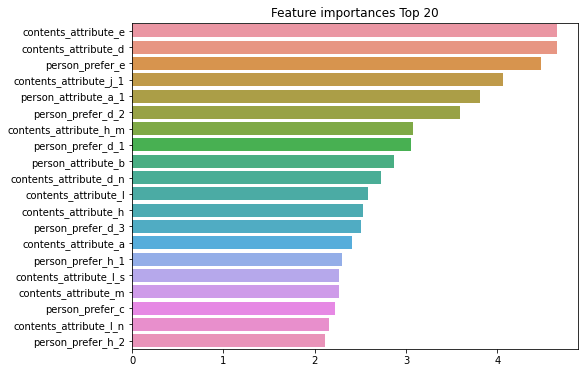

In [30]:
ftr_importances_values = cat_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 테스트 데이터 전처리

In [31]:
# 학습에 불필요한 열인 id, person_rn(사용자번호), contents_rn(컨텐츠번호), contents_open_df(컨텐츠 열람 일시) 제거
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
test = test.drop(drop_columns,axis=1)
test

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,2,4,95,3,3,5,1,1,2,759,147,1,5,91,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,759,759,759,2006
46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,86,31,278,3,3,10,2,1,2,759,147,1,4,91,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,759,759,759,2006
46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,288,279,278,3,3,10,2,1,2,759,147,1,4,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006
46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,288,279,278,3,1,5,1,3,2,759,147,1,5,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006


In [32]:
for i in list1:
    test[i] = encoder.fit_transform(test[i])

test.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,0,0,1,1,1,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,0,0,0,1,0,0,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,1,0,0,1,1,1,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,1,0,0,1,1,1,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,1,0,0,1,0,0,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
5,0,0,0,0,0,0,1,2,3,1,181,175,114,4,171,190,93,3,1,5,1,3,2,1463,1095,1,4,93,175,152,56,1,175,152,56,1,114,109,56,1,1095,1094,1093,926,169,452,188,464,92,397,92,397,1462,1459,1458,2013
6,0,0,0,1,0,0,2,0,4,5,800,182,819,4,79,93,93,2,3,5,1,1,2,953,1097,1,4,83,800,783,745,744,182,152,56,1,819,815,745,744,1097,1094,1093,926,78,385,92,397,92,397,78,389,952,951,930,2009
7,1,0,0,1,0,0,2,0,4,5,461,101,180,4,38,36,45,1,1,3,1,3,2,1851,453,4,3,44,461,451,450,377,101,91,56,1,175,152,56,1,452,451,450,377,30,349,30,347,30,356,30,355,1846,1843,1832,2020
8,1,0,0,1,0,0,2,0,4,5,436,464,396,3,31,278,86,3,3,9,2,3,2,1851,453,1,2,44,436,431,378,377,464,463,450,377,396,396,378,377,452,451,450,377,30,342,277,542,85,391,30,355,1846,1843,1832,2020
9,0,0,0,0,0,0,1,7,2,5,923,896,851,6,59,95,4,1,3,10,2,1,2,530,1228,5,4,117,923,923,864,864,895,884,864,864,847,847,824,744,1227,1227,1227,926,58,368,94,398,3,316,94,407,529,528,527,2006


# 최종 예측

In [34]:
final_pred = cat_clf.predict_proba(test)[:,1]
final_pred

array([0.52930718, 0.4424175 , 0.41112308, ..., 0.6659842 , 0.70128056,
       0.62662728])

In [35]:
threshold=0.35
final_pred = np.where(final_pred >= threshold , 1, 0)
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission['target'] = final_pred
sample_submission

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [37]:
sample_submission['target'].value_counts()

1    38654
0     7750
Name: target, dtype: int64

In [38]:
sample_submission.to_csv('sample_submission(catboost).csv', index=False, encoding='utf-8-sig')